In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.003
c_reg2=0.0001

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([ 2.71922981,  0.66634113,  1.10197331,  1.5386093 ,  2.015594  ,
        2.07570637,  4.49240762,  2.73628991,  4.32911038, 10.46241583])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


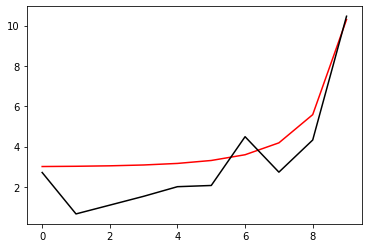

In [41]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
phi=tf.Variable(tf.zeros(1))
pi=tf.Variable(tf.zeros(1))

def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

def t_func2(a):
    return 0.5*(tanh(100*(a-0.1))-tanh(100*(a+0.1))+2)

In [17]:
def LP2(hh, phi, pi):
    for j in range (layer):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<data:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        for i in range (10000):
            if len(Positive)>=100: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))<0.1: Positive.append([phi1[i], pi1[i]]), print(len(Positive))
            else: continue
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<data:
        phi1=np.random.uniform(0.0, 1.5, 200)
        pi1=np.random.uniform(-0.2, 0.2, 200)
        phi_1, pi_1 = LP2(hh, phi1, pi1)
        for i in range (200):
            if len(Negative)>=100: break
            if tf.math.abs(F_func(phi_1[i], pi_1[i]))>=0.1: Negative.append([phi1[i], pi1[i]])
            else: continue
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    for i in range (data):
        phi=list1[i][0]
        pi=list1[i][1]
        if tf.math.abs(LP2(hh, phi, pi)[1])<0.1: PP.append([phi, pi])
        else: NN.append([phi, pi])
    return PP, NN

In [18]:
Positive=NN_func_p(h_real)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [19]:
Negative=NN_func_n(h_real)

In [30]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

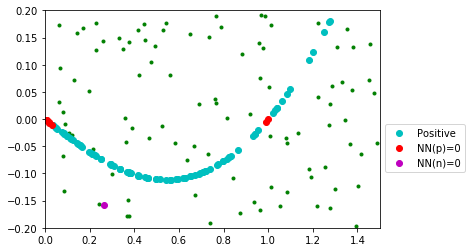

In [32]:
x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [42]:
def Error_func(hh):
    phi0=np.array([v[0] for v in Positive])
    pi0=np.array([v[1] for v in Positive])
    phi1=np.array([v[0] for v in Negative])
    pi1=np.array([v[1] for v in Negative])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)
    sum_n=data-sum(NNlist)

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [43]:
print(Error_func(h_real))
print(Error_func(h))

tf.Tensor(0.00023554683987827175, shape=(), dtype=float64)
tf.Tensor(90.983090190478, shape=(), dtype=float64)


In [44]:
def run():
    with tf.GradientTape() as g:
        loss=Error_func(h) #돌리기전에 Error함수 수정 잊지말것
        gradients=g.gradient(loss, [h])
    optimizer.apply_gradients(zip(gradients, [h]))

100 90.12665349387497
[ 2.68568596  0.63291405  1.06596043  1.49750568  1.96565016  2.01313956
  4.41460248  2.6462379   4.22963664 10.35710755]


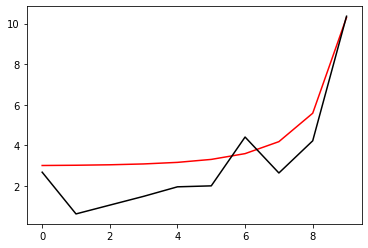

200 89.91989066336326
[ 2.6964691   0.64426507  1.07176387  1.49214547  1.94102038  1.96356066
  4.34133493  2.55910303  4.13453101 10.25806701]


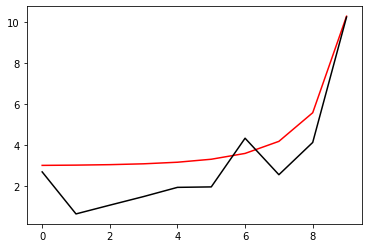

300 89.73620823943773
[ 2.70790692  0.6567241   1.07780006  1.48514506  1.91184373  1.9084724
  4.26605145  2.47408021  4.04462379 10.1660257 ]


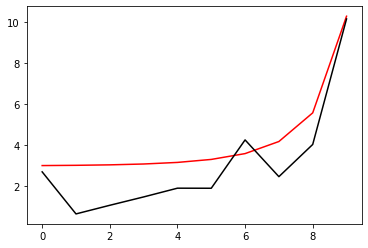

400 89.58069232683256
[ 2.71945158  0.66957944  1.08376001  1.47728105  1.88085824  1.85257194
  4.19305987  2.39361903  3.96062235 10.08059515]


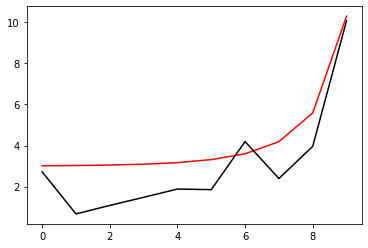

500 89.45274032235015
[ 2.7309097   0.68238002  1.08930154  1.46879874  1.84943459  1.79803814
  4.12402669  2.3186283   3.88288507 10.00181685]


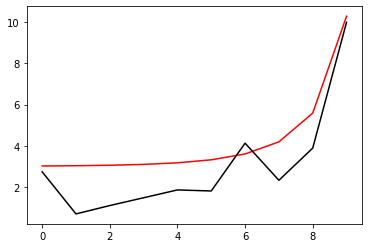

600 89.3474607573805
[2.74260407 0.69511744 1.0942909  1.45971008 1.81801769 1.74546601
 4.05907714 2.2488468  3.81090975 9.92904733]


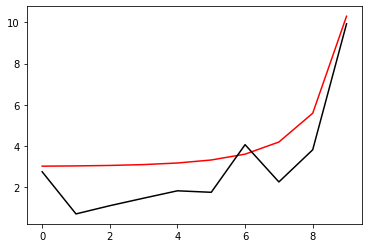

700 89.25785303771691
[2.75529046 0.70812703 1.09872233 1.44975578 1.78621615 1.69422558
 3.99719073 2.18303927 3.74334634 9.8608622 ]


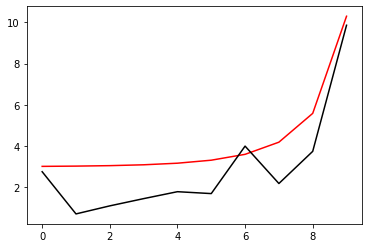

800 89.17616716253636
[2.77015727 0.72203523 1.10265241 1.43837099 1.7528888  1.64272016
 3.93647361 2.1191981  3.67814185 9.79516813]


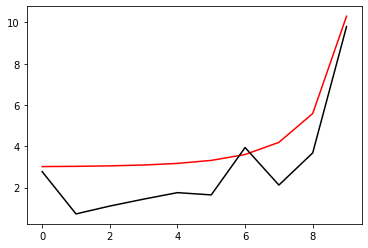

900 89.09350131423565
[2.78896774 0.73780303 1.10616445 1.42459268 1.71607002 1.58837841
 3.87414817 2.05450185 3.61247836 9.7291285 ]


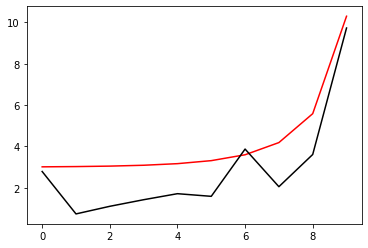

1000 88.9973177198283
[2.81434684 0.75686169 1.10933203 1.40682461 1.67261789 1.52729443
 3.80618723 1.98493022 3.54238103 9.65876843]


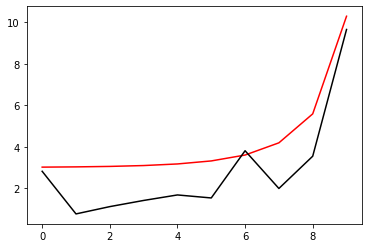

1100 88.86674545865142
[2.84988112 0.78113826 1.11207646 1.3824554  1.61775335 1.4538289
 3.72692262 1.90483787 3.46227793 9.57853917]


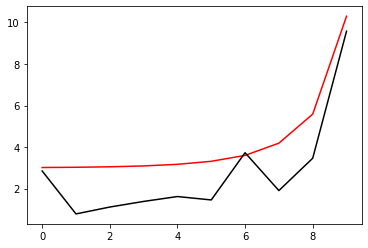

1200 88.67352907732435
[2.89816506 0.81196033 1.11375939 1.34816756 1.5463422  1.362466
 3.63086199 1.80861974 3.36655928 9.4828672 ]


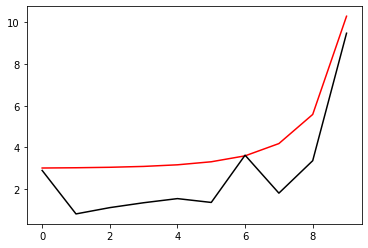

1300 88.41744653063982
[2.95406844 0.84675978 1.11343444 1.30413426 1.4603286  1.25606566
 3.52033503 1.69786048 3.25632873 9.37274601]


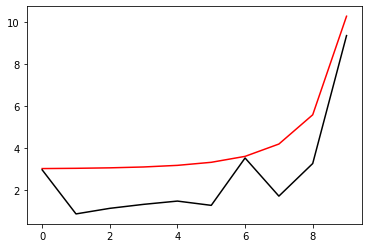

1400 88.14000845732771
[3.00500226 0.8805408  1.11312168 1.25869099 1.37203328 1.14679874
 3.40527654 1.58075744 3.13854549 9.25460999]


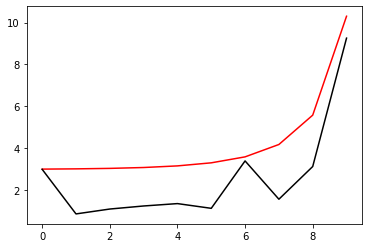

1500 87.820451597191
[3.04732754 0.91453605 1.11807528 1.21849997 1.28564057 1.03520906
 3.28353807 1.45356628 3.00841225 9.12311719]


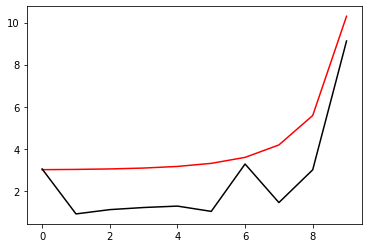

1600 87.30010273598363
[3.08866616 0.95599837 1.1322759  1.17862831 1.18625025 0.90196249
 3.13485887 1.29569345 2.84528725 8.95757024]


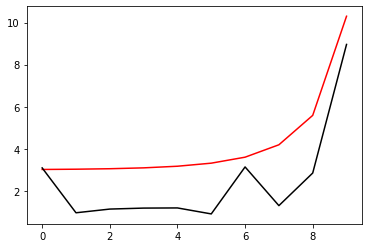

1700 86.24191837206357
[3.14090592 1.01298613 1.15475112 1.12061412 1.0461336  0.72191662
 2.93819679 1.08874151 2.63257662 8.74224092]


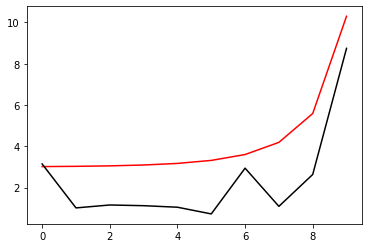

1800 85.02411513676502
[3.1796583  1.07536204 1.1943477  1.07475848 0.91147795 0.54668865
 2.74464049 0.88385202 2.4207669  8.52693308]


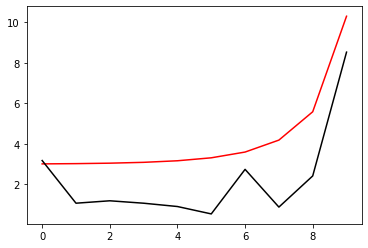

1900 84.4446398951475
[3.07260237 1.09271289 1.29690304 1.19662396 0.95303824 0.50653828
 2.65155553 0.76230065 2.27977454 8.37481508]


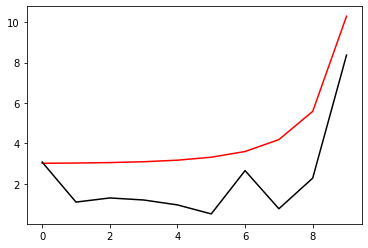

2000 83.95259242995914
[2.95319909 1.10230226 1.39874428 1.32537928 1.01835653 0.48675686
 2.57531441 0.65791731 2.15737899 8.24283149]


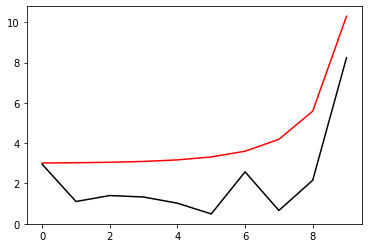

2100 83.55446522262244
[2.84507788 1.11123168 1.49050284 1.4391069  1.08261175 0.47176357
 2.50679586 0.56422229 2.04834562 8.12609057]


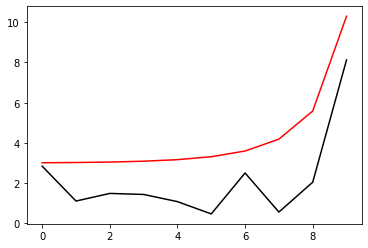

2200 83.23901759526639
[2.74851739 1.11942147 1.5719786  1.53900327 1.14379867 0.46081552
 2.44570006 0.48047279 1.95116735 8.02240081]


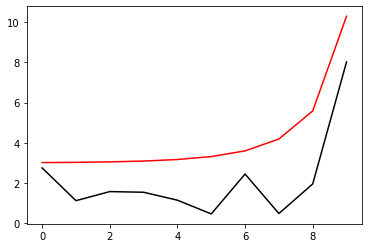

2300 82.98528057614539
[2.66195264 1.12692705 1.64464222 1.62771246 1.20165735 0.45304571
 2.39065287 0.40463693 1.86316781 7.92862993]


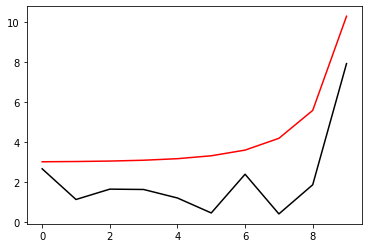

2400 82.77323860614273
[2.58307156 1.1338664  1.71061895 1.70828422 1.25703721 0.44785684
 2.34005441 0.3344193  1.78152803 7.84164611]


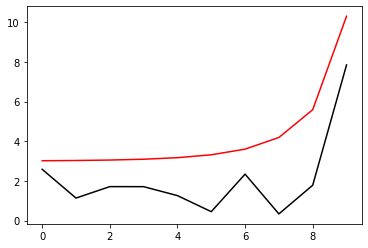

2500 82.58697492929986
[2.50954185 1.14045245 1.77210359 1.78355379 1.31117763 0.44485824
 2.29236803 0.26765259 1.70367291 7.75865883]


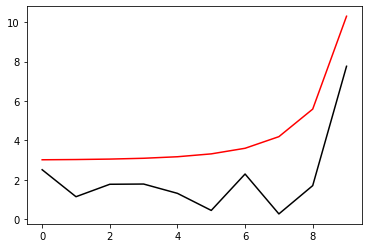

2600 82.41439523622586
[2.4393344  1.14705888 1.83115238 1.85593714 1.36530174 0.44373443
 2.24616898 0.20238613 1.6273483  7.67726942]


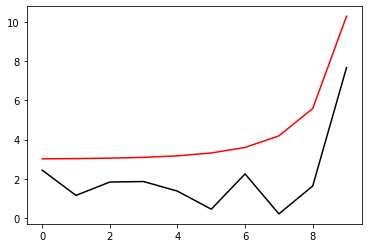

2700 82.24589828145366
[2.37083188 1.15435579 1.88971919 1.92745763 1.42044149 0.44410474
 2.20006513 0.13681658 1.55054236 7.59537814]


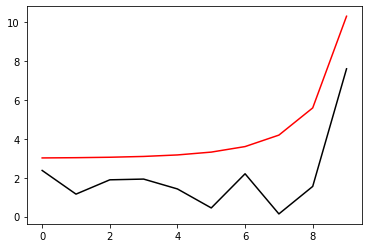

2800 82.07243909933328
[2.30283554 1.16363836 1.94994154 1.99995067 1.47739418 0.44530342
 2.15244915 0.06904017 1.47123883 7.51093614]


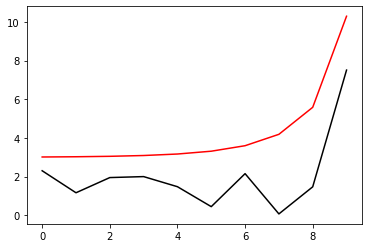

2900 81.88142385674007
[ 2.23420712e+00  1.17755232e+00  2.01501277e+00  2.07576057e+00
  1.53701685e+00  4.46063671e-01  2.10091994e+00 -3.57630597e-03
  1.38678470e+00  7.42131903e+00]


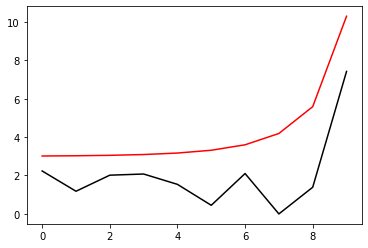

3000 81.64711108989367
[ 2.16085825  1.20000973  2.09090509  2.15986457  1.60226951  0.44531478
  2.04189626 -0.08517179  1.292934    7.32229311]


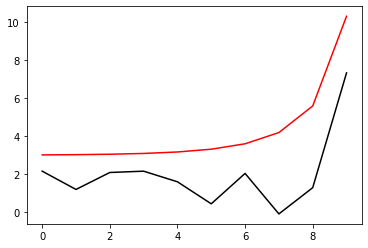

3100 81.33301679410928
[ 2.07085319  1.23066518  2.18396018  2.25974742  1.68073875  0.4464409
  1.97389651 -0.17861155  1.18624296  7.21016202]


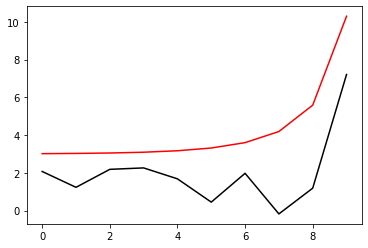

3200 80.93518007202624
[ 1.96101849  1.26686419  2.29196282  2.37403774  1.77362879  0.45274053
  1.89906897 -0.28163629  1.06905896  7.08725547]


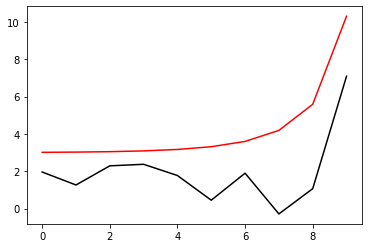

3300 80.48351686188263
[ 1.84021408  1.30798176  2.40724927  2.49440707  1.87448717  0.4635577
  1.82003987 -0.38995784  0.94646774  6.95896247]


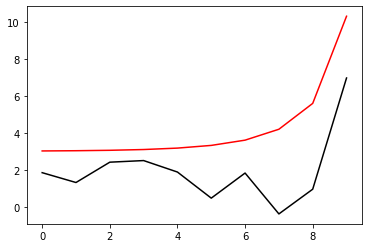

3400 80.00706066898483
[ 1.71527854  1.3531288   2.52437634  2.61552737  1.97907321  0.4792678
  1.73956998 -0.49989469  0.8224972   6.82942685]


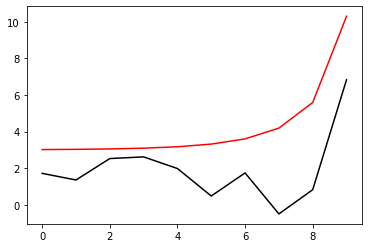

3500 79.52641923454159
[ 1.58969564  1.40113792  2.64046499  2.73499636  2.08543873  0.50116125
  1.66009871 -0.60879092  0.6998121   6.70130324]


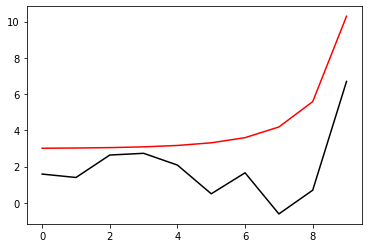

3600 79.05769132877742
[ 1.46552056  1.4508432   2.75378883  2.85146455  2.19222866  0.53037298
  1.58364607 -0.71464428  0.58033292  6.57646871]


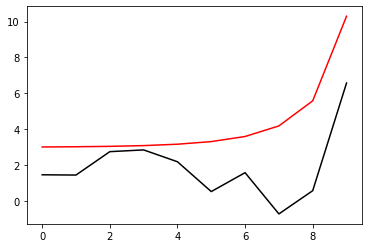

3700 78.61467335255219
[ 1.34425952  1.50111908  2.86310669  2.96394385  2.2982418   0.56770893
  1.51203563 -0.81574011  0.46564796  6.45643805]


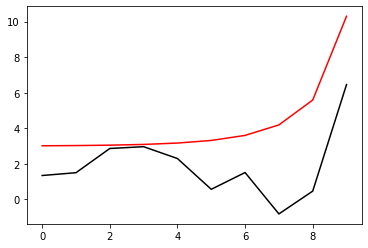

3800 78.20807974545953
[ 1.22705154  1.55098059  2.96756498  3.07175738  2.40253064  0.61371457
  1.44695433 -0.91059765  0.35705945  6.34240729]


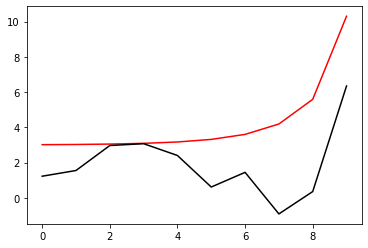

3900 77.84294102512084
[ 1.11453926  1.59983344  3.06686706  3.17469686  2.50454376  0.66850327
  1.38961068 -0.99830091  0.25528091  6.23497909]


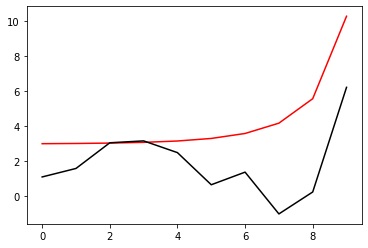

4000 77.51757748550618
[ 1.00676654  1.64765428  3.16134223  3.27305161  2.6040788   0.73140805
  1.34028166 -1.07885474  0.16015291  6.13392554]


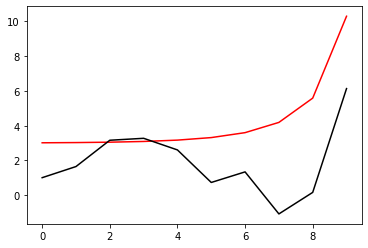

4100 77.22547872717858
[ 0.90334138  1.69498805  3.25174274  3.36736735  2.70097851  0.80061345
  1.29801308 -1.15329791  0.0706284   6.0382222 ]


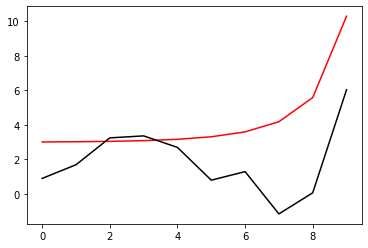

4200 76.95822511776507
[ 0.80368343  1.74278062  3.33897269  3.45821008  2.79496283  0.8733352
  1.26074188 -1.22347714 -0.01496259  5.94632374]


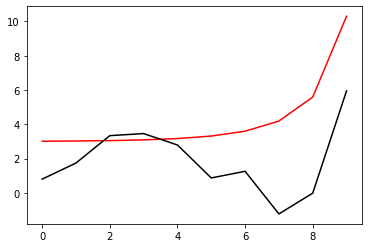

4300 76.7072176374384
[ 0.70701615  1.79211625  3.42404463  3.54627879  2.88600463  0.94701627
  1.22605313 -1.29149816 -0.09848329  5.85652797]


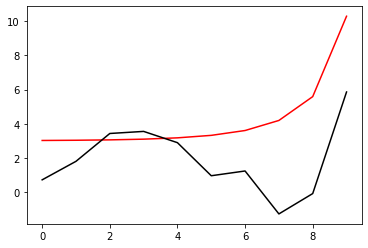

4400 76.4639142184238
[ 0.61220808  1.84404354  3.50819483  3.63265504  2.9747906   1.02049779
  1.19199714 -1.35924426 -0.18167758  5.76720652]


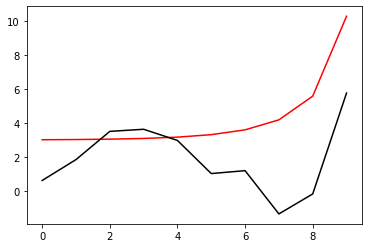

KeyboardInterrupt: 

In [45]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 76.19187770533992
[ 0.51422237  1.89886931  3.60245593  3.72802111  3.07129287  1.11552461
  1.1151712  -1.44854922 -0.2753939   5.67182808]


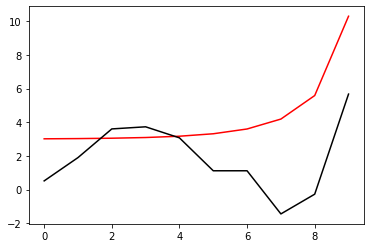

200 75.97164943269715
[ 0.43658664  1.9411363   3.67897044  3.80537751  3.14987003  1.19782697
  1.05754172 -1.52061931 -0.34974781  5.59678756]


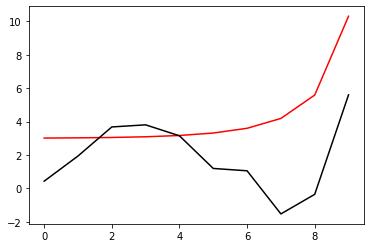

300 75.74182195161723
[ 0.35752429  1.98726253  3.75675908  3.88381883  3.22938986  1.28074492
  1.0044326  -1.59353973 -0.42537874  5.52041152]


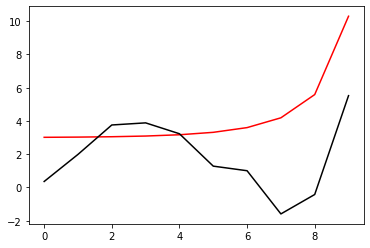

400 75.49846453465138
[ 0.27674466  2.03804238  3.83598465  3.96347058  3.30989131  1.36411136
  0.95346129 -1.66812746 -0.50283025  5.44224594]


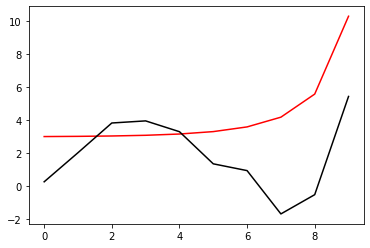

500 75.23943322041622
[ 0.19415003  2.093553    3.91670585  4.04441732  3.39149907  1.44818905
  0.90459727 -1.74447801 -0.58218972  5.36219973]


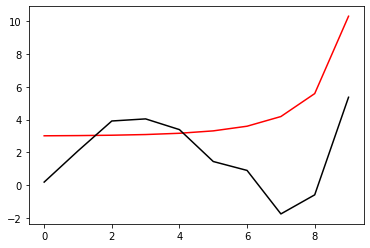

600 74.96481807365656
[ 0.10993828  2.15343845  3.99870501  4.12647881  3.47409309  1.53304105
  0.85911979 -1.82224417 -0.66319633  5.28049378]


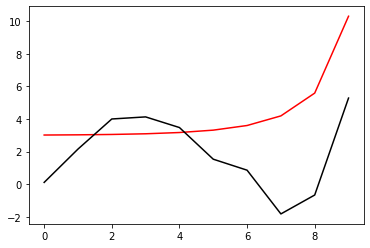

700 74.67718071390877
[ 0.02458928  2.21696217  4.08149029  4.2092019   3.55727723  1.61844081
  0.81922944 -1.90075473 -0.74530041  5.19762265]


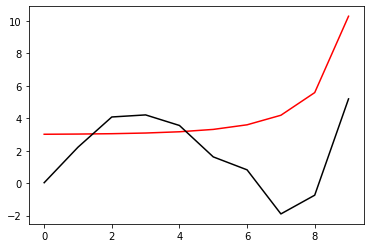

800 74.38145513334204
[-0.06120379  2.28300724  4.164369    4.29193428  3.64045227  1.70394282
  0.7880294  -1.97908886 -0.82772248  5.11430366]


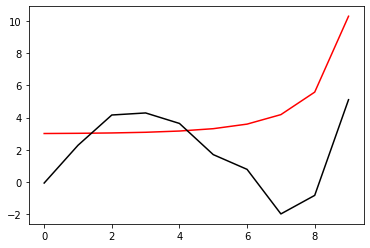

900 74.08441964192646
[-0.14661831  2.35016554  4.24653431  4.37390858  3.72289548  1.78894836
  0.76938991 -2.05617612 -0.90953515  5.03140362]


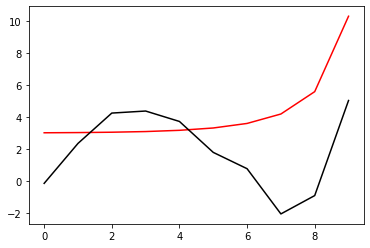

1000 73.79362203912542
[-0.23078465  2.41707499  4.3271412   4.45430141  3.80379315  1.87266833
  0.76669518 -2.1310174  -0.98981219  4.94981357]


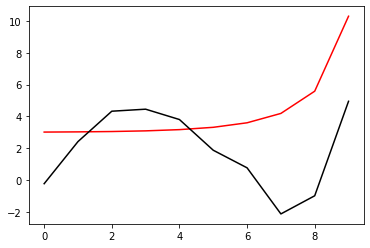

1100 73.51604484125524
[-0.31286611  2.48287379  4.4053805   4.53228899  3.88226985  1.95409045
  0.780497   -2.20295644 -1.06780945  4.87029435]


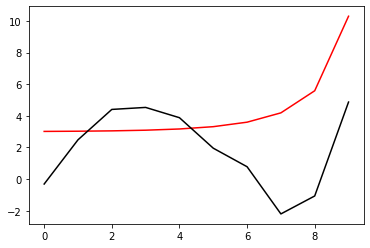

1200 73.25718513884397
[-0.39213872  2.54727117  4.48057105  4.60715349  3.95752375  2.03219744
  0.80789337 -2.27170376 -1.14302514  4.79340321]


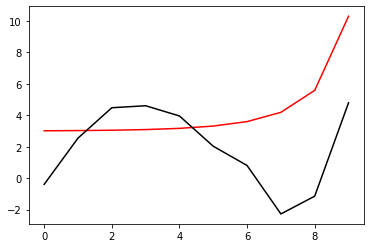

1300 73.02075933760368
[-0.46804699  2.61016884  4.55223178  4.67838999  4.02899409  2.10628951
  0.84482936 -2.33710698 -1.21511943  4.71952906]


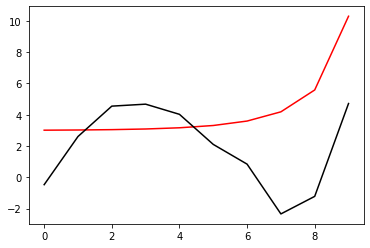

1400 72.80877119299234
[-0.54020396  2.67138754  4.62007508  4.74571033  4.09638031  2.17603743
  0.88798034 -2.39902018 -1.28385104  4.64893635]


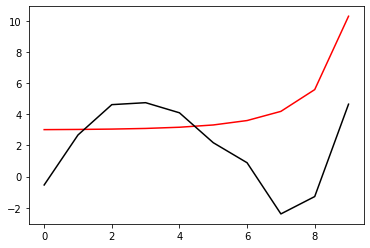

1500 72.62174570457098
[-0.60836016  2.73065239  4.68395847  4.80898453  4.15956402  2.24135296
  0.9349593  -2.45732299 -1.34906921  4.58178124]


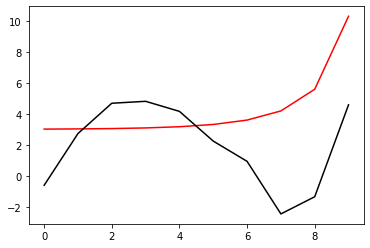

1600 72.45903441418413
[-0.67237532  2.787649    4.74384522  4.86819225  4.21854415  2.30228333
  0.98405605 -2.51195341 -1.41071259  4.51812225]


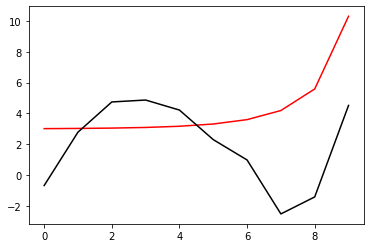

1700 72.31913469671086
[-0.73219914  2.84207066  4.79978016  4.92339423  4.27340105  2.35895809
  1.0340398  -2.56291776 -1.46880161  4.4579328 ]


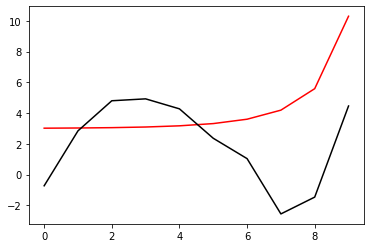

1800 72.19998904932349
[-0.78785749  2.89365052  4.85187385  4.97471489  4.32427635  2.41156302
  1.08403865 -2.61028731 -1.52342749  4.40111429]


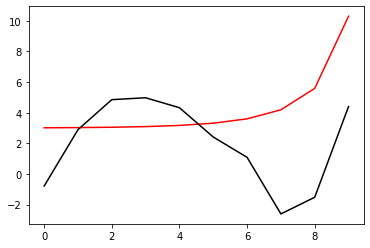

1900 72.09924532214231
[-0.83944101  2.94218105  4.90029036  5.02232954  4.37135945  2.46032527
  1.13345938 -2.65418904 -1.57474009  4.34750896]


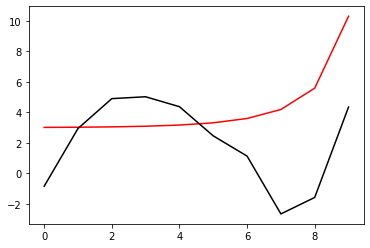

2000 72.014467458112
[-0.88709407  2.98752303  4.94523603  5.06645318  4.41487633  2.50550248
  1.18192716 -2.69479407 -1.62293537  4.29691277]


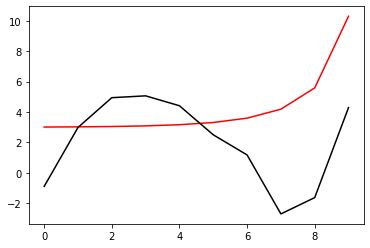

2100 71.94329237301075
[-0.93100353  3.02960639  4.98694843  5.10732966  4.45507903  2.54737285
  1.22923574 -2.73230565 -1.66824298  4.24908788]


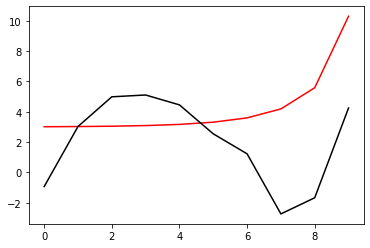

2200 71.88353422835658
[-0.97138751  3.06842555  5.0256857   5.1452214   4.49223572  2.586226
  1.27530493 -2.76694773 -1.71091467  4.20377438]


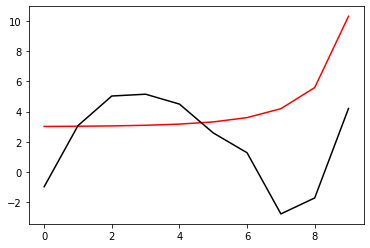

2300 71.83324239349628
[-1.00848506  3.10403159  5.06171699  5.18040019  4.52662185  2.62235478
  1.32014468 -2.79895519 -1.75121418  4.16070047]


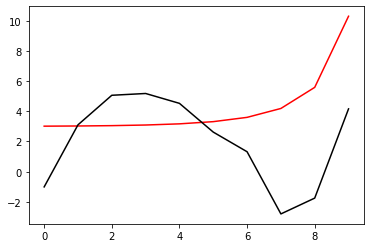

2400 71.7907227678269
[-1.0425474   3.13652371  5.09531466  5.21313976  4.55851307  2.65604867
  1.36382569 -2.8285661  -1.78940918  4.11959058]


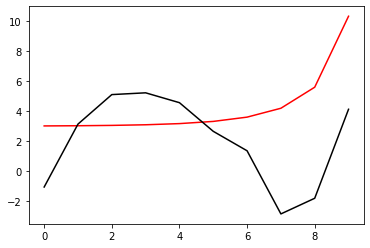

2500 71.75453321698998
[-1.07383142  3.16604156  5.12674868  5.24371048  4.58818012  2.68758914
  1.40645639 -2.85601647 -1.82576565  4.08017113]


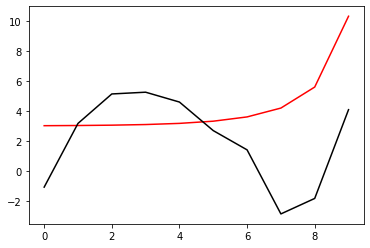

2600 71.7234629568261
[-1.10259562  3.19275976  5.15628344  5.27237633  4.61588611  2.71724719
  1.44816555 -2.8815372  -1.8605446   4.04217394]


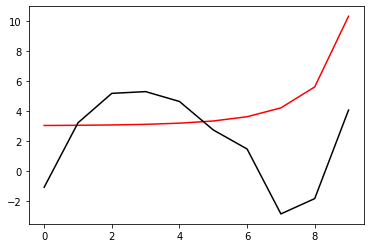

2700 71.69650362839198
[-1.12909851  3.21688521  5.18417671  5.29939408  4.64188568  2.74528268
  1.4890896  -2.90535346 -1.89400099  4.0053374 ]


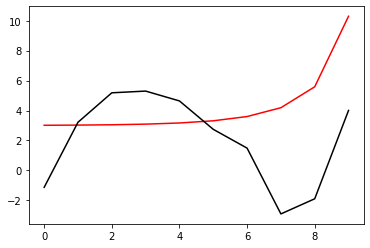

2800 71.67281738780243
[-1.15359947  3.23865786  5.2106809   5.32501437  4.66642626  2.77194559
  1.52936341 -2.92768594 -1.92638477  3.96940562]


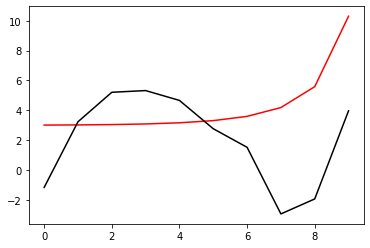

2900 71.65170513237886
[-1.17636195  3.25835546  5.23604629  5.34948487  4.68975106  2.79747877
  1.56911345 -2.94875423 -1.95794389  3.93412573]


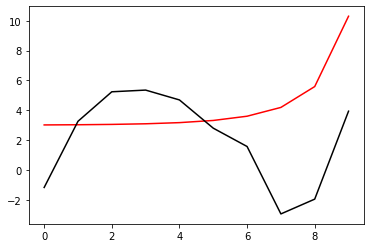

3000 71.63257620733518
[-1.19765929  3.27630318  5.2605265   5.37305528  4.71210397  2.82212233
  1.60845206 -2.96878233 -1.98892925  3.89924317]


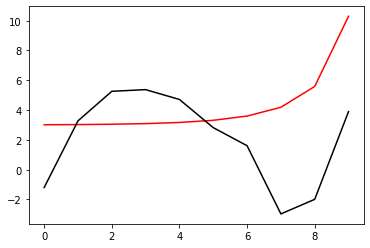

3100 71.61491953687931
[-1.21778365  3.29288973  5.28438656  5.39598472  4.73373655  2.84611984
  1.64747177 -2.98800693 -2.01960219  3.86449476]


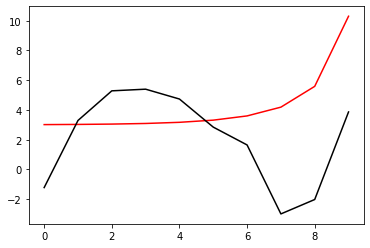

3200 71.59827487808656
[-1.23705922  3.30859276  5.30791447  5.41855219  4.75491798  2.86972676
  1.68623802 -3.00668942 -2.05024535  3.82959871]


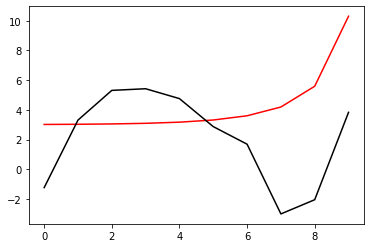

3300 71.58220141395822
[-1.25586181  3.32401864  5.33143797  5.4410717   4.77594923  2.89322234
  1.7247781  -3.02513382 -2.08117842  3.79424   ]


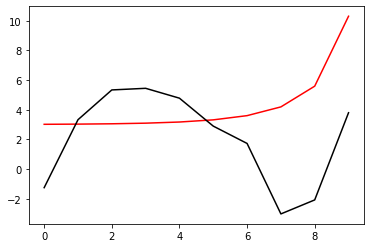

3400 71.566238483131
[-1.27464864  3.33996539  5.35534956  5.4639145   4.79718383  2.91692665
  1.7630624  -3.04371418 -2.1127821   3.75804844]


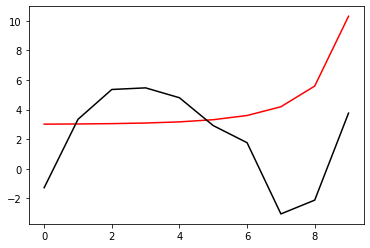

3500 71.54984843857957
[-1.29400503  3.3575251   5.38014491  5.48754333  4.81905964  2.94122607
  1.80097057 -3.06291844 -2.14553562  3.72056441]


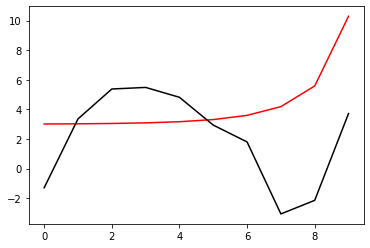

3600 71.532321047077
[-1.3147205   3.37825558  5.4064843   5.5125668   4.84214912  2.966613
  1.83822752 -3.08342108 -2.18007795  3.68118307]


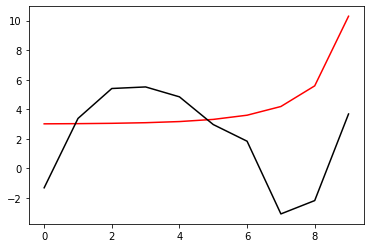

3700 71.51259385911314
[-1.33791713  3.40447761  5.43529431  5.53982927  4.867242    2.99374988
  1.87427726 -3.10620923 -2.21731213  3.63905981]


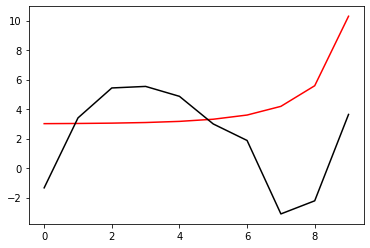

3800 71.48888029867096
[-1.36527262  3.43980474  5.46794127  5.570564    4.8954856   3.0235758
  1.90802524 -3.13280874 -2.25858878  3.59294407]


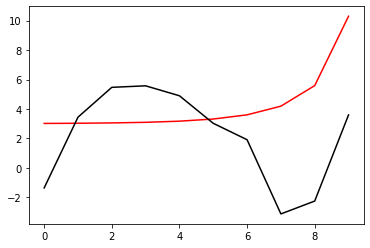

3900 71.45783217576528
[-1.39941158  3.49009777  5.50653158  5.60665834  4.92862752  3.05748858
  1.9373057  -3.16569673 -2.30603522  3.54088149]


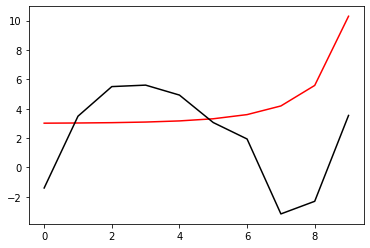

4000 71.41252856102074
[-1.44455883  3.56510955  5.55441739  5.65110263  4.96942963  3.09765981
  1.95785216 -3.20902088 -2.3631255   3.47969381]


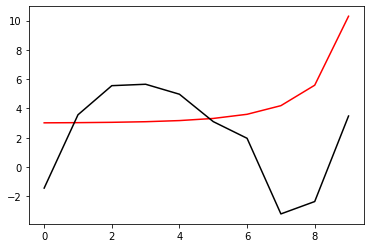

4100 71.33764926362521
[-1.5073587   3.68063889  5.61691206  5.7086408   5.02229587  3.14757264
  1.962015   -3.26953762 -2.43546528  3.40423342]


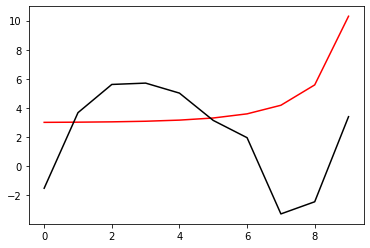

4200 71.2004827668574
[-1.59639533  3.85739535  5.70152952  5.78605619  5.09369737  3.21273225
  1.94125046 -3.35612566 -2.53072525  3.30727959]


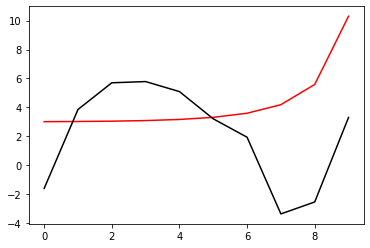

4300 70.9515488000242
[-1.71516427  4.10288864  5.8146807   5.88926114  5.1897843   3.29971229
  1.90252973 -3.47286394 -2.65376012  3.18369439]


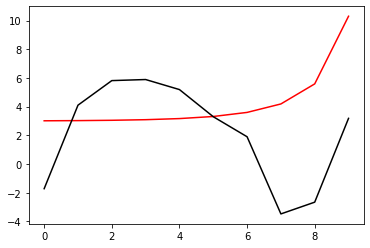

4400 70.57535915330288
[-1.84974916  4.38103129  5.95262556  6.01478354  5.30801254  3.40882581
  1.88281338 -3.6085125  -2.79684276  3.03986977]


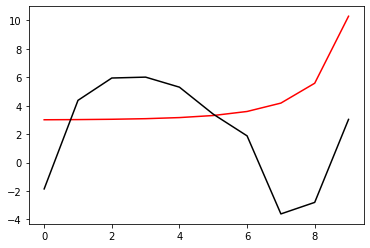

4500 70.13507262122481
[-1.97834363  4.63908563  6.09938258  6.14821604  5.43484102  3.52929403
  1.92776778 -3.74279399 -2.94236481  2.89237968]


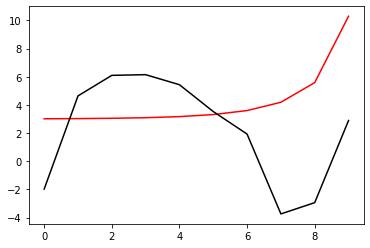

4600 69.70526653869909
[-2.09126415  4.86036859  6.24087309  6.27730219  5.55846517  3.64995008
  2.05559644 -3.86246957 -3.07783169  2.75359496]


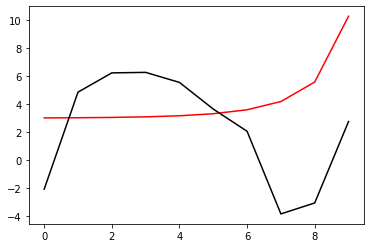

4700 65.89816365511601
[-1.90514574  5.2205638   6.51531234  6.51302287  5.76780991  3.83995666
  2.29064464 -3.98881813 -3.21845059  2.61144664]


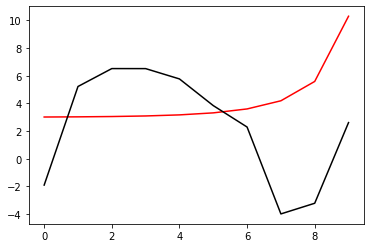

4800 56.04874123532092
[-1.59876713  5.53203016  6.82434248  6.81951389  6.07605364  4.15756994
  2.64712372 -3.83121811 -3.29005061  2.48793606]


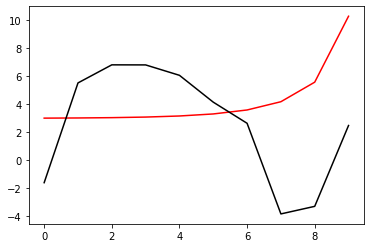

4900 14.003566590960187
[-1.24835906  5.88132594  7.16803229  7.15559886  6.40162205  4.4668141
  2.91906785 -3.77054579 -3.55785858  2.19771626]


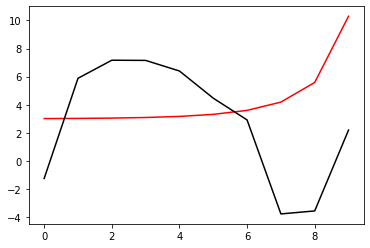

5000 9.481709416064035
[-1.16684417  5.96329596  7.25120387  7.24106188  6.4913611   4.56442829
  3.03413642 -3.61770756 -3.57235514  2.14776018]


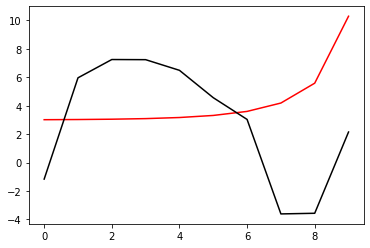

In [46]:
optimizer=tf.optimizers.Adam(learning_rate=0.00075)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.00065)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 9.21526642568546
[-1.12930426  6.00044453  7.28895095  7.27937446  6.5304211   4.60451138
  3.07545664 -3.57464856 -3.52371528  2.14786874]


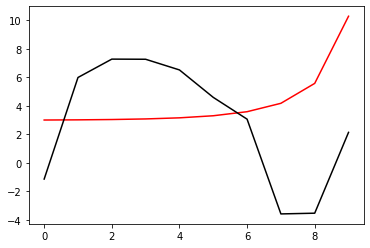

200 9.160623914054366
[-1.11082139  6.01738979  7.30779494  7.2998276   6.55291327  4.62973804
  3.10375994 -3.54221138 -3.48047306  2.20769729]


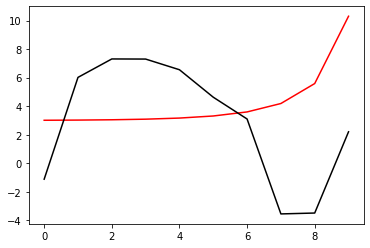

300 9.136589820450716
[-1.10047247  6.02513157  7.31839581  7.31269153  6.56857191  4.64910375
  3.12709413 -3.51370006 -3.44011183  2.26784136]


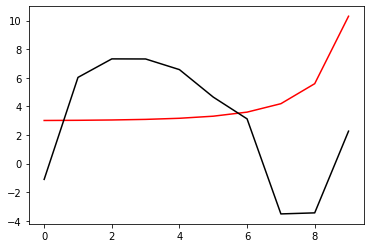

400 9.120318351881535
[-1.09500879  6.02704151  7.32402137  7.32119342  6.58059108  4.66574505
  3.14854496 -3.48616825 -3.39991779  2.32665399]


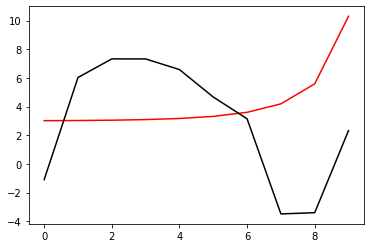

500 9.105102414782944
[-1.0932434   6.02441402  7.32598124  7.32675855  6.5905727   4.68145913
  3.17013406 -3.45746969 -3.35760646  2.38632667]


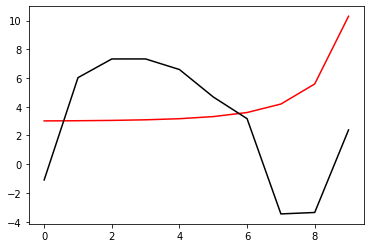

600 9.087194631393576
[-1.09479143  6.01774393  7.32487701  7.33024256  6.59973594  4.69786369
  3.19389112 -3.4253583  -3.31084532  2.44907498]


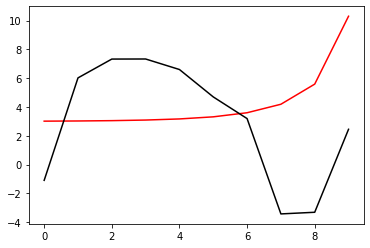

700 9.0626474178674
[-1.09964435  6.00718283  7.32107518  7.33245821  6.60951779  4.71704511
  3.222492   -3.38697416 -3.25699823  2.51706009]


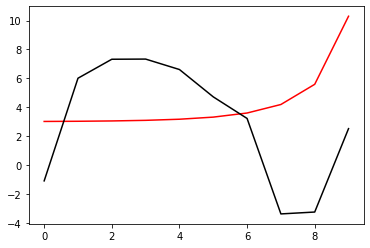

800 9.025443784146358
[-1.10777391  5.99298984  7.31521586  7.33480924  6.62235484  4.74238461
  3.25995625 -3.3384594  -3.1931552   2.59229399]


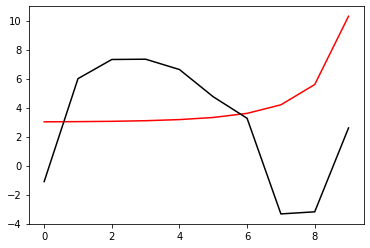

900 8.96482822826066
[-1.11819466  5.97661707  7.30949535  7.34086754  6.64347263  4.78011197
  3.31251603 -3.27484395 -3.11653492  2.6762788 ]


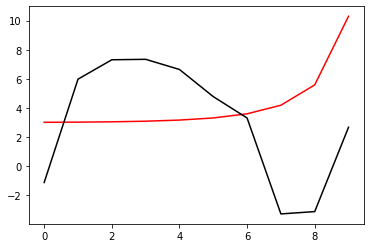

1000 8.841877769438003
[-1.12529249  5.96556742  7.31412072  7.36454071  6.689589    4.84640142
  3.39346831 -3.18661012 -3.02170231  2.77205261]


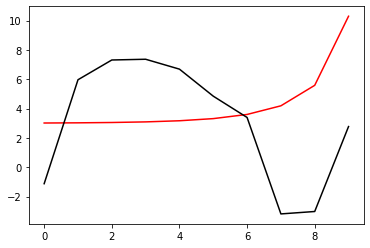

1100 8.00488865460809
[-1.06892369  6.03322161  7.40726796  7.48127219  6.82350212  4.98863771
  3.538751   -3.04390453 -2.88425246  2.89856229]


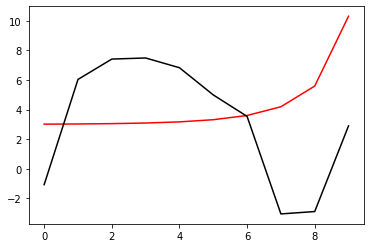

1200 7.855114939702069
[-1.11031891  5.99612387  7.39475741  7.49127011  6.85094072  5.0279645
  3.58594795 -2.99127789 -2.82423925  2.96772591]


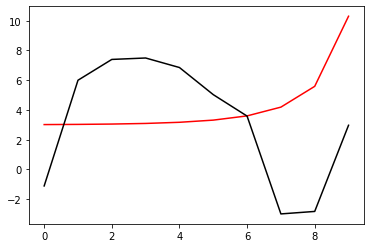

1300 7.6504904647571665
[-1.15805945  5.95325391  7.3796733   7.50468823  6.88608833  5.07690393
  3.64364436 -2.92800433 -2.7536058   3.04664709]


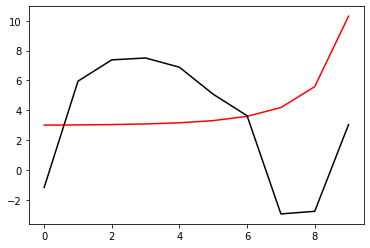

1400 7.533146243978809
[-1.17602412  5.9338439   7.38005188  7.52555722  6.92191164  5.12186665
  3.69443293 -2.87339033 -2.69398662  3.11148151]


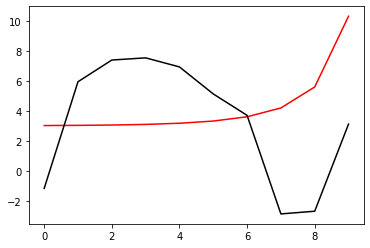

1500 7.4684375886133445
[-1.17896296  5.92305717  7.38187339  7.54100804  6.94792785  5.15493143
  3.73237027 -2.83175748 -2.64766016  3.16262544]


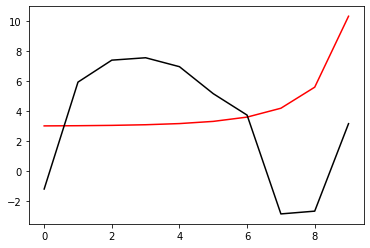

1600 7.419034731822447
[-1.17714802  5.91360252  7.38217753  7.55265883  6.96905449  5.18280735
  3.7650863  -2.79519094 -2.60637949  3.20865816]


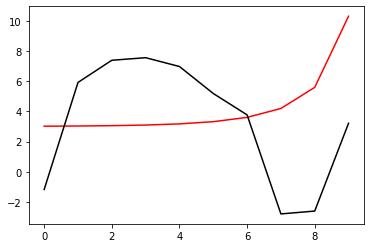

1700 7.3733022633446685
[-1.17347685  5.90402975  7.38152734  7.56298364  6.98888254  5.20952305
  3.79674419 -2.75963817 -2.56620779  3.25338137]


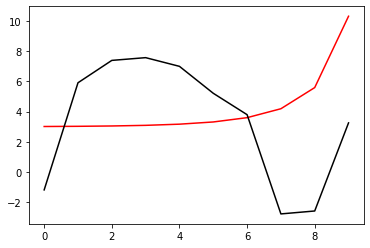

1800 7.32656465053224
[-1.16898046  5.89397182  7.38053121  7.57349477  7.00938529  5.23716957
  3.82942417 -2.72314234 -2.52530925  3.29851521]


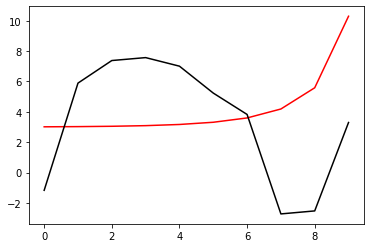

1900 7.275955698080646
[-1.16415551  5.88329216  7.37966681  7.58525671  7.03188709  5.26709139
  3.86441948 -2.68452751 -2.48261317  3.34504439]


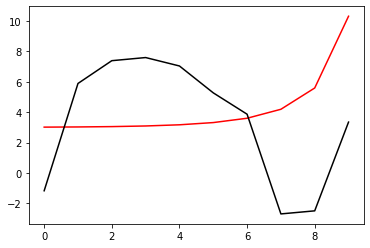

2000 7.218902476115055
[-1.15931745  5.8719153   7.37936789  7.59920955  7.05750956  5.30037577
  3.90273934 -2.64290504 -2.43732861  3.3936907 ]


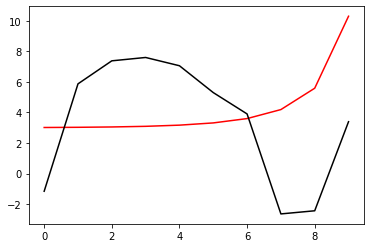

2100 7.152535635392385
[-1.15471075  5.85979316  7.38010208  7.61633384  7.08735516  5.33803218
  3.94528381 -2.59750497 -2.38878023  3.44507126]


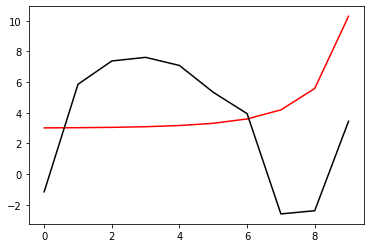

2200 7.073580255273649
[-1.15052305  5.84691783  7.38241979  7.63769507  7.12250626  5.38096859
  3.99281335 -2.54770217 -2.33642986  3.49968053]


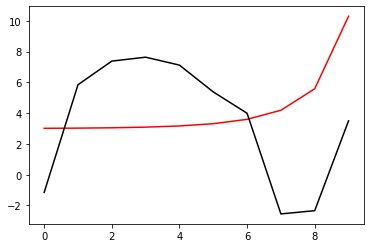

2300 6.978953211951645
[-1.14683215  5.83336484  7.38695221  7.66432331  7.16380213  5.42974762
  4.04570978 -2.49323276 -2.28007496  3.55770645]


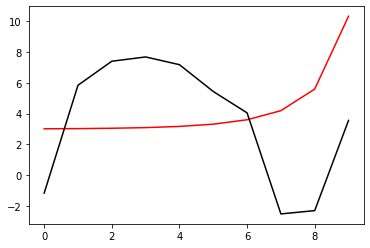

2400 6.867422337797334
[-1.14353221  5.81932968  7.3943011   7.69685854  7.2113785   5.48415005
  4.10357462 -2.43455242 -2.22017699  3.61872343]


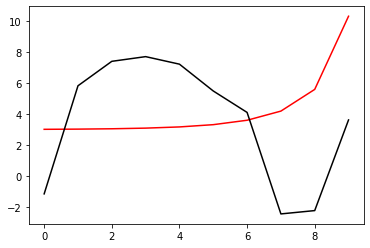

2500 6.74165196555904
[-1.1403706   5.80506165  7.40478236  7.73506776  7.26423089  5.54284983
  4.16497188 -2.37305241 -2.15805473  3.68150982]


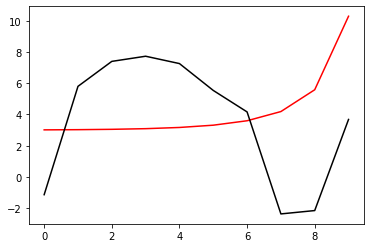

2600 6.608181092340553
[-1.13716214  5.79067472  7.41818879  7.77770657  7.32037172  5.60371747
  4.22778486 -2.3107097  -2.09554973  3.74435992]


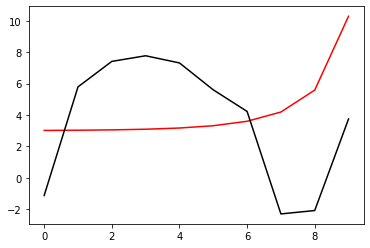

2700 6.47420121113181
[-1.13395304  5.77604601  7.43389334  7.8230812   7.3777041   5.66472846
  4.29010428 -2.24926267 -2.03425437  3.80580883]


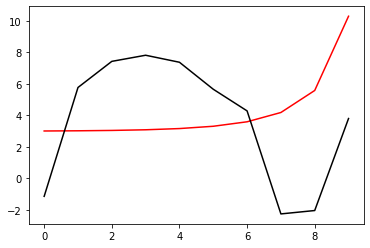

2800 6.344205823436612
[-1.13093859  5.76093478  7.45125244  7.86984061  7.43484424  5.72468457
  4.35087799 -2.18962542 -1.97497115  3.8651406 ]


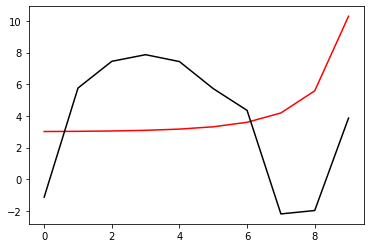

2900 6.219411166269152
[-1.12828646  5.74515594  7.46990862  7.91730815  7.4912739   5.78325416
  4.40989743 -2.13192154 -1.91775642  3.92234422]


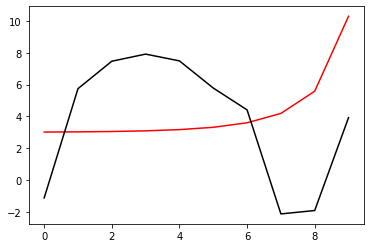

3000 6.099291224429092
[-1.12602737  5.72866628  7.48980434  7.96529105  7.54698245  5.8405666
  4.46737822 -2.07588942 -1.86231202  3.9777383 ]


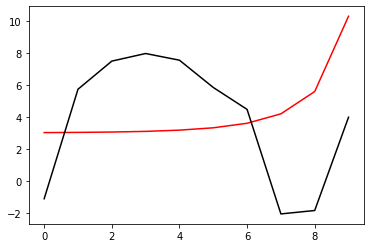

3100 5.9834856911695
[-1.12402565  5.71156509  7.51099024  8.01367287  7.60198897  5.89673827
  4.52349556 -2.02132257 -1.80840751  4.03156532]


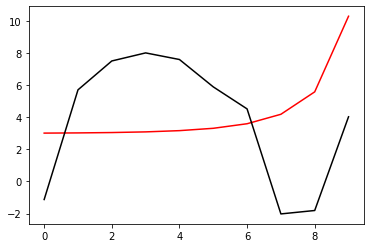

3200 5.873043304199413
[-1.12202377  5.69402866  7.53336406  8.06206123  7.65599982  5.95155394
  4.57808068 -1.96835417 -1.75615167  4.08373037]


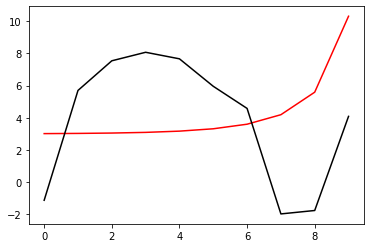

3300 5.77044110950403
[-1.11974918  5.67620275  7.55649015  8.1096817   7.70834741  6.00442659
  4.63059138 -1.91748016 -1.70601113  4.13378502]


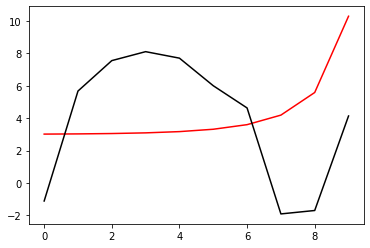

3400 5.678471899430697
[-1.11701276  5.65811499  7.57961497  8.15555446  7.7581994   6.0546133
  4.68033112 -1.8693455  -1.65859942  4.18113579]


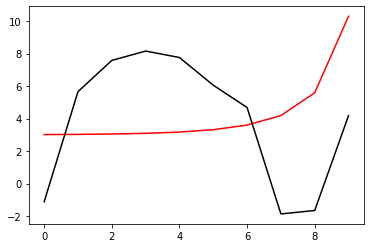

3500 5.599017707286012
[-1.11372893  5.63964102  7.60180646  8.19874875  7.80481871  6.10147409
  4.72670884 -1.82449089 -1.61442583  4.22529362]


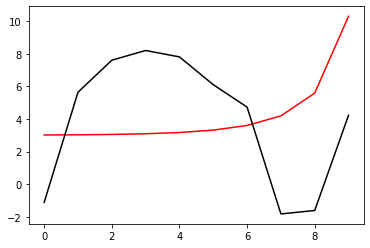

3600 5.532705814788611
[-1.10986421  5.62046694  7.62197215  8.23843437  7.84762532  6.14454483
  4.76932117 -1.78326481 -1.57380099  4.26597412]


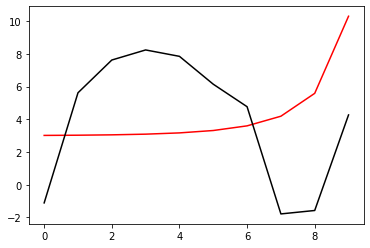

3700 5.479439745259661
[-1.10533618  5.59997161  7.6385566   8.27360714  7.88597854  6.18335939
  4.8078007  -1.74595037 -1.53694326  4.30300747]


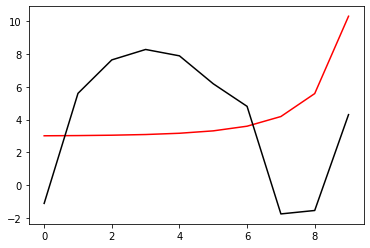

3800 5.43894917892186
[-1.09981383  5.57712298  7.64906421  8.30265648  7.91883262  6.21716061
  4.84156138 -1.71298567 -1.50417304  4.33616414]


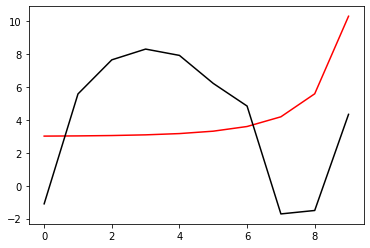

3900 5.4102983238466855
[-1.09246293  5.55079442  7.65030143  8.32345993  7.94479449  6.24493963
  4.8698252  -1.68494654 -1.47590526  4.36515345]


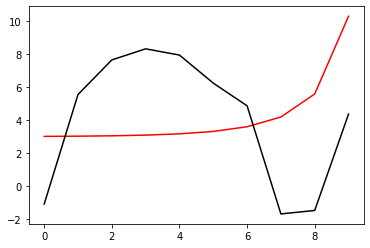

4000 5.390816581890103
[-1.08219293  5.52052929  7.64010606  8.33460872  7.9630398   6.26617411
  4.89224743 -1.66202683 -1.4522149   4.38999082]


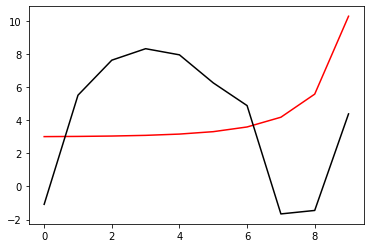

4100 5.376769664828341
[-1.06852324  5.48680747  7.61892123  8.33657231  7.97416396  6.28150082
  4.90947747 -1.64358366 -1.43246462  4.41130786]


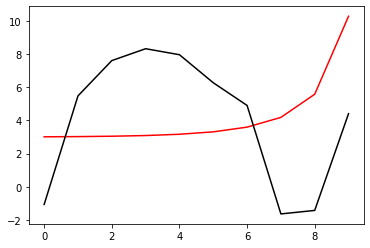

4200 5.36522682547512
[-1.05187748  5.45056814  7.58926705  8.33131223  7.97983608  6.29240067
  4.92286714 -1.62840458 -1.41555052  4.43012482]


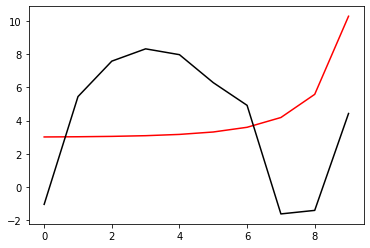

4300 5.354681354564337
[-1.03308332  5.41270237  7.55410112  8.32108608  7.98187266  6.30042993
  4.93380249 -1.61527717 -1.40039448  4.44741778]


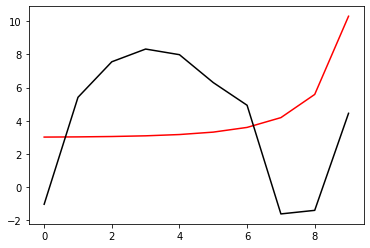

4400 5.344556544442978
[-1.01289097  5.37385206  7.51575407  8.30768144  7.98167861  6.30677466
  4.9433279  -1.60329871 -1.386203    4.46389787]


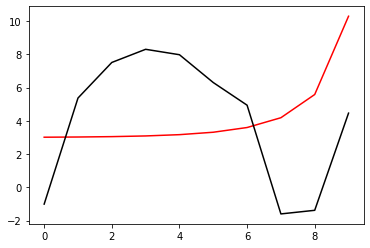

4500 5.334673126022002
[-0.99181603  5.33441942  7.4757248   8.29226633  7.98016035  6.31219464
  4.95210761 -1.5918993  -1.37247915  4.48000731]


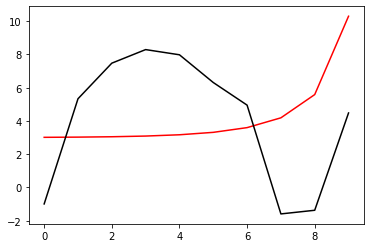

4600 5.324985051461103
[-0.97016806  5.29464038  7.43487518  8.27552642  7.9778449   6.31713048
  4.96052444 -1.58075249 -1.35894061  4.49599554]


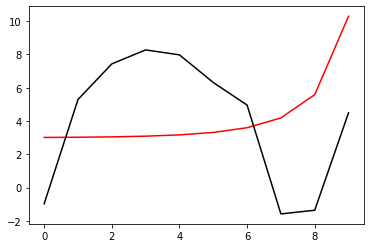

4700 5.315484536978562
[-0.94812095  5.25465138  7.39367194  8.25784105  7.97502024  6.32182314
  4.96878606 -1.56968242 -1.34543702  4.51199399]


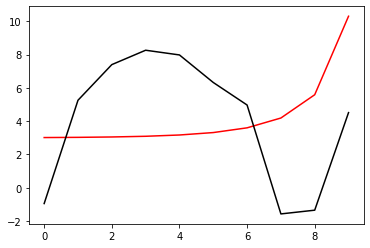

4800 5.306173392741457
[-0.92576998  5.21453347  7.35236112  8.23941421  7.97183747  6.32639979
  4.97700063 -1.55859846 -1.3318925   4.52806766]


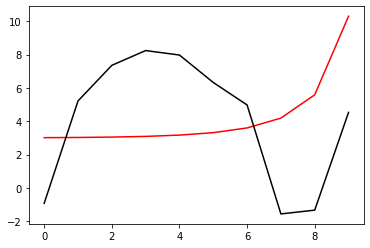

4900 5.297055216073654
[-0.90316777  5.174338    7.31107216  8.22035546  7.9683736   6.33092617
  4.9852226  -1.54745583 -1.31827117  4.54424601]


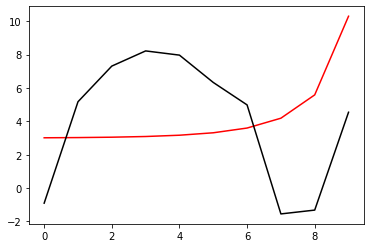

5000 5.288133416426151
[-0.88034454  5.13410037  7.26987464  8.20072544  7.96466687  6.33543593
  4.99347845 -1.53623358 -1.30455785  4.56054008]


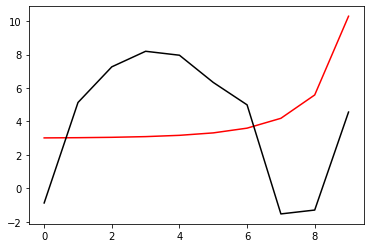

In [47]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 5.2710264845313635
[-0.84561789  5.08332977  7.2183575   8.14793046  7.9085007   6.31484668
  5.03016366 -1.4923764  -1.25855306  4.60765943]


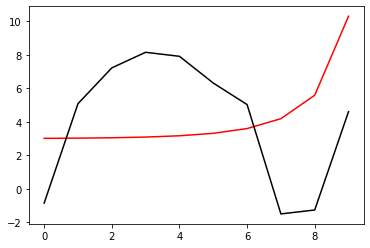

200 5.2557352295413455
[-0.81013286  5.03348429  7.16793251  8.09629906  7.85393289  6.25342665
  5.05631261 -1.45221055 -1.21525938  4.65252059]


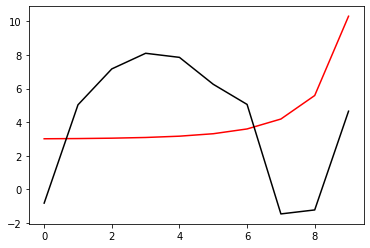

300 5.241762316901134
[-0.775198    4.98479479  7.11900099  8.04645215  7.80177358  6.1942647
  5.07829655 -1.41331369 -1.17334327  4.69598743]


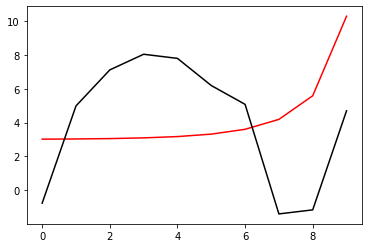

400 5.22894350822287
[-0.74080336  4.93717013  7.07141898  7.99818149  7.75161418  6.13835162
  5.09737806 -1.37543766 -1.13268524  4.73815164]


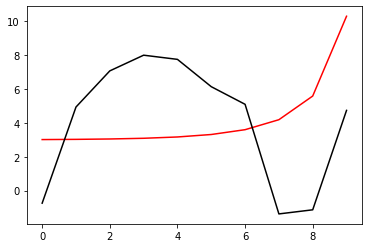

500 5.217144475195815
[-0.70691157  4.8905269   7.0250727   7.95134715  7.70323554  6.08548948
  5.114382   -1.33842204 -1.09318575  4.7791009 ]


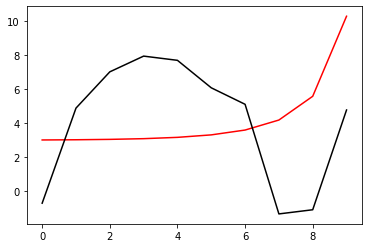

600 5.2062527201238495
[-0.67348079  4.84478805  6.97985915  7.9058284   7.65646692  6.03539907
  5.12983891 -1.30216948 -1.05477002  4.81890868]


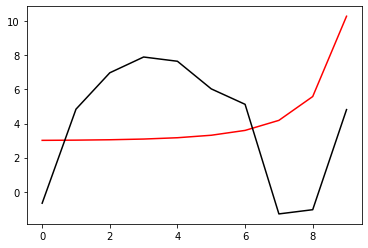

700 5.196172060692377
[-0.64047044  4.7998832   6.93568475  7.8615185   7.61116689  5.98783994
  5.14410449 -1.26661283 -1.01737543  4.85764061]


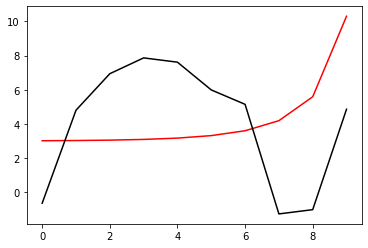

800 5.186819216706637
[-0.60784242  4.75574824  6.89246411  7.81832206  7.56721489  5.94261713
  5.15742445 -1.23170009 -0.98094595  4.89535742]


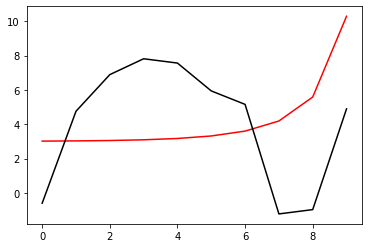

900 5.17812149459237
[-0.57556115  4.71232473  6.85011896  7.776153    7.5245062   5.89957317
  5.16997118 -1.19738749 -0.94542979  4.93211607]


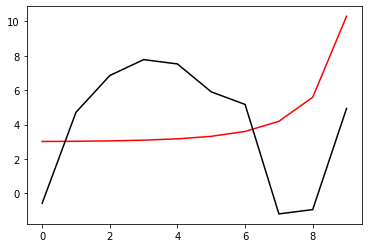

1000 5.170015085176831
[-0.54359343  4.6695593   6.80857726  7.73493301  7.48294846  5.85857998
  5.18186605 -1.16363612 -0.91077836  4.96797032]


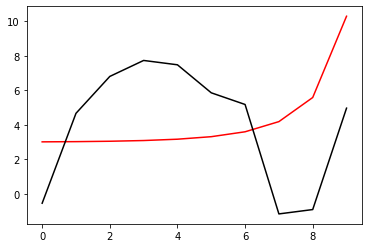

1100 5.16244374088961
[-0.51190821  4.62740316  6.76777242  7.69459043  7.44245937  5.81953262
  5.19319363 -1.13041026 -0.87694581  5.00297099]


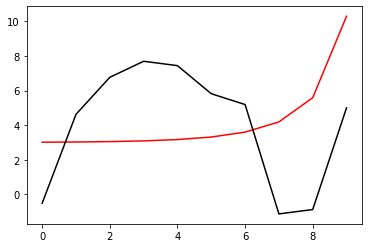

1200 5.1553577099232575
[-0.48047643  4.58581165  6.7276427   7.65505929  7.40296491  5.78234468
  5.20401122 -1.09767652 -0.84388879  5.03716608]


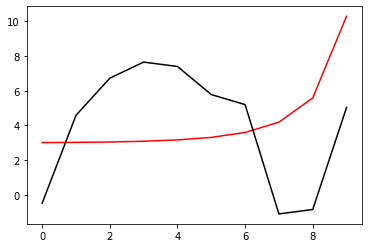

1300 5.14871285707934
[-0.44927078  4.54474388  6.68813067  7.61627857  7.36439807  5.74694491
  5.21435543 -1.06540335 -0.81156629  5.070601  ]


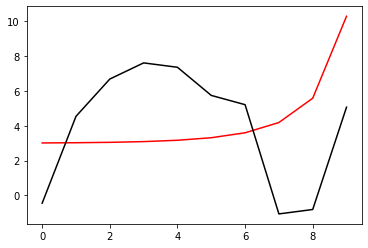

1400 5.142469927326599
[-0.41826561  4.50416238  6.64918279  7.57819164  7.32669785  5.71327469
  5.22424685 -1.03356074 -0.77993949  5.10331862]


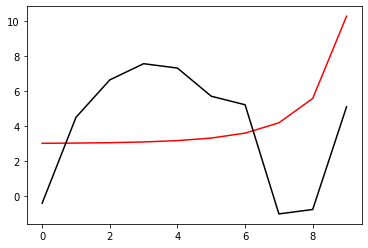

1500 5.136593922406734
[-0.38743678  4.46403283  6.61074904  7.54074571  7.28980847  5.68128607
  5.23369352 -1.00212013 -0.74897174  5.13535944]


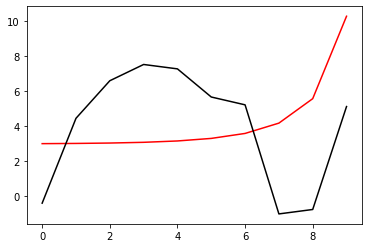

1600 5.1310535692099775
[-0.35676153  4.42432382  6.57278257  7.50389147  7.25367874  5.65094028
  5.24269344 -0.97105424 -0.71862838  5.16676173]


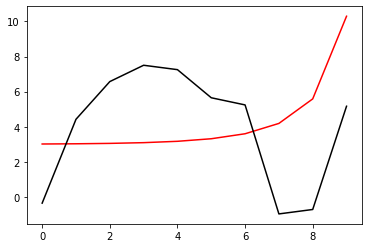

1700 5.12582086392216
[-0.32621838  4.38500658  6.53523948  7.46758266  7.21826153  5.62220651
  5.25123655 -0.94033703 -0.68887669  5.19756163]


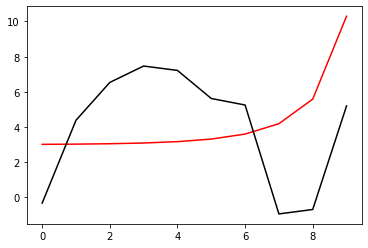

1800 5.120870679484388
[-0.29578709  4.34605484  6.49807849  7.43177581  7.18351333  5.59506088
  5.25930623 -0.90994364 -0.65968576  5.22779328]


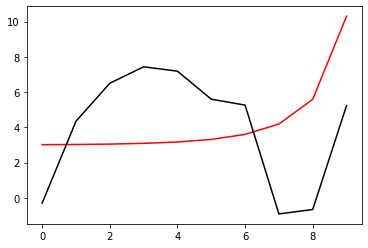

1900 5.116180426413971
[-0.26544851  4.3074446   6.46126082  7.39642993  7.14939392  5.56948559
  5.26688053 -0.87985035 -0.63102642  5.25748899]


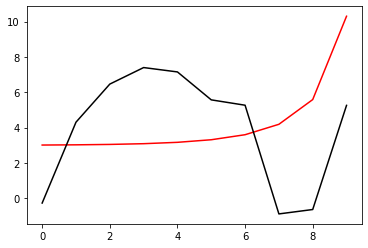

2000 5.111729758891561
[-0.23518456  4.26915402  6.42474993  7.36150631  7.11586601  5.54546814
  5.27393312 -0.85003452 -0.60287112  5.2866793 ]


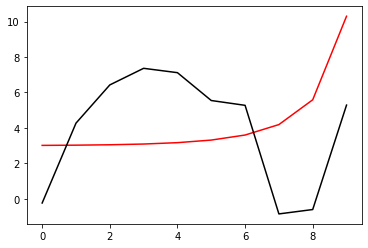

2100 5.107500319441406
[-0.20497814  4.23116325  6.38851137  7.3269683   7.08289505  5.5230006
  5.28043421 -0.82047459 -0.57519387  5.31539314]


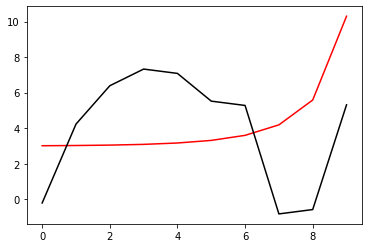

2200 5.103475516650607
[-0.17481308  4.19345432  6.35251269  7.2927811   7.05044891  5.50207896
  5.28635123 -0.79114998 -0.54797011  5.34365792]


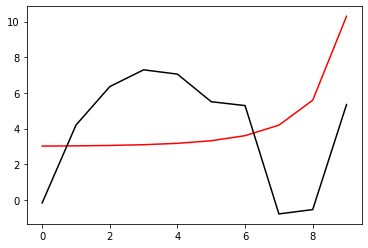

2300 5.099640331269561
[-0.14467408  4.15601102  6.31672322  7.25891166  7.01849777  5.48270243
  5.29164955 -0.76204109 -0.52117663  5.37149966]


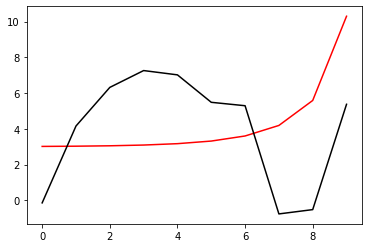

2400 5.095981146764286
[-0.1145467   4.11881878  6.28111405  7.22532846  6.9870139   5.46487274
  5.29629316 -0.73312925 -0.4947915   5.39894304]


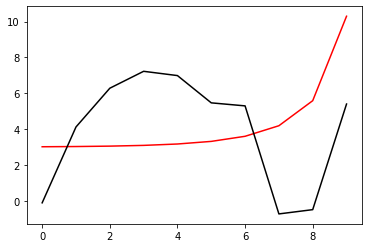

2500 5.092485600988366
[-0.08441724  4.08186465  6.24565785  7.19200145  6.95597156  5.44859349
  5.30024526 -0.70439669 -0.46879399  5.42601158]


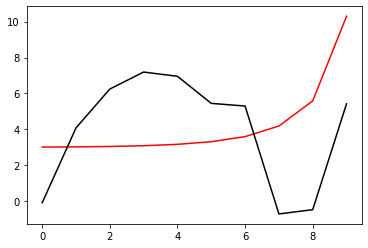

2600 5.089142456135896
[-0.05427278  4.04513713  6.21032887  7.15890194  6.92534684  5.43386931
  5.30346899 -0.67582649 -0.44316447  5.45272762]


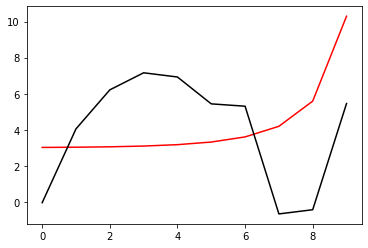

2700 5.0859414845444935
[-0.02410107  4.00862616  6.17510279  7.12600247  6.89511754  5.42070513
  5.30592805 -0.64740253 -0.41788433  5.47911251]


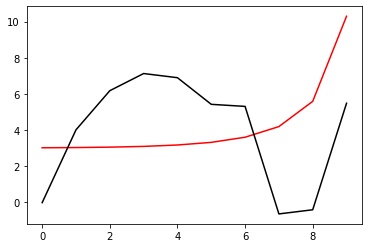

2800 5.082873368256775
[ 6.10946255e-03  3.97232303e+00  6.13995671e+00  7.09327675e+00
  6.86526313e+00  5.40910527e+00  5.30758750e+00 -6.19109462e-01
 -3.92935966e-01  5.50518661e+00]


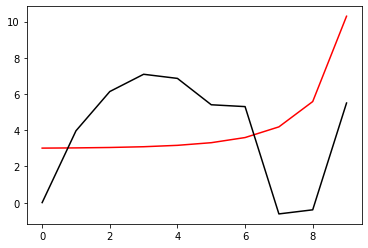

2900 5.079929610529956
[ 0.03636975  3.93622035  6.10486908  7.06069961  6.83576463  5.39907254
  5.30841444 -0.59093266 -0.36830263  5.53096943]


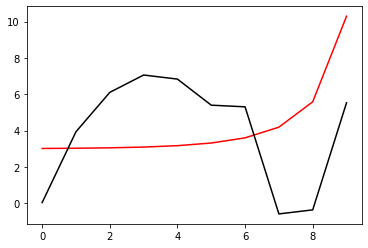

3000 5.0771024577166095
[ 0.06669015  3.90031197  6.06981966  7.02824692  6.80660455  5.39060727
  5.3083789  -0.5628582  -0.34396842  5.55647962]


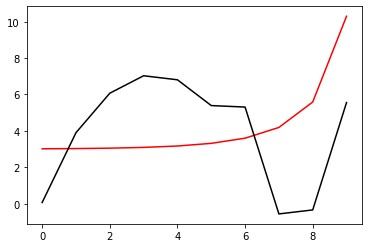

3100 5.074384830133298
[ 0.09708043  3.86459295  6.03478945  6.99589559  6.77776679  5.38370624
  5.30745455 -0.53487278 -0.31991821  5.58173514]


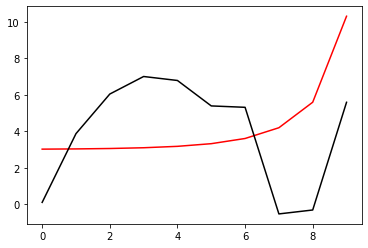

3200 5.071770260695046
[ 0.12754988  3.82905953  5.99976071  6.96362345  6.74923663  5.37836167
  5.30561966 -0.5069637  -0.29613756  5.60675322]


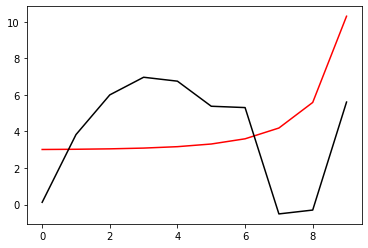

3300 5.069252840228412
[ 0.15810724  3.79370908  5.9647169   6.93140933  6.72100064  5.37456014
  5.30285784 -0.47911882 -0.27261269  5.6315505 ]


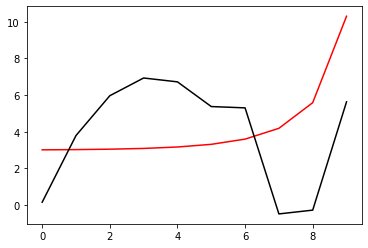

3400 5.06682716848994
[ 0.18876082  3.75854009  5.92964268  6.89923295  6.69304659  5.37228148
  5.29915889 -0.45132652 -0.24933041  5.65614302]


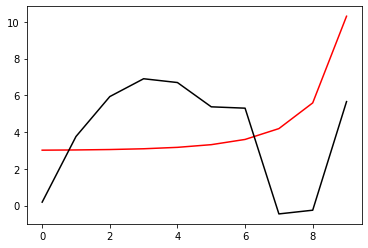

3500 5.0644883100163725
[ 0.21951852  3.72355215  5.89452385  6.86707495  6.66536342  5.37149781
  5.29451948 -0.42357563 -0.22627807  5.68054633]


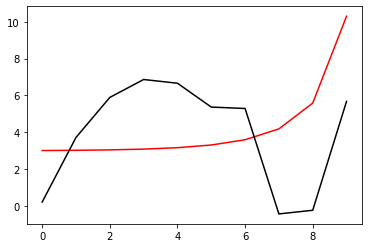

3600 5.062231754020831
[ 0.25038782  3.6887459   5.85934737  6.83491688  6.63794113  5.37217258
  5.28894385 -0.39585544 -0.2034435   5.70477551]


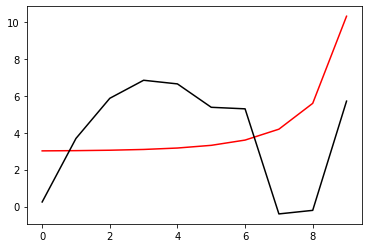

3700 5.060053377631037
[ 0.28137586  3.65412303  5.82410131  6.80274114  6.61077072  5.37425973
  5.28244419 -0.36815561 -0.18081499  5.72884521]


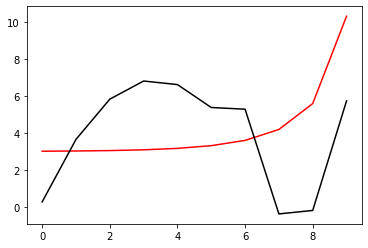

3800 5.057949411841967
[ 0.31248949  3.61968629  5.78877485  6.77053105  6.58384404  5.3777031
  5.275041   -0.34046617 -0.15838119  5.75276974]


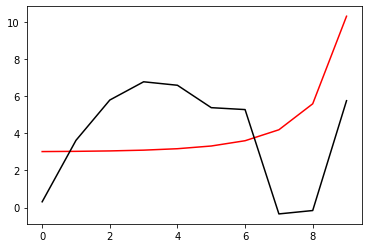

3900 5.055916409627484
[ 0.34373529  3.58543942  5.75335825  6.73827076  6.55715366  5.38243588
  5.26676312 -0.31277748 -0.13613109  5.77656308]


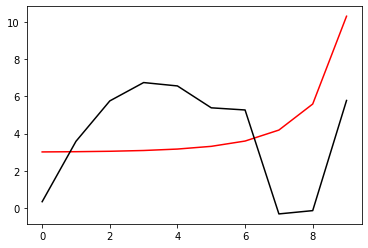

4000 5.053951215721072
[ 0.37511967  3.55138718  5.71784281  6.70594526  6.53069277  5.38838037
  5.2576475  -0.28508015 -0.11405398  5.80023894]


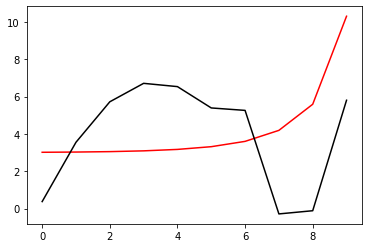

4100 5.052050937629164
[ 0.40664896  3.51753534  5.68222084  6.67354035  6.50445494  5.39544794
  5.24773872 -0.25736509 -0.09213938  5.82381083]


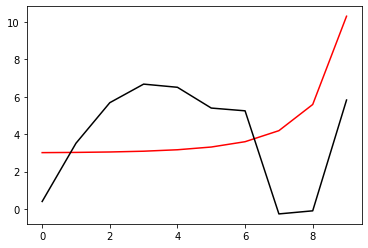

4200 5.050212917473545
[ 0.4383295   3.48389062  5.6464856   6.6410426   6.4784339   5.40353911
  5.23708818 -0.22962342 -0.07037698  5.8472921 ]


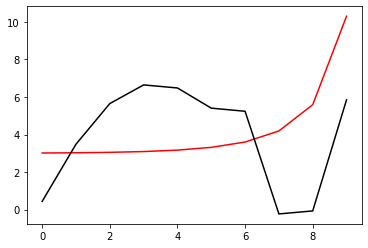

4300 5.048434704255901
[ 0.47016785  3.45046075  5.61063124  6.60843927  6.45262329  5.41254388
  5.22575288 -0.20184646 -0.04875655  5.87069606]


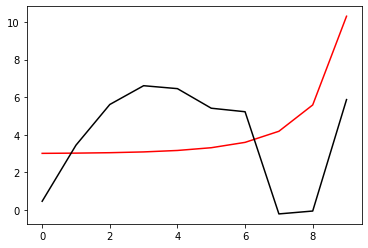

4400 5.046714026078402
[ 0.50217106  3.41725438  5.57465273  6.5757182   6.42701634  5.42234207
  5.21379396 -0.1740257  -0.0272679   5.894036  ]


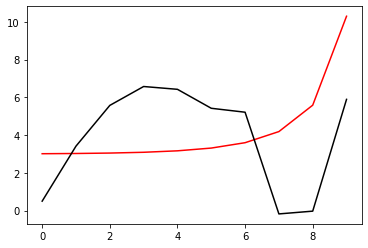

4500 5.045048761701523
[ 5.34347038e-01  3.38428107e+00  5.53854575e+00  6.54286769e+00
  6.40160540e+00  5.43280368e+00  5.20127471e+00 -1.46152771e-01
 -5.90073238e-03  5.91732539e+00]


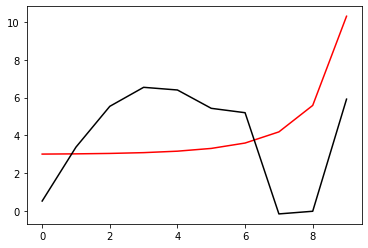

4600 5.043436910513795
[ 0.5667052   3.35155128  5.50230652  6.50987632  6.37638145  5.44378901
  5.18825819 -0.11821941  0.01535548  5.94057796]


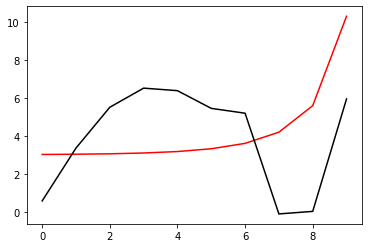

4700 5.041876559412379
[ 0.59925737  3.31907629  5.4659316   6.47673257  6.35133337  5.45514841
  5.17480409 -0.09021745  0.03651172  5.96380799]


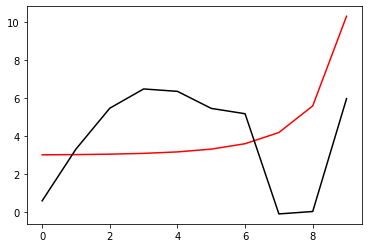

4800 5.040365844006439
[ 0.63201933  3.28686812  5.42941762  6.44342448  6.32644693  5.46672122
  5.16096469 -0.06213875  0.05757968  5.98703059]


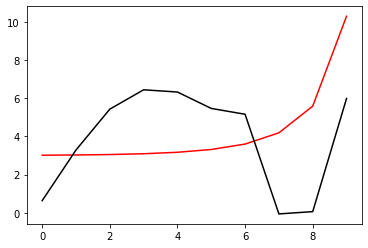

4900 5.038902899429095
[ 0.66501338  3.25493937  5.39276078  6.40993887  6.30170335  5.47833315
  5.14677908 -0.03397523  0.07857214  6.01026218]


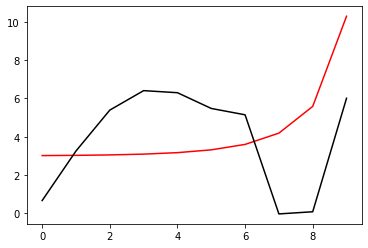

5000 5.037485791593282
[ 6.98272721e-01  3.22330306e+00  5.35595621e+00  6.37626024e+00
  6.27707694e+00  5.48979107e+00  5.13226427e+00 -5.71890314e-03
  9.95036211e-02  6.03352119e+00]


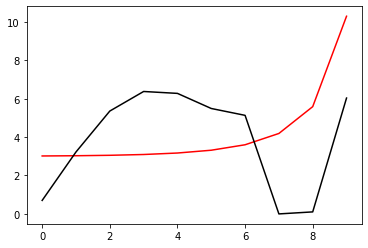

In [48]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 5.0353405158608675
[0.74967687 3.17390639 5.30615772 6.32642055 6.2273648  5.51995459
 5.07717179 0.04307743 0.14817856 6.08258987]


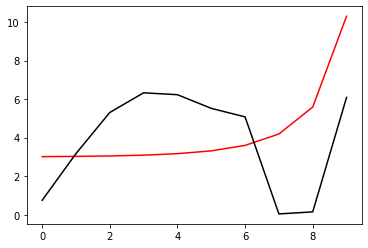

200 5.0333489812387056
[0.8025995  3.12622747 5.25701874 6.27736531 6.17952582 5.52119945
 5.02623028 0.09078556 0.19527559 6.13033182]


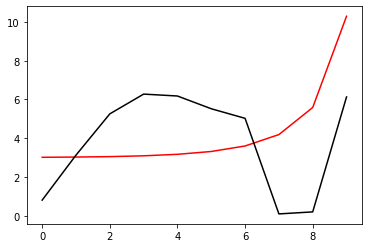

300 5.031478753897595
[0.85752799 3.08030028 5.20844065 6.22895282 6.13313454 5.50473629
 4.97981336 0.13796924 0.24151211 6.17727059]


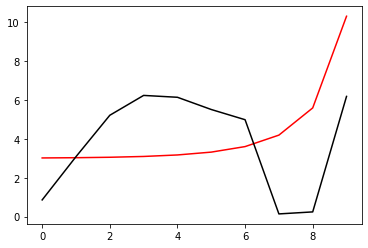

400 5.017089150021631
[0.95847986 3.0546403  5.17274025 6.19212829 6.0996838  5.46271187
 4.91974399 0.1791111  0.27981792 6.21844272]


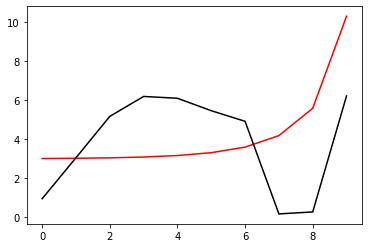

500 3.388917184822255
[1.05201709 3.12058287 5.2003859  6.18251538 6.06452575 5.41027213
 4.85079854 0.06867592 0.13321023 6.07329287]


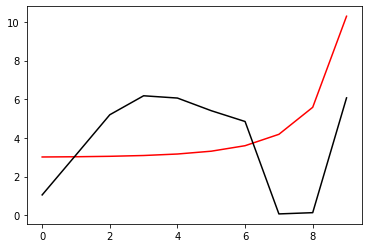

600 3.23853623208366
[1.07548107 3.12607467 5.1809489  6.14496896 6.02001981 5.36385887
 4.80414797 0.02245072 0.08809796 6.03031996]


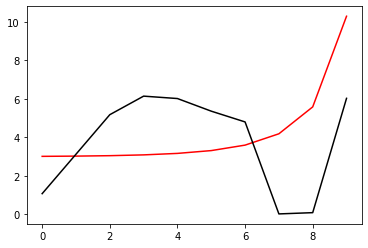

700 3.191656427219203
[ 1.08997868e+00  3.12854416e+00  5.16741942e+00  6.12134540e+00
  5.99340715e+00  5.33699418e+00  4.77783972e+00 -2.85531889e-03
  6.44986173e-02  6.00954335e+00]


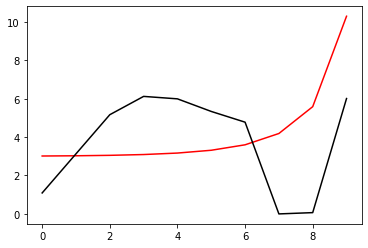

800 3.1699908221476183
[ 1.10100976  3.12976006  5.15622611  6.10321921  5.97386053  5.31794636
  4.75980787 -0.01945203  0.0501396   5.99870483]


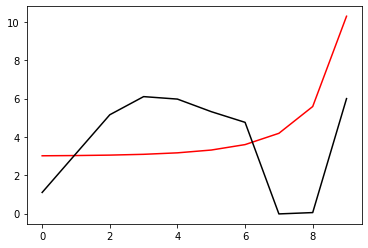

900 3.157946625638653
[ 1.11021256  3.13021589  5.14618921  6.0880193   5.9581863   5.30329644
  4.74654927 -0.03088397  0.04145537  5.99423445]


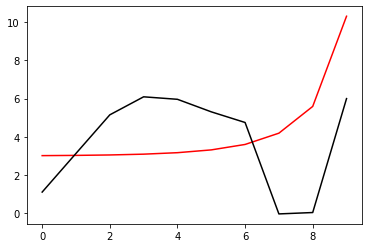

1000 3.150273400999682
[ 1.11833296  3.13013718  5.13675798  6.07457093  5.94493706  5.29149465
  4.73647074 -0.03877159  0.03680192  5.99446146]


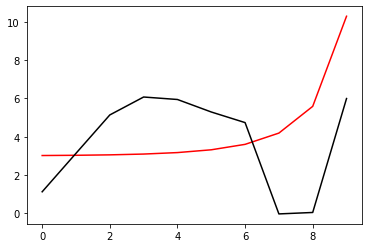

1100 3.144747463945417
[ 1.12578576  3.12965379  5.12762629  6.06222033  5.933305    5.28167037
  4.72866992 -0.04404184  0.03522336  5.99838713]


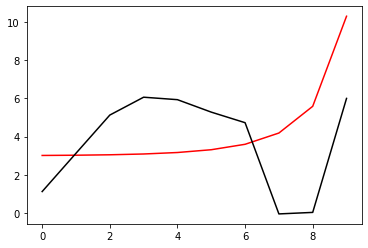

1200 3.14030570770922
[ 1.13283086  3.12885131  5.11860469  6.05055723  5.92277839  5.27326617
  4.72256225 -0.04730328  0.03607839  6.00531703]


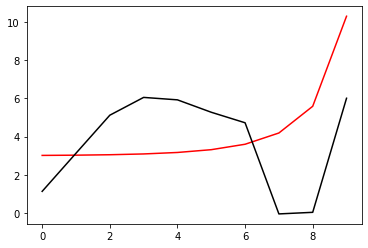

1300 3.1364061281978337
[ 1.13964433  3.12779114  5.10956737  6.03930305  5.9130051   5.26589347
  4.71773479 -0.04899207  0.0388964   6.0147224 ]


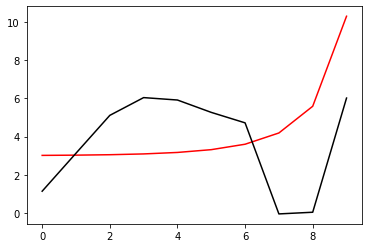

1400 3.1327643018813736
[ 1.14635211  3.12651992  5.10042676  6.02825855  5.90372933  5.25926613
  4.71387939 -0.04943822  0.04331329  6.02618018]


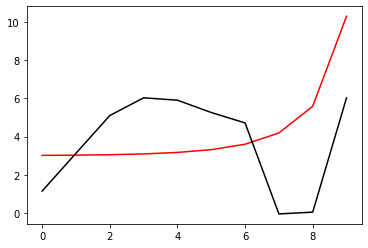

1500 3.1292303779750545
[ 1.15304808  3.12507466  5.09112015  6.01727623  5.89475863  5.25316605
  4.7107583  -0.04889937  0.04903924  6.03934409]


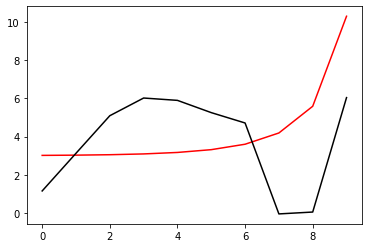

1600 3.1257266159127504
[ 1.15980479  3.12348582  5.08160181  6.00624442  5.88594483  5.24742333
  4.70818441 -0.04758008  0.05584055  6.05392859]


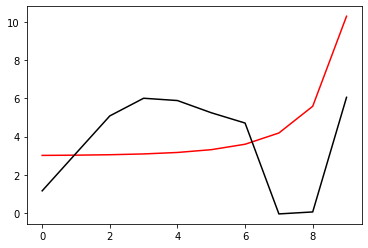

1700 3.122213869214648
[ 1.1666807   3.12177964  5.07183812  5.99507701  5.87717175  5.24190348
  4.70600852 -0.04564428  0.06352782  6.06969839]


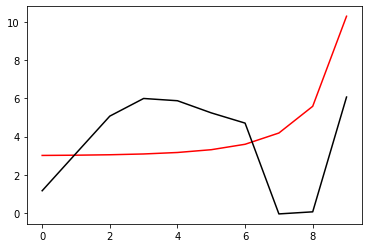

1800 3.118672895720879
[ 1.17372586  3.11998019  5.06180414  5.98370601  5.86834623  5.23649798
  4.70410988 -0.04322465  0.07194701  6.0864602 ]


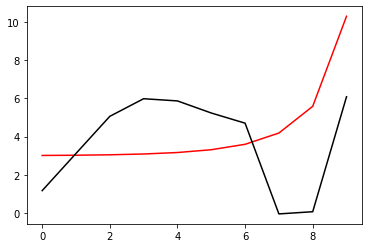

1900 3.1150934440810985
[ 1.18098771  3.11811195  5.05148117  5.9720754   5.85939047  5.23111616
  4.70238796 -0.04043069  0.08097161  6.1040552 ]


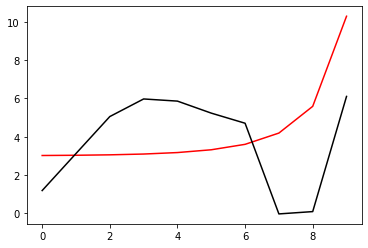

2000 3.1114670705367615
[ 1.1885188   3.11620406  5.04085512  5.96013506  5.85023397  5.22567648
  4.70075371 -0.0373574   0.09049449  6.12235146]


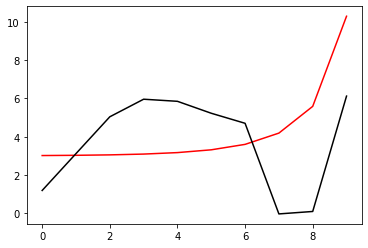

2100 3.1077804588228455
[ 1.19639143  3.11429991  5.02991658  5.94783341  5.84080285  5.22009463
  4.69911745 -0.03409704  0.10041707  6.14123437]


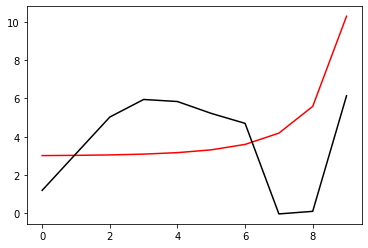

2200 3.104003533865788
[ 1.20473655  3.11248615  5.01866831  5.93510667  5.83100004  5.21426006
  4.6973646  -0.03076285  0.11062809  6.16058913]


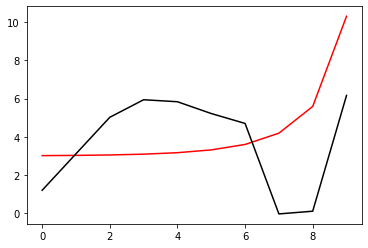

2300 3.100044056042884
[ 1.21390855  3.11103272  5.00718916  5.92186944  5.82065562  5.20796761
  4.6952802  -0.02756557  0.12093293  6.18024064]


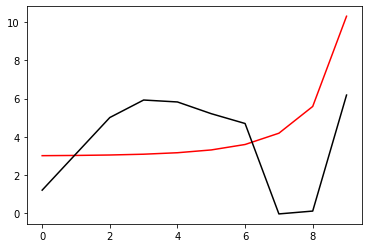

2400 3.0945473692208383
[ 1.22686868  3.11281196  4.9973136   5.90870976  5.80958598  5.20062283
  4.69206162 -0.02540325  0.13041599  6.19930136]


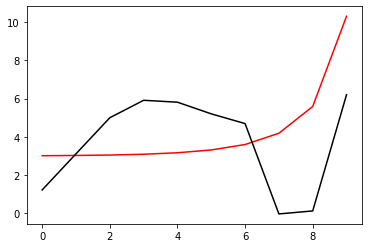

2500 0.6541794090752041
[ 1.31606791  3.16958738  5.01284209  5.88200142  5.74744932  5.11350176
  4.59021614 -0.1344767   0.01829207  6.08795964]


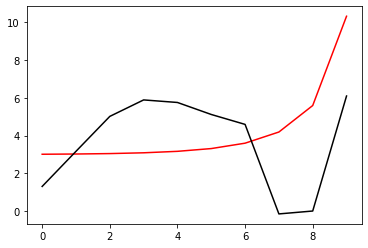

2600 0.5279045060087327
[ 1.33756027  3.17101169  4.99436247  5.84928422  5.7078096   5.0722879
  4.55065329 -0.17027099 -0.00917209  6.07555417]


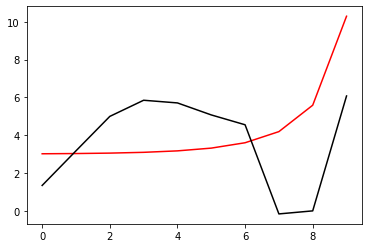

2700 0.48961268648499745
[ 1.3507066   3.16987163  4.98031003  5.82771401  5.68438275  5.05076763
  4.53333101 -0.18160281 -0.00928156  6.09443518]


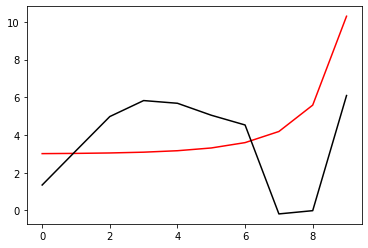

2800 0.46344791088970794
[ 1.36144834e+00  3.16799392e+00  4.96762304e+00  5.80958537e+00
  5.66598463e+00  5.03543038e+00  4.52313460e+00 -1.84874158e-01
 -6.49961880e-05  6.12389795e+00]


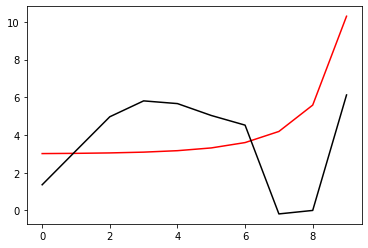

2900 0.4405764198193721
[ 1.37117541  3.16577189  4.95548611  5.79293921  5.6498014   5.02287374
  4.51622507 -0.18431927  0.01365383  6.15802043]


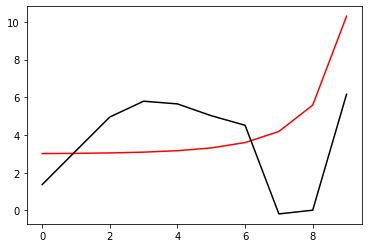

3000 0.41914792437136733
[ 1.3804313   3.16336224  4.94357709  5.77699697  5.63470813  5.01172544
  4.51103623 -0.1816916   0.02981997  6.19421827]


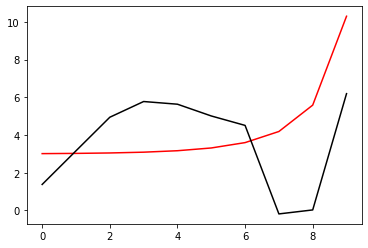

3100 0.3986959416669258
[ 1.38946872  3.160841    4.93174807  5.76139449  5.62017274  5.00132891
  4.50680951 -0.17785186  0.04740197  6.23121084]


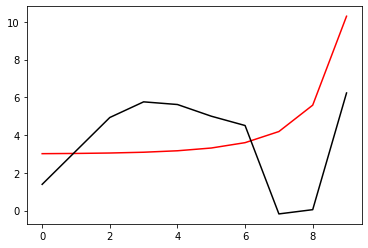

3200 0.37909266956186116
[ 1.39841415  3.15824906  4.9199279   5.74595002  5.60592473  4.99134498
  4.50314713 -0.1732578   0.06583942  6.26833157]


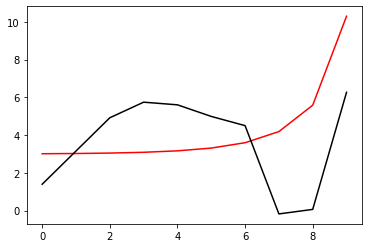

3300 0.36029934665031205
[ 1.4073322   3.15560994  4.9080833   5.7305719   5.59182336  4.98159289
  4.49983258 -0.16816325  0.08481336  6.30522785]


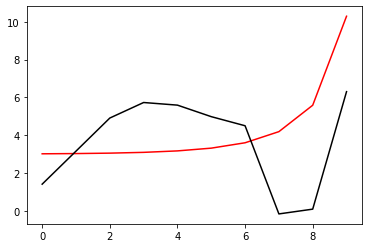

3400 0.3422996878409893
[ 1.41625515  3.15293789  4.89620066  5.7152157   5.57779628  4.97197586
  4.49674604 -0.16271257  0.10413551  6.34171379]


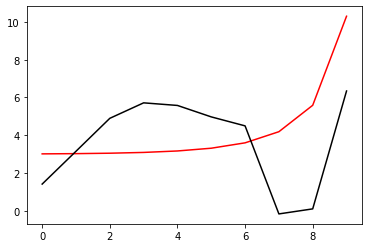

3500 0.3250814018695529
[ 1.42519785  3.15024195  4.88427677  5.69986228  5.56380814  4.96244299
  4.49382082 -0.15698964  0.12369044  6.37769373]


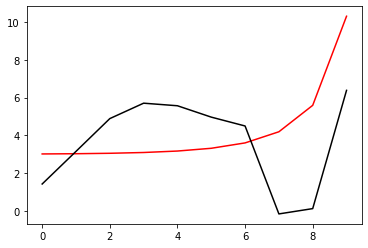

3600 0.3086311609125355
[ 1.43416577  3.1475282   4.87231386  5.68450605  5.54984373  4.95296864
  4.4910198  -0.15104449  0.14340397  6.41312114]


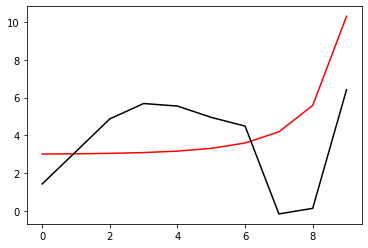

3700 0.29293343482786993
[ 1.44315932  3.144801    4.86031685  5.66914858  5.53589873  4.94354107
  4.4883223  -0.14490808  0.16322568  6.44797649]


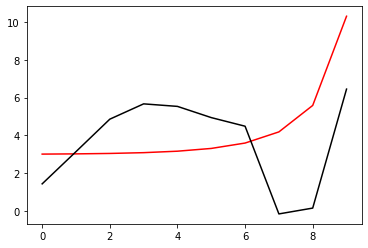

3800 0.27797043943519517
[ 1.45217631  3.14206361  4.84829188  5.65379496  5.52197452  4.93415613
  4.48571679 -0.13860058  0.18311915  6.4822551 ]


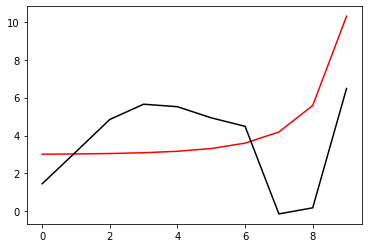

3900 0.2637223974084908
[ 1.46121332  3.13931862  4.83624544  5.63845191  5.50807537  4.92481366
  4.4831968  -0.13213603  0.20305645  6.51596053]


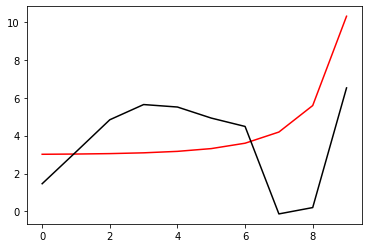

4000 0.250167875693163
[ 1.4702664   3.13656817  4.82418392  5.62312662  5.49420678  4.9155156
  4.4807586  -0.12552489  0.2230151   6.54910094]


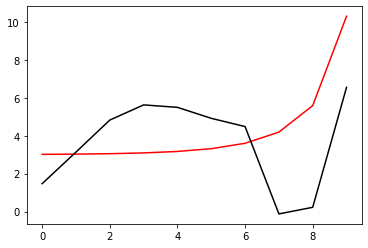

4100 0.23728412816995462
[ 1.47933153  3.13381408  4.81211339  5.60782619  5.48037466  4.9062648
  4.47839997 -0.11877551  0.24297629  6.58168712]


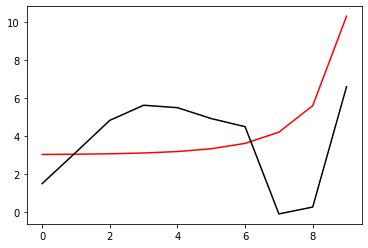

4200 0.2250474206670396
[ 1.48840482  3.13105789  4.80003946  5.59255735  5.46658488  4.89706453
  4.47611946 -0.11189494  0.26292391  6.61373135]


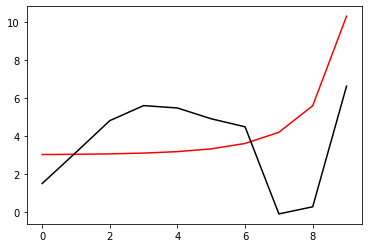

4300 0.2134333301069155
[ 1.49748263  3.12830094  4.78796721  5.57732625  5.45284297  4.88791806
  4.47391603 -0.10488933  0.28284398  6.64524676]


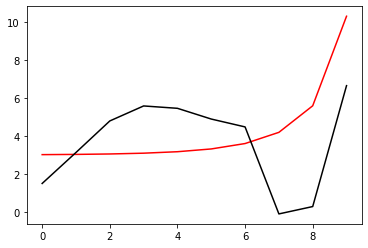

4400 0.20241701454832522
[ 1.50656163  3.12554438  4.77590121  5.56213847  5.43915404  4.87882856
  4.47178881 -0.09776421  0.30272422  6.67624695]


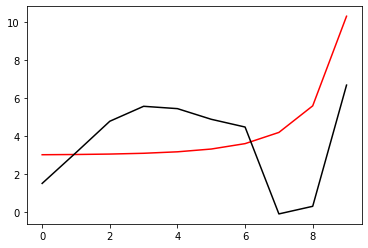

4500 0.1919734530104743
[ 1.51563881  3.1227892   4.7638455   5.54699893  5.42552275  4.86979901
  4.46973702 -0.09052463  0.3225539   6.70674575]


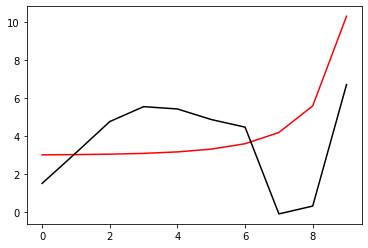

4600 0.18207765517448743
[ 1.52471148  3.12003624  4.7518036   5.53191195  5.41195326  4.86083212
  4.46775988 -0.08317524  0.34232358  6.7367571 ]


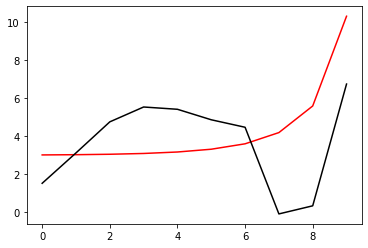

4700 0.17270484187664692
[ 1.53377731  3.11728618  4.73977856  5.51688126  5.39844924  4.85193036
  4.46585661 -0.07572032  0.36202501  6.76629489]


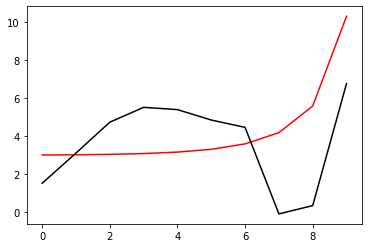

4800 0.16383059789478097
[ 1.54283424  3.11453962  4.72777294  5.50191004  5.38501393  4.84309595
  4.46402636 -0.06816384  0.38165101  6.7953729 ]


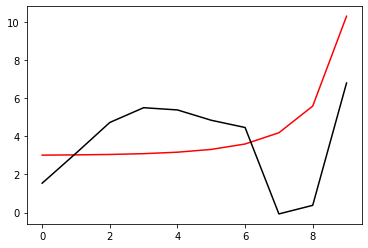

4900 0.15543099893401396
[ 1.55188054  3.11179699  4.71578891  5.48700094  5.37165016  4.83433089
  4.46226828 -0.06050946  0.40119536  6.82400476]


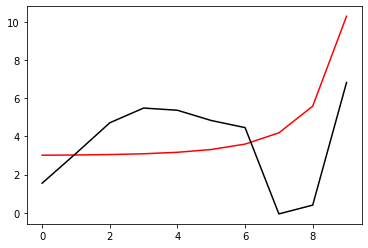

5000 0.14748271497294607
[ 1.56091472  3.10905864  4.70382821  5.47215615  5.35836034  4.82563695
  4.46058145 -0.05276058  0.42065271  6.85220388]


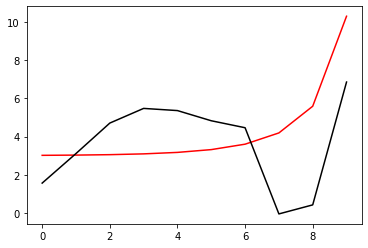

In [49]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 0.12181760859120996
[ 1.60918677e+00  3.06895346e+00  4.65603645e+00  5.42450877e+00
  5.31118111e+00  4.78001942e+00  4.49921691e+00 -2.21258928e-03
  4.70000421e-01  6.90116712e+00]


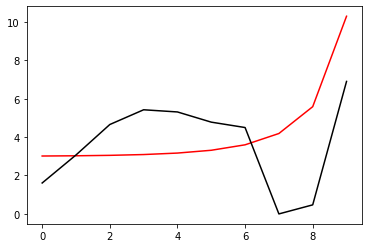

200 0.10211170614356255
[1.65342292 3.03164695 4.61202926 5.38079957 5.26814486 4.73912113
 4.55581812 0.0444634  0.51521364 6.94596885]


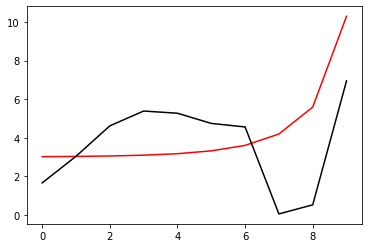

300 0.08678678790416205
[1.69401105 2.99828457 4.57127978 5.34050092 5.22869107 4.70219722
 4.60834617 0.08758016 0.55667999 6.98703124]


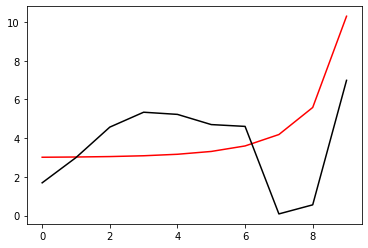

400 0.07468567468529946
[1.73142351 2.96837883 4.53327549 5.3031123  5.19232668 4.66874607
 4.656829   0.1276352  0.59491475 7.02487642]


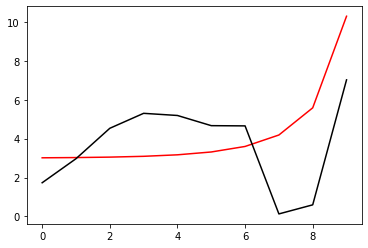

500 0.06499194990013671
[1.76606654 2.94148956 4.49759132 5.26821365 5.15863843 4.63835701
 4.70162644 0.16505133 0.63035382 7.05994508]


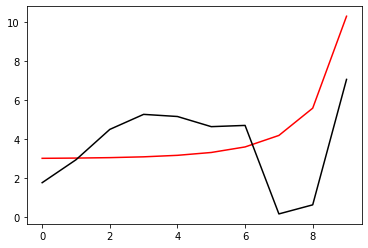

600 0.05712282165789729
[1.79828257 2.91724904 4.46387331 5.2354524  5.12728086 4.61069515
 4.74309145 0.20018968 0.66336624 7.09260905]


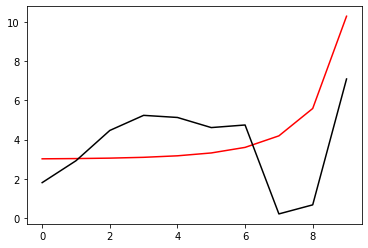

700 0.05065640916085644
[1.82835956 2.89535382 4.43182583 5.20453145 5.09796396 4.58548493
 4.78152788 0.23335733 0.69426383 7.12318176]


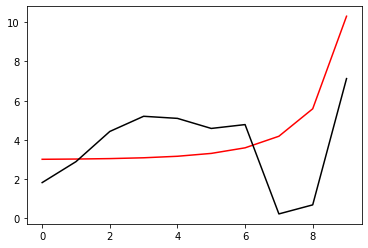

800 0.04528290581910287
[1.85654022 2.87555321 4.40120115 5.17519932 5.07044313 4.56249803
 4.81718942 0.2648153  0.72331036 7.15192795]


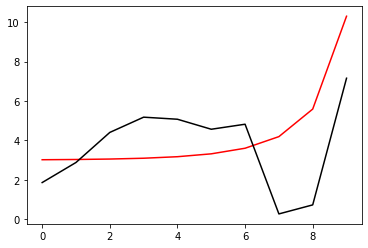

900 0.04077158933323659
[1.88302989 2.85763899 4.37179108 5.14724201 5.04451114 4.54154441
 4.85028607 0.29478606 0.7507297  7.17907202]


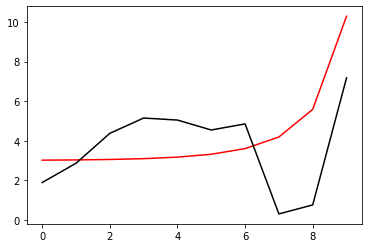

1000 0.03694830719045928
[1.90800321 2.84143688 4.34342003 5.12047647 5.01999161 4.52246526
 4.88099113 0.32346012 0.77671264 7.20480512]


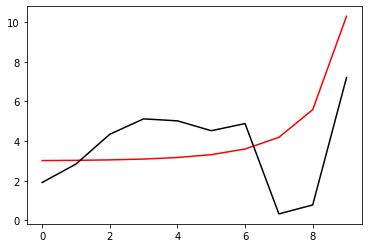

1100 0.0336799242489534
[1.93160958 2.82679964 4.31593952 5.09474518 4.99673377 4.50512748
 4.90944755 0.3510014  0.80142268 7.22929091]


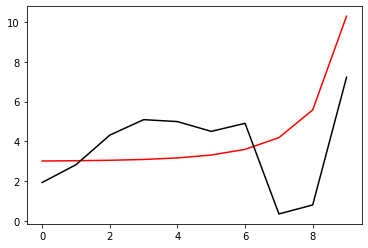

1200 0.03086344091827964
[1.9539776  2.81360168 4.28922373 5.06991187 4.97460814 4.48941928
 4.93577308 0.37755183 0.82500059 7.25267026]


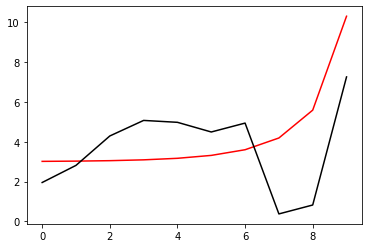

1300 0.028418280131390083
[1.9752187  2.80173468 4.26316588 5.04585799 4.95350314 4.47524659
 4.96006451 0.40323494 0.84756828 7.27506515]


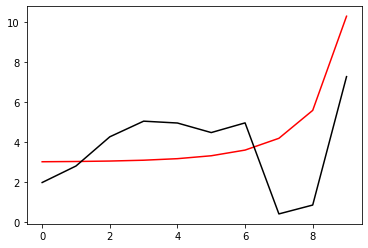

1400 0.026280750375177193
[1.99543008 2.79110412 4.23767529 5.02247989 4.93332222 4.46253009
 4.98240124 0.42815894 0.86923187 7.29658172]


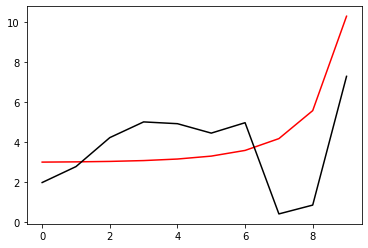

1500 0.024400021625045513
[2.01469714 2.78162653 4.21267507 4.99968646 4.91398162 4.4512028
 5.00284813 0.45241909 0.89008419 7.31731287]


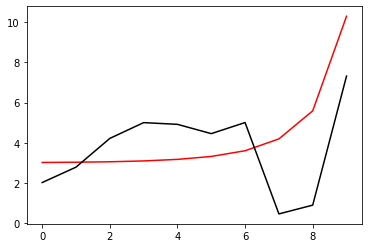

1600 0.022735166087954686
[2.03309542 2.77322725 4.18810012 4.9773973  4.89540843 4.44120802
 5.02145793 0.47609975 0.91020686 7.33734029]


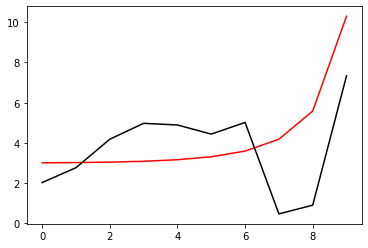

1700 0.021252957378525894
[2.05069226 2.76583862 4.16389555 4.9555411  4.8775391  4.43249759
 5.03827338 0.49927599 0.92967199 7.35673619]


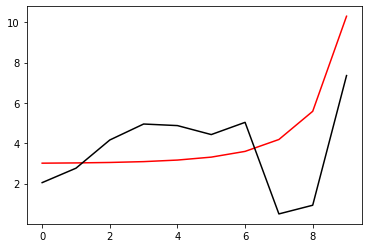

1800 0.019926216161877223
[2.06754813 2.75939854 4.14001541 4.93405443 4.8603181  4.4250304
 5.053329   0.52201494 0.94854356 7.37556469]


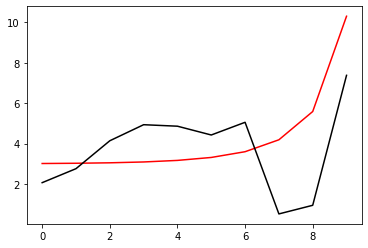

1900 0.01873255390303675
[2.08371775 2.75384923 4.11642151 4.91288068 4.84369688 4.41877106
 5.06665271 0.54437693 0.96687859 7.39388298]


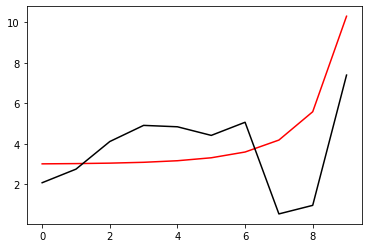

2000 0.017653409704651533
[2.09925099 2.74913632 4.09308251 4.89196916 4.82763296 4.41368872
 5.07826723 0.56641633 0.98472807 7.41174232]


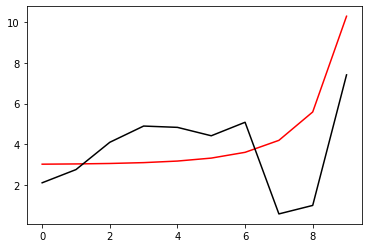

2100 0.01667330508533806
[2.11419365 2.74520805 4.06997315 4.87127437 4.81208916 4.40975603
 5.08819144 0.58818239 1.00213779 7.42918879]


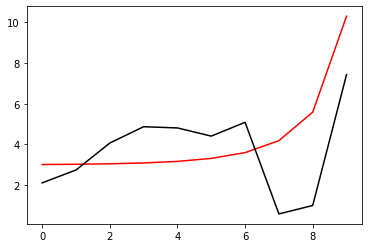

2200 0.015779262361783643
[2.12858812 2.74201464 4.04707354 4.85075546 4.79703295 4.40694813
 5.0964416  0.60971982 1.01914899 7.44626399]


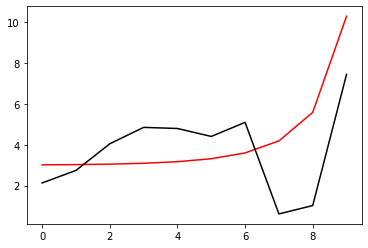

2300 0.014960346953160529
[2.14247389 2.73950781 4.02436853 4.83037565 4.78243589 4.40524173
 5.10303253 0.63106932 1.03579893 7.46300562]


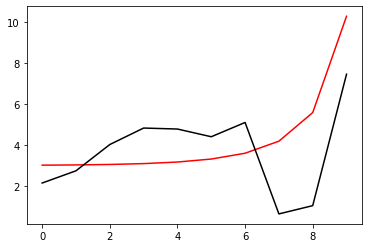

2400 0.014207304354009045
[2.15588797 2.73764039 4.00184722 4.81010181 4.76827313 4.40461429
 5.1079787  0.65226802 1.05212136 7.47944795]


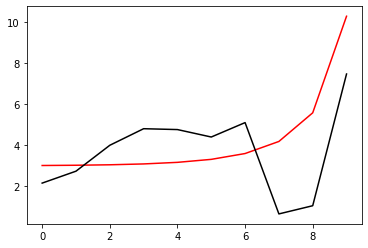

2500 0.013512270013158885
[2.16886529 2.73636608 3.97950243 4.78990413 4.75452296 4.40504315
 5.11129527 0.67334985 1.06814692 7.49562219]


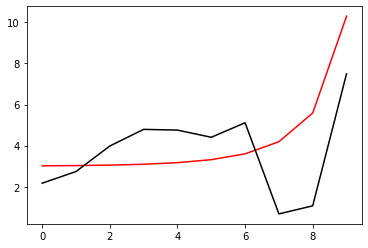

2600 0.01286853579033784
[2.18143896 2.73563923 3.9573303  4.76975579 4.74116642 4.4065048
 5.11299912 0.69434583 1.08390347 7.51155692]


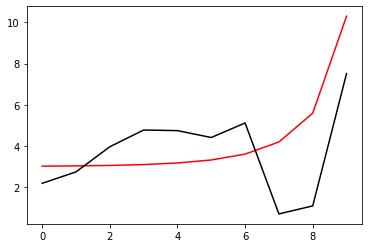

2700 0.01227036063920944
[2.1936405  2.73541477 3.93532984 4.74963268 4.72818693 4.40897414
 5.11310972 0.71528431 1.0994164  7.52727828]


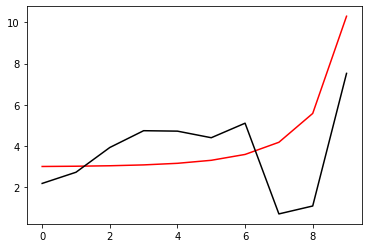

2800 0.011712816102494458
[2.20550004 2.73564816 3.91350258 4.72951318 4.71556998 4.41242378
 5.11165001 0.73619122 1.11470885 7.54281032]


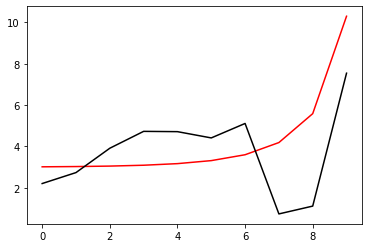

2900 0.011191659390777561
[2.21704643 2.73629543 3.8918522  4.70937797 4.70330278 4.41682344
 5.10864716 0.75709022 1.12980194 7.55817514]


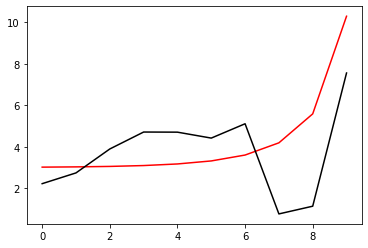

3000 0.010703228457618792
[2.22830734 2.73731328 3.87038421 4.68920986 4.69137396 4.42213938
 5.10413314 0.77800286 1.14471496 7.57339315]


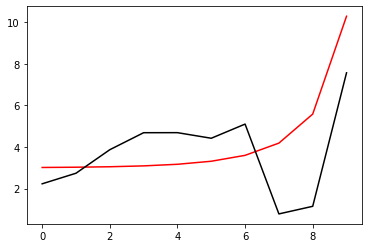

3100 0.010244354725814284
[2.2393093  2.73865922 3.84910557 4.66899361 4.6797733  4.42833388
 5.09814533 0.79894875 1.15946551 7.58848318]


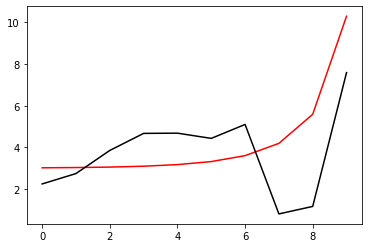

3200 0.009812290065874026
[2.25007776 2.74029175 3.82802447 4.64871583 4.66849142 4.43536486
 5.09072677 0.81994564 1.17406966 7.60346266]


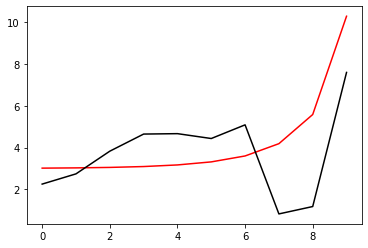

3300 0.009404645355472384
[2.26063703 2.74217061 3.80714998 4.62836485 4.65751951 4.44318558
 5.08192647 0.84100957 1.18854208 7.61834774]


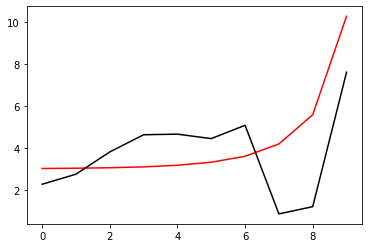

3400 0.00901933851016663
[2.27101031 2.74425699 3.78649179 4.60793065 4.64684907 4.45174437
 5.07179937 0.86215494 1.20289614 7.63315343]


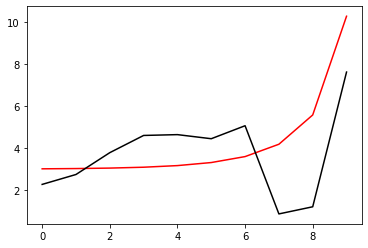

3500 0.008654550314031995
[2.28121964 2.74651381 3.76605998 4.58740471 4.6364716  4.46098456
 5.06040624 0.88339468 1.21714406 7.64789368]


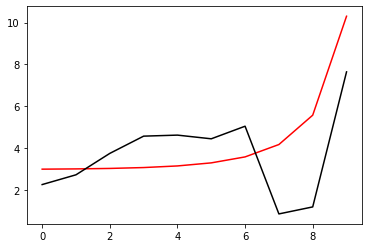

3600 0.008308686719032222
[2.29128581 2.74890598 3.74586475 4.56678    4.62637835 4.47084446
 5.04781339 0.90474028 1.23129696 7.66258152]


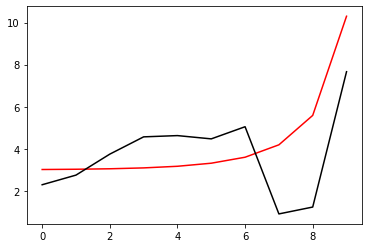

3700 0.007980346550381165
[2.30122833 2.75140072 3.72591623 4.54605088 4.61656007 4.48125746
 5.03409217 0.92620196 1.24536501 7.67722911]


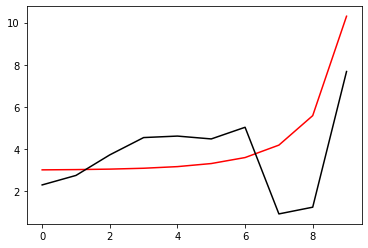

3800 0.007668293763878202
[2.31106538 2.75396772 3.70622428 4.52521305 4.60700674 4.49215223
 5.01931843 0.94778875 1.25935751 7.6918479 ]


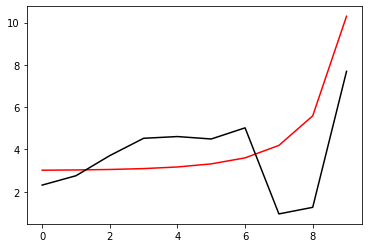

3900 0.007371433564762984
[2.32081371 2.75657947 3.68679833 4.50426354 4.5977073  4.50345297
 5.00357177 0.96950859 1.27328296 7.70644866]


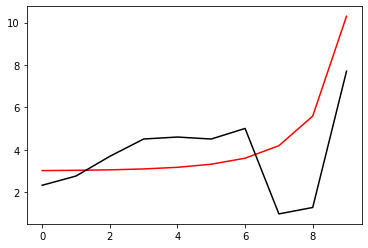

4000 0.007088791825217905
[2.33048864 2.75921139 3.66764722 4.48320059 4.58864943 4.51507982
 4.98693479 0.99136849 1.28714921 7.72104159]


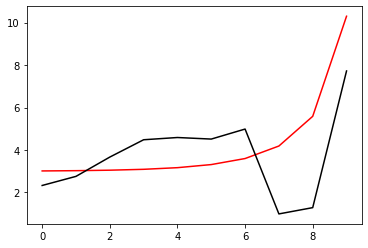

4100 0.006819497336323259
[2.34010397 2.76184204 3.64877913 4.46202369 4.57981927 4.52694923
 4.96949217 1.01337457 1.3009635  7.73563641]


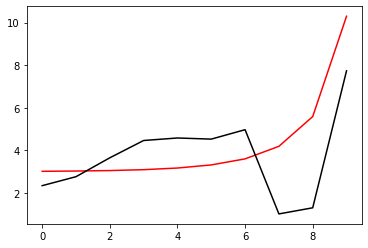

4200 0.006562766507321564
[2.34967199 2.76445319 3.63020145 4.44073354 4.57120128 4.53897448
 4.95132978 1.03553224 1.31473258 7.75024241]


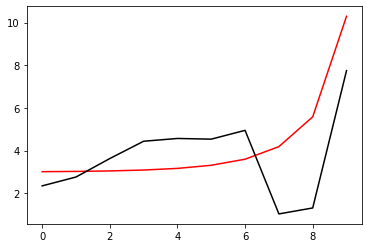

4300 0.006317890184159157
[2.35920345 2.76702992 3.61192077 4.41933197 4.56277792 4.55106611
 4.93253381 1.05784627 1.32846281 7.76486858]


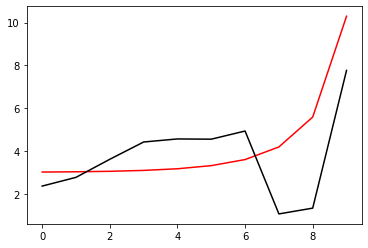

4400 0.00608422230751247
[2.36870762 2.76956061 3.59394281 4.39782201 4.55452956 4.56313247
 4.91318981 1.08032093 1.3421602  7.77952362]


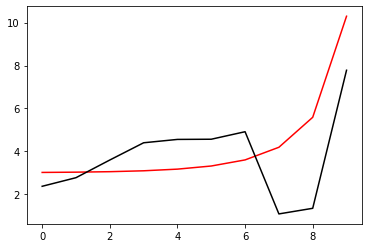

4500 0.0058611701678517505
[2.37819229 2.77203686 3.57627249 4.37620776 4.54643424 4.57508021
 4.89338185 1.10296003 1.35583056 7.79421607]


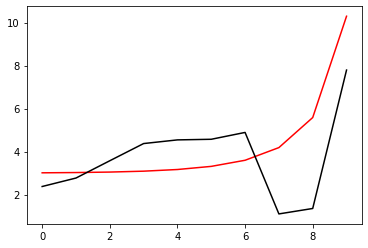

4600 0.005648186047532433
[2.38766382 2.77445343 3.55891391 4.35449445 4.53846756 4.58681483
 4.87319166 1.12576709 1.36947952 7.80895432]


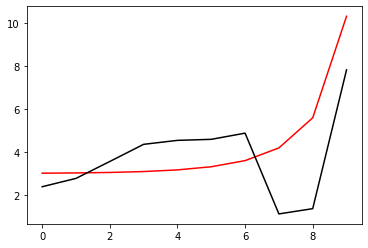

4700 0.005444760067999845
[2.3971273  2.77680803 3.54187044 4.33268838 4.53060253 4.59824109
 4.85269783 1.14874536 1.38311264 7.8237467 ]


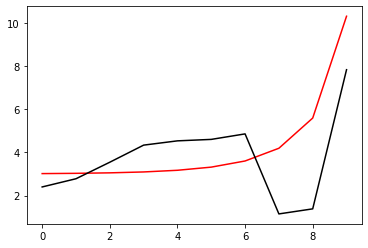

4800 0.005250414084178377
[2.40658659 2.77910113 3.52514479 4.31079684 4.52280949 4.60926356
 4.83197507 1.17189794 1.39673548 7.83860154]


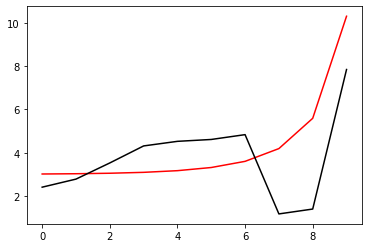

4900 0.005064696491933553
[2.41604447 2.78133567 3.50873913 4.28882815 4.51505605 4.61978703
 4.81109348 1.1952278  1.41035365 7.85352719]


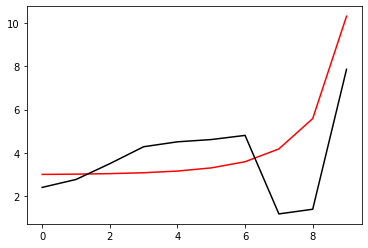

5000 0.004887177834162022
[2.42550281 2.7835168  3.49265514 4.26679153 4.507307   4.62971697
 4.79011789 1.21873788 1.42397288 7.86853209]


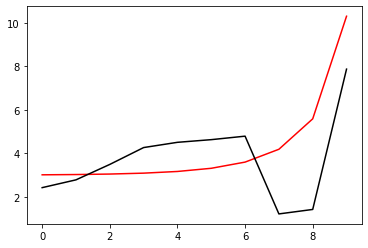

In [50]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 0.004409295249674039
[2.47065545 2.76173542 3.44365128 4.21723618 4.46059795 4.67164913
 4.74147366 1.26800412 1.47278083 7.9174962 ]


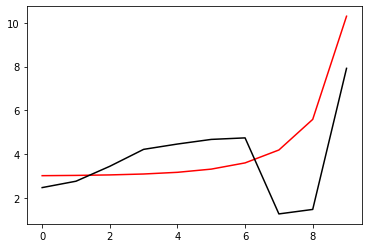

200 0.004034881543997108
[2.50361623 2.75957187 3.39754746 4.16852055 4.42024826 4.68581647
 4.69472297 1.31556119 1.51886262 7.96412013]


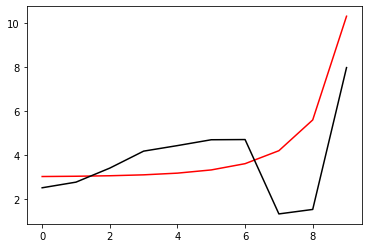

300 0.003723170061488501
[2.53020727 2.76590163 3.35656423 4.1211887  4.38523182 4.67529419
 4.6507143  1.36193223 1.56299836 8.00900943]


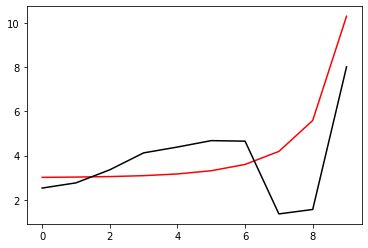

400 0.0034545717119795834
[2.5541433  2.77402089 3.32101922 4.07532307 4.3525928  4.65062539
 4.60782847 1.40731926 1.60559755 8.05252936]


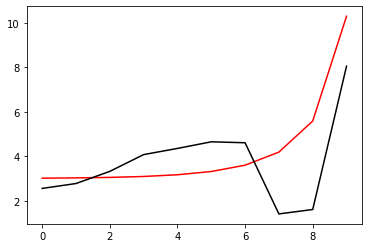

500 0.0032177541761897787
[2.57657657 2.78236753 3.29043475 4.03078106 4.31958458 4.61788728
 4.56445269 1.45176749 1.64686503 8.0948981 ]


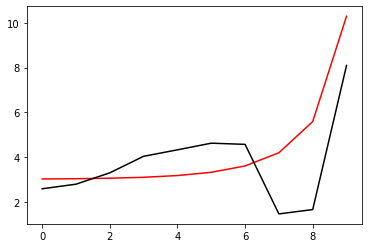

600 0.0030050628919023863
[2.59790209 2.79077563 3.26422464 3.98740736 4.28465946 4.57957602
 4.51989961 1.49532772 1.68698945 8.13630174]


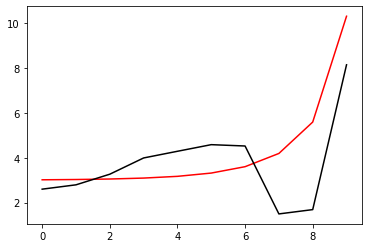

700 0.002811125017786172
[2.61833109 2.79926995 3.24181168 3.94507838 4.24728982 4.53694902
 4.47407372 1.53806549 1.72615607 8.17690505]


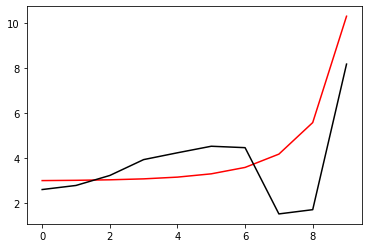

800 0.00263220439964544
[2.63799745 2.80787511 3.22263576 3.90370694 4.20758397 4.49097315
 4.42714784 1.58004712 1.76453125 8.2168452 ]


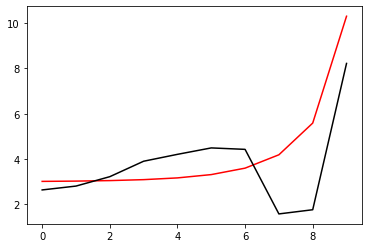

900 0.0024657628826535876
[2.65698944 2.81659415 3.20616844 3.86324111 4.16597901 4.44255353
 4.37940951 1.62133246 1.80225458 8.25622978]


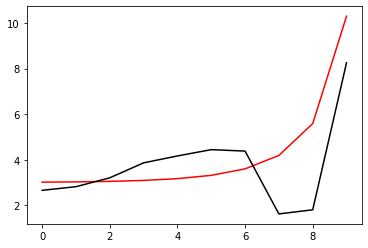

1000 0.002310107686228903
[2.67536869 2.82541061 3.19193111 3.82365963 4.12303106 4.39252375
 4.33118489 1.66197252 1.83943759 8.29513873]


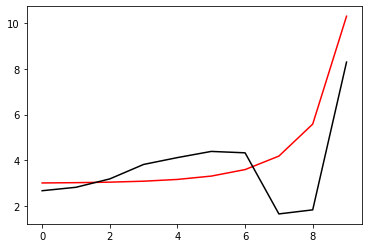

1100 0.0021641099347077713
[2.69318206 2.83429489 3.17950762 3.78496459 4.07928826 4.34159911
 4.28279221 1.70200896 1.87616581 8.33362827]


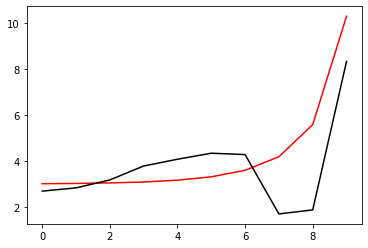

1200 0.0020269956980972755
[2.71046772 2.84321086 3.168549   3.74717354 4.03522806 4.29035439
 4.23451405 1.74147485 1.91250255 8.37173557]


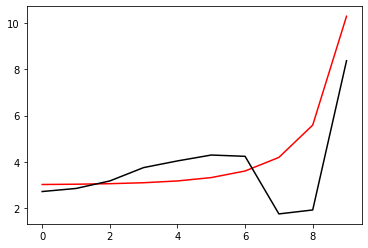

1300 0.0018982031846665605
[2.72725716 2.85212099 3.15877177 3.71031268 3.9912375  4.2392299
 4.18658572 1.78039573 1.94849322 8.4094834 ]


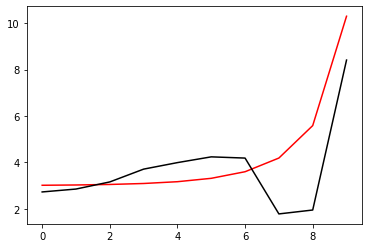

1400 0.0017772921292848857
[2.74357527 2.86098955 3.14995211 3.67441199 3.9476175  4.18855325
 4.13919529 1.81879111 1.98416969 8.44688415]


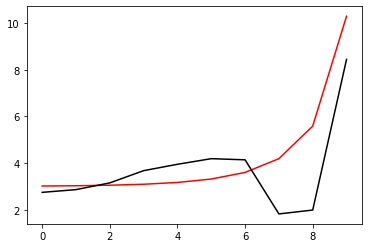

1500 0.0016638897799822283
[2.75943987 2.86978424 3.14191786 3.63950223 3.90459733 4.1385655
 4.09249003 1.85667585 2.01955401 8.48394306]


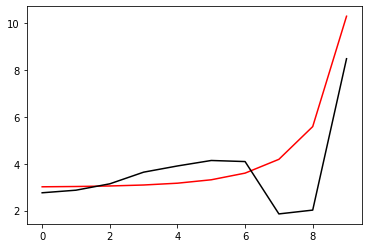

1600 0.0015576603881564456
[2.77486159 2.87847654 3.13453973 3.60561354 3.86235132 4.08944529
 4.04658528 1.89406134 2.05466137 8.52066061]


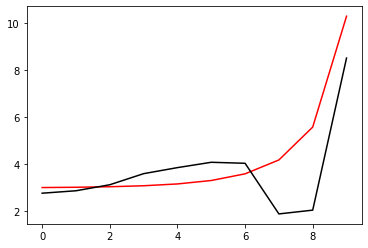

1700 0.001458288853481399
[2.78984412 2.88704141 3.1277228  3.572775   3.82101409 4.04132853
 4.00157336 1.93095658 2.08950236 8.55703422]


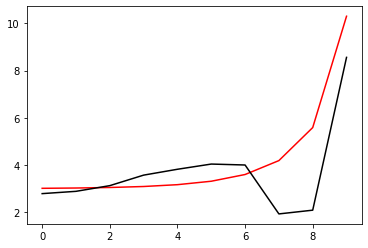

1800 0.0013654724953481008
[2.80438477 2.89545661 3.12139878 3.54101483 3.78069309 3.99432378
 3.95753141 1.96736886 2.12408454 8.59305928]


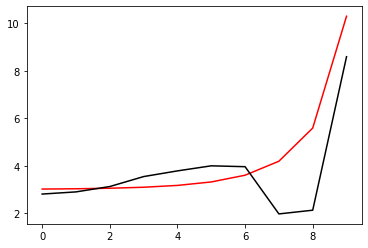

1900 0.0012789173057442555
[2.81847512 2.90370194 3.11551954 3.51036094 3.74147852 3.948524
 3.91452806 2.00330442 2.15841351 8.62872986]


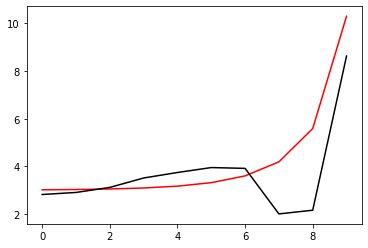

2000 0.0011983365547452688
[2.8321015  2.9117584  3.11005186 3.48084161 3.70345102 3.90401551
 3.87262906 2.03876891 2.1924936  8.66403904]


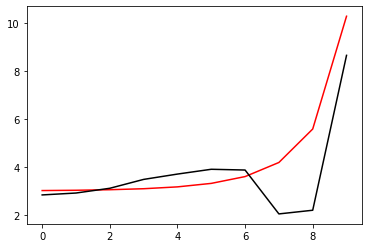

2100 0.0011234505009866396
[2.84524539 2.91960746 3.10497357 3.45248629 3.66668775 3.86088513
 3.83190217 2.07376779 2.22632827 8.69897901]


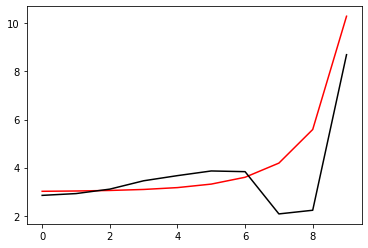

2200 0.0010539864305207378
[2.85788349 2.92723034 3.10027063 3.42532643 3.63126712 3.81922561
 3.79242135 2.1083067  2.25992029 8.73354108]


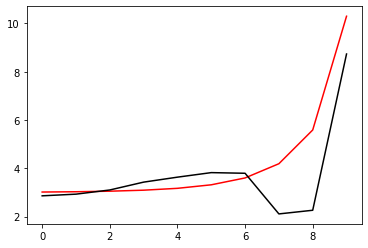

2300 0.0009896784762818607
[2.86998778 2.93460737 3.09593499 3.39939633 3.59727237 3.77913974
 3.75427038 2.14239177 2.29327182 8.76771549]


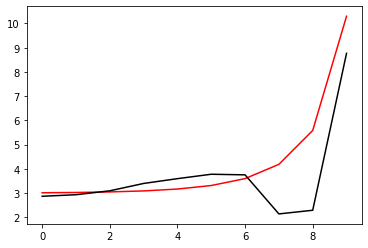

2400 0.00093026678541173
[2.88152577 2.94171743 3.09196293 3.37473381 3.56479378 3.74074232
 3.71754553 2.17602991 2.32638432 8.80149126]


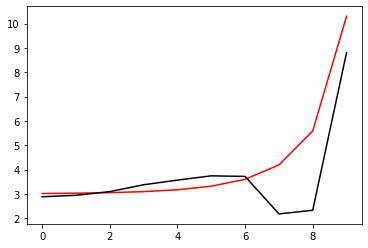

2500 0.0008754957016331612
[2.89246108 2.9485376  3.08835342 3.35138061 3.53392908 3.70415962
 3.68235676 2.20922899 2.35925833 8.83485591]


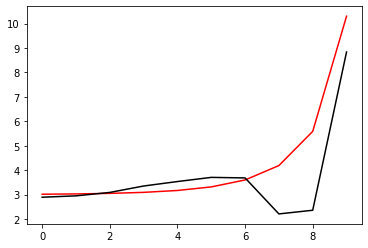

2600 0.0008251108148583759
[2.90275493 2.95504305 3.08510636 3.32938204 3.50478137 3.6695249
 3.64882646 2.24199793 2.3918932  8.86779526]


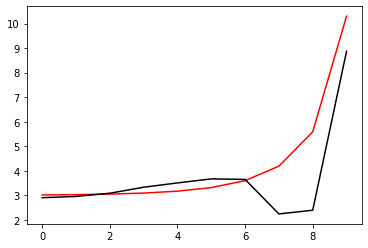

2700 0.0007788550744490887
[2.91236866 2.96120753 3.08222047 3.30878565 3.47745355 3.63696921
 3.61708473 2.27434651 2.42428677 8.90029332]


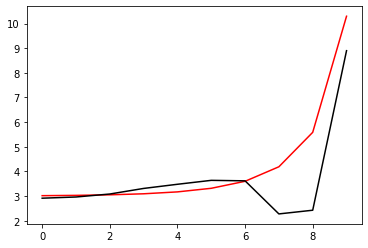

2800 0.0007364646747357608
[2.92126763 2.96700451 3.07969084 3.28963818 3.45203909 3.60660712
 3.58726039 2.30628504 2.45643505 8.93233236]


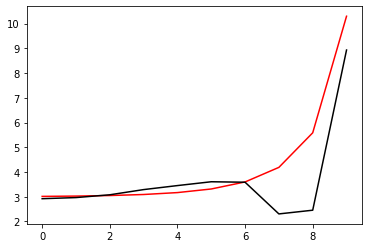

2900 0.0006976659650591494
[2.92942597 2.97240924 3.07750666 3.27198088 3.42860931 3.57851884
 3.55946759 2.33782366 2.48833211 8.96389323]


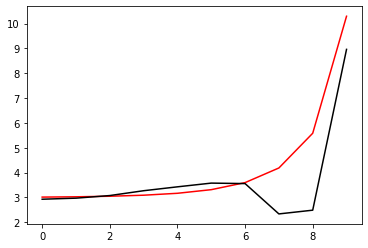

3000 0.0006621748971413138
[2.93683163 2.9774015  3.07564962 3.255843   3.40719934 3.55273202
 3.53378964 2.36897166 2.51997032 8.994956  ]


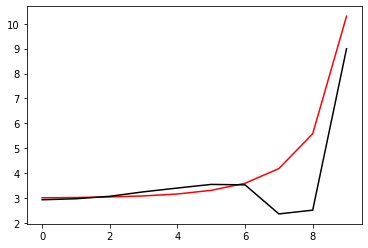

3100 0.0006297001443253201
[2.94349039 2.98196872 3.07409362 3.2412346  3.3877961  3.52920876
 3.51026316 2.3997368  2.55134103 9.02550099]


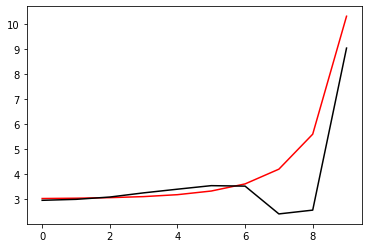

3200 0.000599949922715081
[2.94942747 2.98610859 3.0728062  3.22813983 3.37033218 3.5078424
 3.48886686 2.43012489 2.58243587 9.05550987]


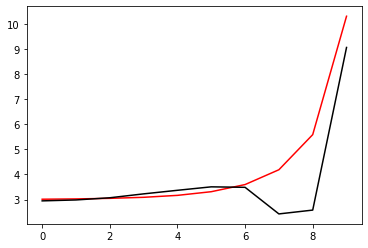

3300 0.000572641144080744
[2.95468629 2.98983037 3.07175124 3.21651264 3.35468835 3.48846674
 3.46951896 2.46013985 2.61324827 9.08496691]


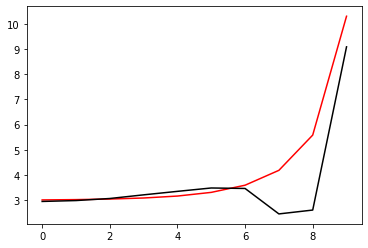

3400 0.000547508615169977
[2.95932462 2.99315454 3.0708921  3.20627601 3.34070441 3.4708752
 3.45208464 2.48978404 2.64377508 9.11385975]


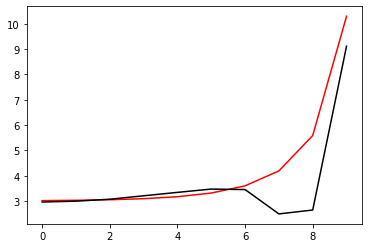

3500 0.0005243121013293038
[2.96340911 2.99611077 3.0701941  3.19732508 3.32819546 3.45484455
 3.43639178 2.51905898 2.67401788 9.14217991]


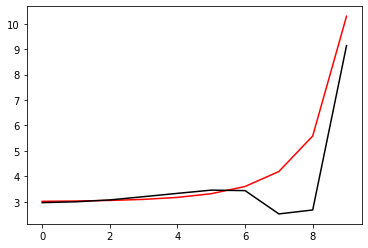

3600 0.0005028400504779716
[2.9670099  2.99873482 3.06962587 3.18953376 3.31696896 3.44015667
 3.42225087 2.5479659  2.70398356 9.16992259]


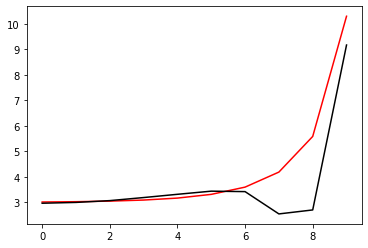

3700 0.0004829099797066504
[2.970196   3.00106525 3.06915965 3.18276297 3.30683883 3.42661422
 3.4094741  2.5765063  2.73368431 9.19708615]


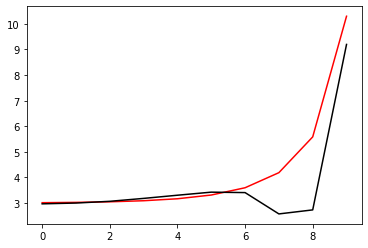

3800 0.0004643663655457819
[2.97303205 3.00314056 3.06877098 3.17686939 3.29763489 3.41404865
 3.39788992 2.60468219 2.76313699 9.22367127]


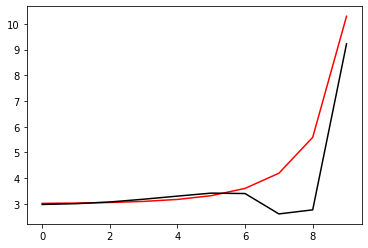

3900 0.0004470771525525084
[2.97557641 3.00499702 3.06843833 3.17171312 3.28920748 3.40232198
 3.38735145 2.63249623 2.79236219 9.24967994]


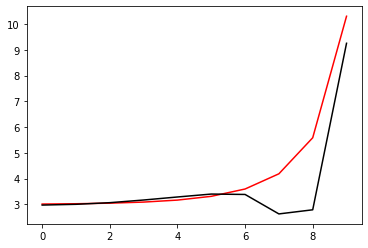

4000 0.00043092984478460233
[2.9778802  3.00666743 3.06814279 3.16716364 3.28142874 3.39132434
 3.377739   2.65995164 2.82138318 9.27511464]


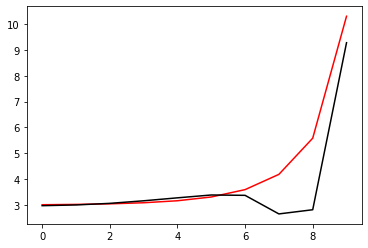

4100 0.00041582781828754977
[2.97998711 3.00818041 3.06786799 3.16310384 3.27419159 3.38096949
 3.36895826 2.68705212 2.8502248  9.29997757]


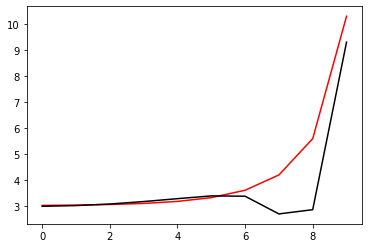

4200 0.0004016871721803652
[2.98193367 3.00956037 3.06760013 3.15943219 3.26740778 3.37118985
 3.36093589 2.71380165 2.87891265 9.32427008]


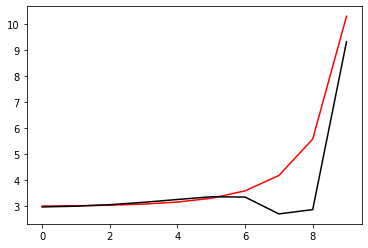

4300 0.0003884342049128572
[2.98374981 3.01082766 3.06732801 3.15606344 3.26100551 3.36193191
 3.35361427 2.74020432 2.90747235 9.34799227]


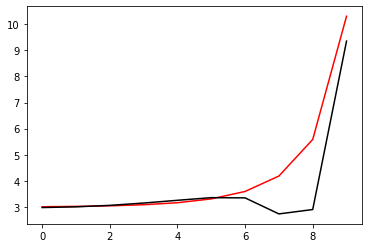

4400 0.00037600346869830404
[2.98545954 3.01199898 3.06704294 3.15292806 3.25492707 3.35315249
 3.34694651 2.76626414 2.93592901 9.3711428 ]


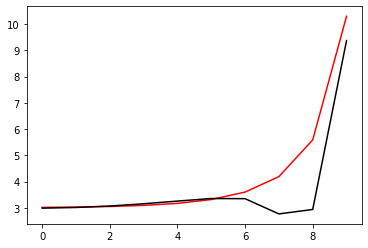

4500 0.00036433629770990945
[2.98708173 3.01308787 3.06673862 3.14997104 3.24912656 3.34481582
 3.34089242 2.79198486 2.96430683 9.39371874]


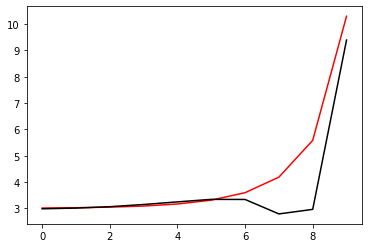

4600 0.00035337969677979686
[2.98863093 3.01410517 3.06641092 3.14715013 3.24356793 3.3368915
 3.3354156  2.81736983 2.9926289  9.41571559]


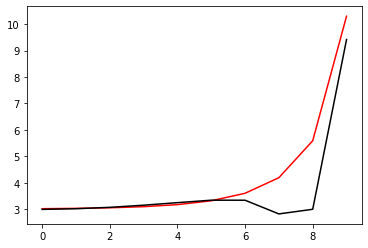

4700 0.0003430854904452283
[2.99011806 3.01505949 3.06605753 3.14443389 3.23822314 3.32935302
 3.33048161 2.84242183 3.02091693 9.43712727]


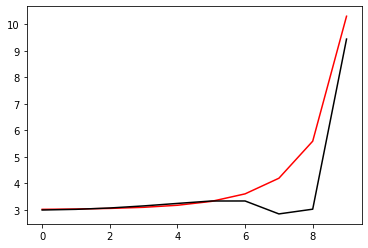

4800 0.00033340965602834656
[2.99155117 3.01595767 3.06567769 3.14179977 3.23307061 3.32217682
 3.32605709 2.86714296 3.04919121 9.45794626]


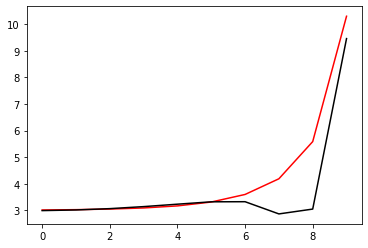

4900 0.0003243117861897865
[2.99293603 3.01680509 3.06527181 3.13923219 3.22809385 3.31534174
 3.32210943 2.89153455 3.07747053 9.47816369]


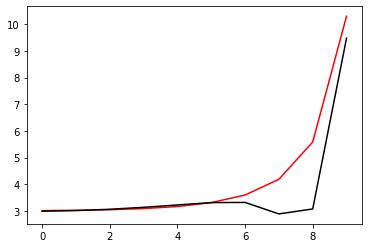

5000 0.0003157546445753133
[2.99427663 3.01760602 3.06484119 3.13672098 3.22328033 3.30882858
 3.31860682 2.91559712 3.10577208 9.49776952]


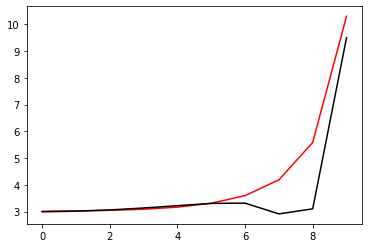

In [51]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 0.0002999487362344949
[2.99797957 3.01982562 3.06344392 3.12848709 3.21147548 3.29574096
 3.31270087 2.96447348 3.1550535  9.54584873]


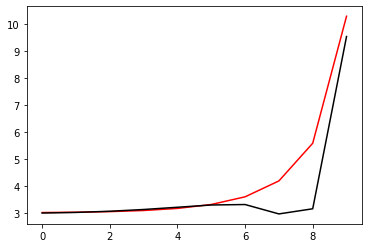

200 0.0002865557288550854
[3.00027847 3.02107896 3.06248139 3.12417091 3.20318616 3.28502434
 3.309173   3.01083786 3.20313927 9.5895202 ]


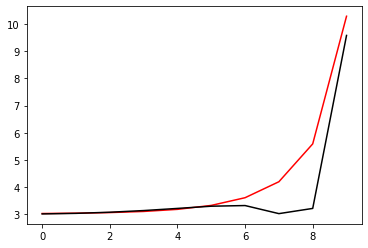

300 0.0002751881260731618
[3.00231778 3.02212953 3.06150533 3.12020857 3.19579442 3.27575784
 3.30694778 3.05461838 3.25003591 9.62837305]


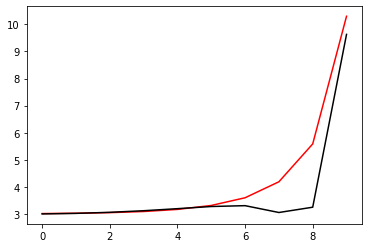

400 0.00026548736152609087
[3.00414599 3.02302284 3.06052512 3.11653071 3.18911474 3.26764966
 3.30574075 3.09593409 3.29589937 9.66233337]


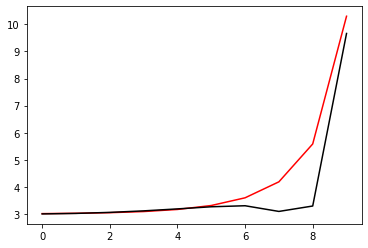

500 0.0002571504911166164
[3.00578377 3.02378096 3.05955233 3.11311526 3.18306215 3.26053314
 3.30535323 3.13489466 3.34085827 9.69139461]


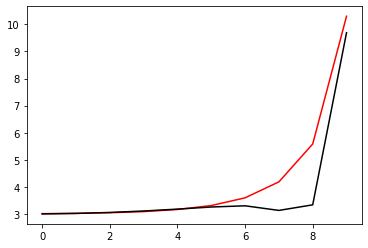

600 0.0002499236677463332
[3.00724627 3.02442021 3.05859629 3.10994774 3.17757552 3.25428249
 3.30562708 3.17160142 3.3850155  9.71564012]


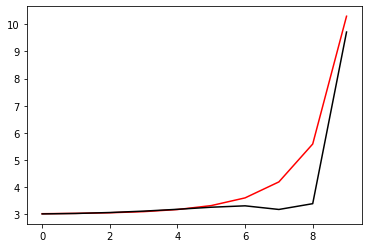

700 0.0002435971506682152
[3.00854751 3.02495471 3.05766426 3.10701492 3.17260266 3.24879158
 3.30642926 3.2061492  3.42845182 9.73526399]


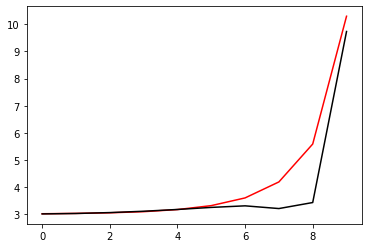

800 0.0002380010578732165
[3.00970164 3.02539757 3.05676184 3.10430333 3.16809566 3.24396631
 3.30764447 3.23862773 3.47122937 9.7505806 ]


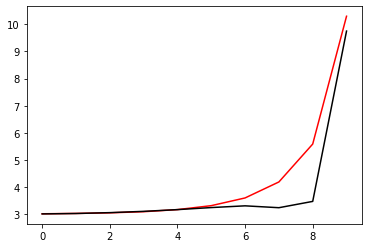

900 0.00023300094520844772
[3.01072317 3.02576129 3.05589333 3.10179893 3.16400934 3.23972124
 3.30917124 3.26912255 3.51339472 9.76201764]


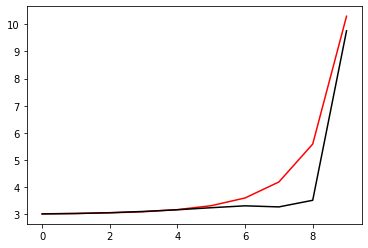

1000 0.0002284927602354496
[3.01162684 3.02605784 3.05506199 3.0994873  3.16030084 3.23597835
 3.31092007 3.29771584 3.55498162 9.77009188]


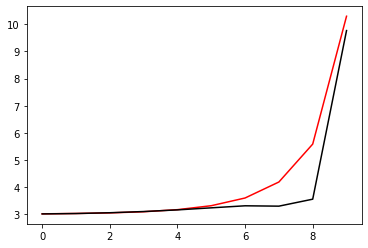

1100 0.00022439726671295723
[3.01242717 3.02629849 3.05427016 3.09735397 3.15692992 3.23266687
 3.31281278 3.32448711 3.59601341 9.775372  ]


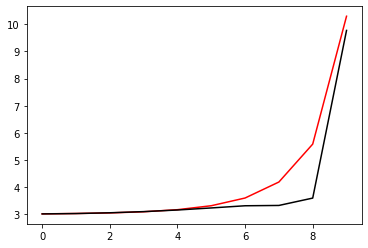

1200 0.00022065442845448297
[3.01313802 3.02649358 3.05351937 3.09538481 3.15385933 3.22972346
 3.31478239 3.349514   3.63650514 9.778436  ]


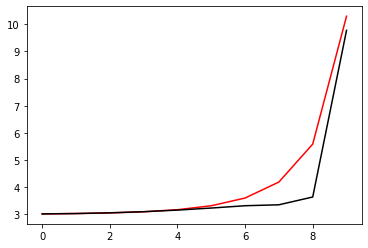

1300 0.00021721833475613962
[3.01377217 3.02665232 3.05281042 3.09356626 3.15105526 3.22709247
 3.31677308 3.37287326 3.67646532 9.77983149]


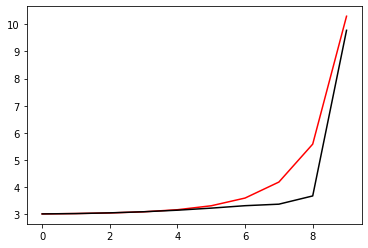

1400 0.00021405308258846484
[3.01434101 3.02678263 3.05214341 3.09188562 3.1484875  3.22472595
 3.31873996 3.39464172 3.71589746 9.78004527]


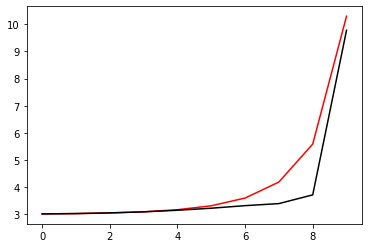

1500 0.0002111297493480512
[3.01485444 3.02689111 3.05151783 3.09033111 3.14612946 3.22258329
 3.32064848 3.4148973  3.7548012  9.77948505]


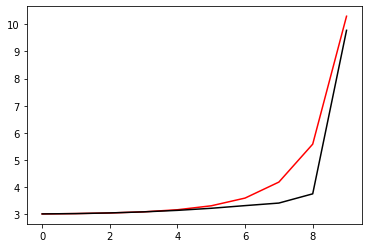

1600 0.00020842434861200243
[3.01532083 3.02698309 3.05093262 3.08889186 3.14395791 3.22063068
 3.32247361 3.43371988 3.79317323 9.77847313]


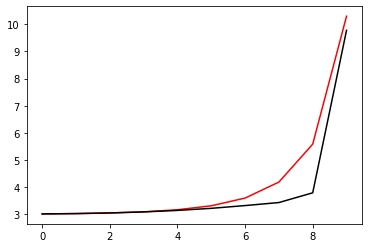

1700 0.00020591653422867025
[3.01574713 3.02706273 3.05038625 3.08755791 3.14195272 3.21884032
 3.32419874 3.45119181 3.83100802 9.77724968]


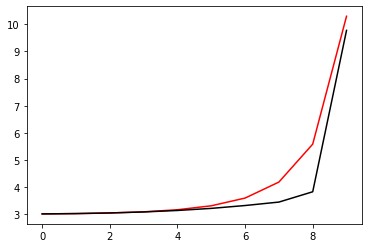

1800 0.00020358880086441232
[3.01613903 3.02713316 3.04987683 3.08632011 3.14009643 3.2171896
 3.3258146  3.46739821 3.86829829 9.77598244]


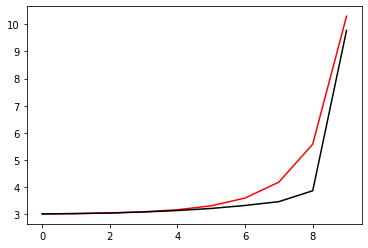

1900 0.00020142597553108747
[3.0165011  3.02719667 3.04940216 3.08517003 3.13837389 3.21566029
 3.327318   3.48242676 3.90503543 9.77477977]


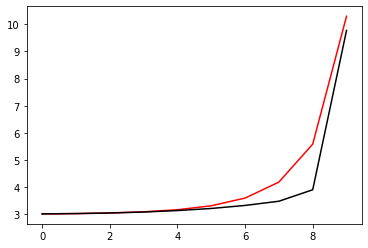

2000 0.00019941486232360393
[3.01683703 3.02725483 3.04895987 3.08409993 3.13677192 3.21423782
 3.3287108  3.49636718 3.94120978 9.77370441]


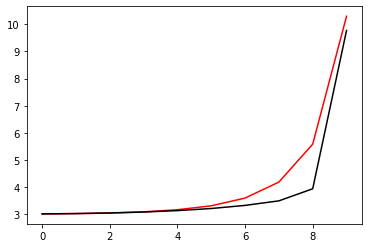

2100 0.00019754396167158593
[3.01714972 3.02730867 3.04854743 3.08310266 3.135279   3.21291062
 3.32999878 3.50931038 3.97681083 9.77278634]


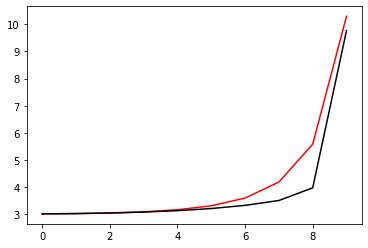

2200 0.00019580322653347176
[3.0174415  3.02735878 3.04816231 3.08217167 3.13388509 3.21166955
 3.33119074 3.52134729 4.01182744 9.77203356]


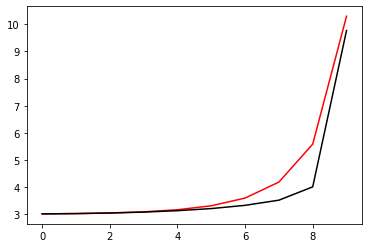

2300 0.00019418384154192909
[3.01771417 3.02740541 3.04780196 3.08130094 3.13258137 3.21050749
 3.33229763 3.53256759 4.04624797 9.77144058]


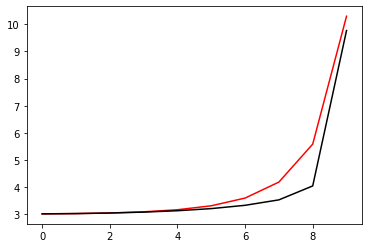

2400 0.00019267802249785265
[3.01796917 3.0274486  3.04746393 3.080485   3.13136013 3.20941891
 3.33333173 3.54305838 4.08006041 9.77099452]


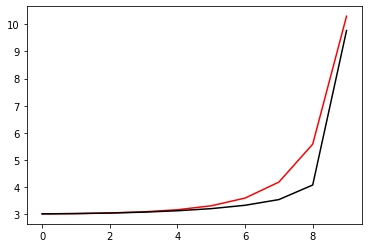

2500 0.00019127883748570093
[3.0182076  3.02748821 3.04714588 3.07971888 3.13021467 3.20839958
 3.33430599 3.5529028  4.11325244 9.77067927]


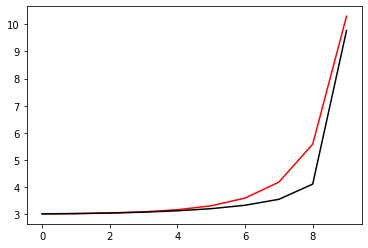

2600 0.00018998005103095246
[3.01843035 3.027524   3.04684561 3.07899815 3.12913913 3.20744626
 3.33523345 3.56217886 4.14581157 9.77047804]


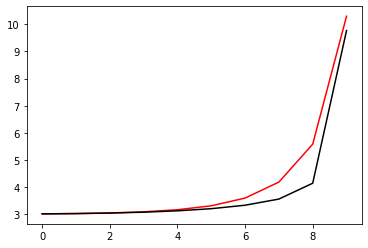

2700 0.0001887759920033435
[3.01863809 3.02755567 3.04656114 3.07831886 3.12812845 3.20655648
 3.33612668 3.5709584  4.17772511 9.77037483]


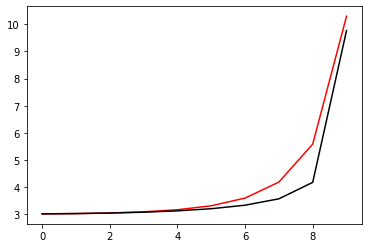

2800 0.00018766144407761086
[3.01883136 3.02758291 3.04629067 3.07767755 3.12717826 3.2057283
 3.33699739 3.57930635 4.20898027 9.77035511]


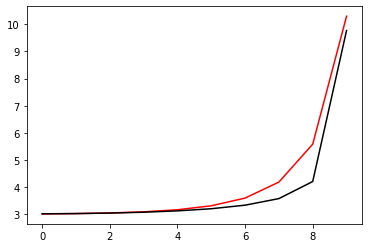

2900 0.000186631557265405
[3.01901062 3.02760541 3.04603263 3.07707118 3.12628476 3.20496013
 3.33785608 3.58728012 4.23956411 9.77040605]


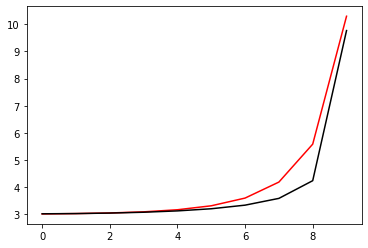

3000 0.00018568177793209893
[3.01917625 3.02762294 3.04578565 3.07649715 3.12544468 3.2042506
 3.33871181 3.59492945 4.26946353 9.77051655]


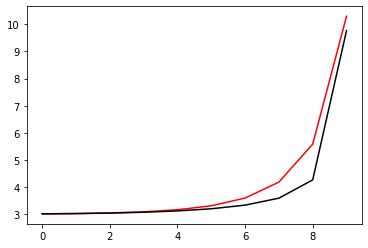

3100 0.00018480779403056067
[3.01932862 3.02763528 3.04554858 3.07595319 3.12465516 3.20359839
 3.33957206 3.60229632 4.29866528 9.77067704]


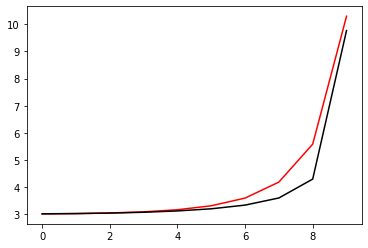

3200 0.0001840054931560501
[3.01946807 3.02764234 3.04532047 3.07543741 3.12391369 3.20300215
 3.34044264 3.60941525 4.32715588 9.77087934]


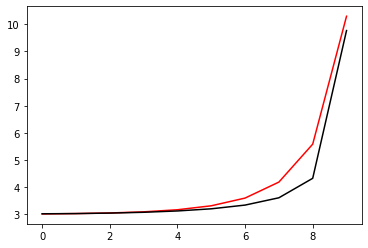

3300 0.00018327093063373362
[3.01959499 3.02764407 3.04510058 3.07494817 3.12321803 3.2024604
 3.34132771 3.61631368 4.35492159 9.77111641]


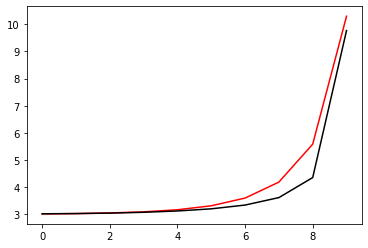

3400 0.00018260030530311102
[3.01970977 3.02764053 3.04488831 3.07448409 3.12256615 3.20197152
 3.34222984 3.62301256 4.38194839 9.77138223]


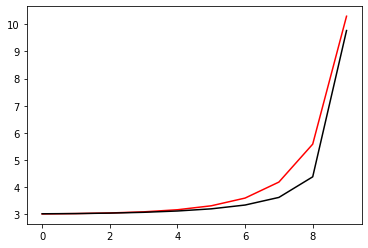

3500 0.00018198994113777014
[3.01981285 3.02763184 3.04468323 3.074044   3.1219562  3.20153367
 3.34315014 3.62952706 4.40822198 9.77167157]


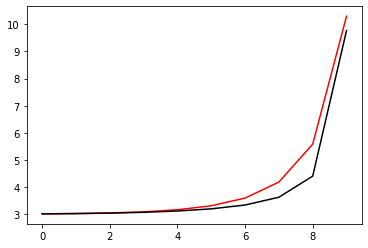

3600 0.0001814362736470056
[3.0199047  3.0276182  3.04448501 3.07362686 3.12138641 3.20114482
 3.34408838 3.63586723 4.43372773 9.77197989]


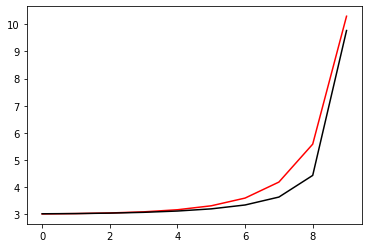

3700 0.00018093583943999453
[3.01998584 3.0275999  3.04429347 3.07323182 3.12085513 3.20080274
 3.34504318 3.64203883 4.45845074 9.77230318]


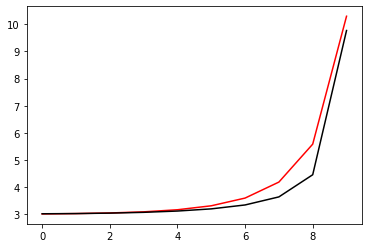

3800 0.00018048526860542832
[3.02005683 3.02757726 3.04410849 3.07285807 3.12036072 3.20050499
 3.34601218 3.64804404 4.48237588 9.77263787]


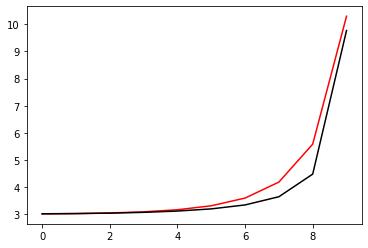

3900 0.00018008127962912
[3.02011826 3.02755067 3.04393002 3.07250493 3.1199016  3.200249
 3.34699222 3.65388212 4.50548788 9.77298076]


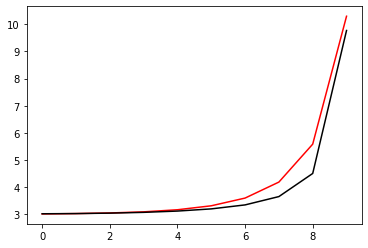

4000 0.00017972067599644325
[3.02017074 3.02752054 3.04375806 3.07217174 3.11947622 3.20003205
 3.34797952 3.6595501  4.52777148 9.77332893]


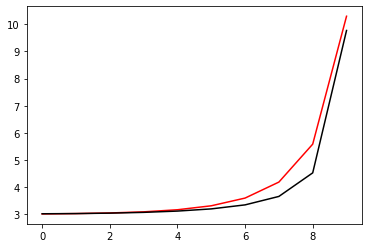

4100 0.00017940034460184432
[3.02021491 3.02748732 3.04359267 3.0718579  3.11908301 3.19985133
 3.34896983 3.66504331 4.54921154 9.77367973]


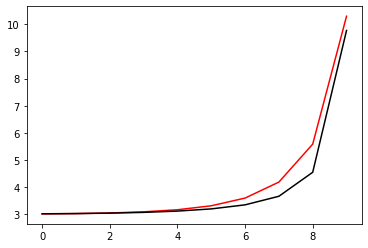

4200 0.000179117256011039
[3.02025144 3.02745149 3.0434339  3.07156282 3.11872044 3.19970394
 3.34995855 3.67035588 4.5697933  9.77403066]


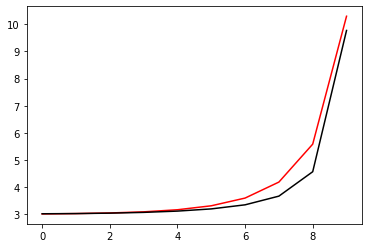

4300 0.00017886846601474288
[3.02028097 3.02741351 3.04328185 3.07128594 3.11838697 3.19958696
 3.3509409  3.67548118 4.58950256 9.77437944]


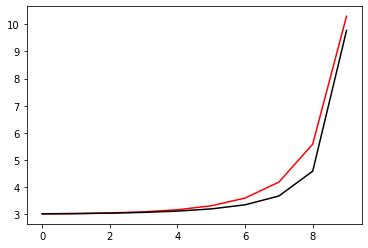

4400 0.00017865111874955063
[3.02030418 3.02737387 3.04313661 3.07102672 3.11808108 3.19949746
 3.35191201 3.68041216 4.60832606 9.77472393]


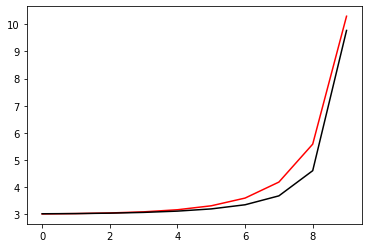

4500 0.00017846245111698762
[3.02032172 3.02733305 3.04299827 3.0707846  3.11780126 3.19943254
 3.35286702 3.68514165 4.62625168 9.77506213]


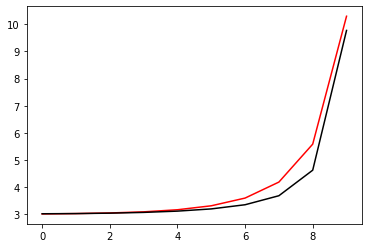

4600 0.0001782997983224937
[3.02033424 3.0272915  3.0428669  3.07055904 3.11754601 3.19938932
 3.35380117 3.68966269 4.64326891 9.7753922 ]


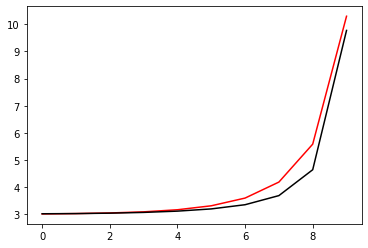

4700 0.00017816060049449472
[3.02034236 3.0272497  3.04274259 3.07034948 3.11731386 3.19936501
 3.35470985 3.69396871 4.65936916 9.77571245]


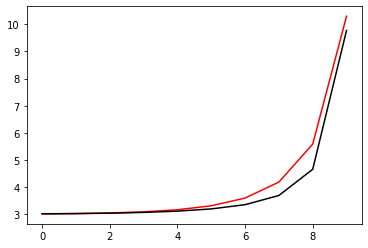

4800 0.0001780424099928316
[3.02034671 3.02720805 3.04262537 3.07015538 3.11710336 3.19935693
 3.35558873 3.69805374 4.67454618 9.77602133]


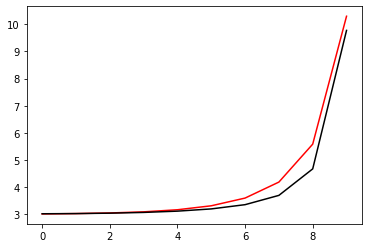

4900 0.00017794289910073847
[3.02034785 3.02716696 3.04251529 3.06997617 3.11691311 3.19936247
 3.35643378 3.70191265 4.6887965  9.77631745]


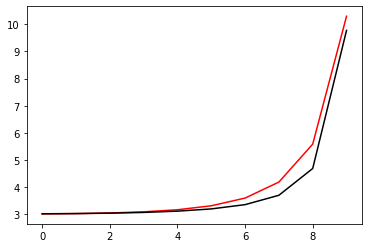

5000 0.00017785986806899211
[3.02034633 3.02712681 3.04241234 3.06981129 3.11674172 3.19937921
 3.35724134 3.70554129 4.70211981 9.77659959]


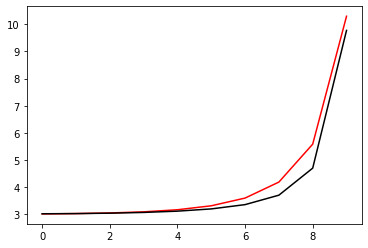

In [52]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

100 0.00017766184610519274
[3.02028184 3.02694462 3.04204679 3.06928739 3.11628041 3.19969539
 3.36048865 3.71894101 4.74375355 9.77749822]


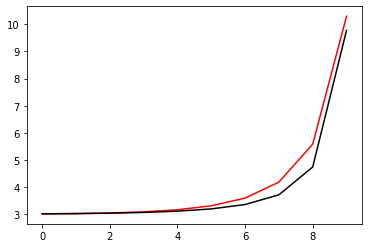

200 0.00017757453425356365
[3.02026902 3.02685044 3.04182203 3.06893804 3.11593316 3.19978374
 3.36233898 3.72694887 4.77536615 9.77823273]


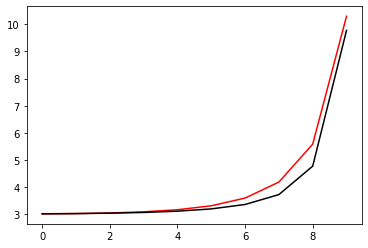

300 0.00017754705166978397
[3.0202554  3.02678858 3.04168342 3.0687284  3.11573282 3.19986219
 3.36351498 3.73193177 4.79500695 9.77870152]


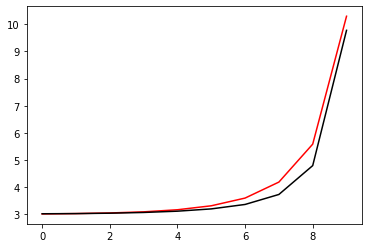

400 0.00017754084189212902
[3.02024731 3.02675603 3.04161228 3.06862239 3.11563445 3.19991207
 3.36413759 3.73452666 4.80517264 9.77894785]


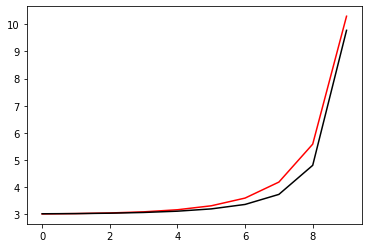

500 0.0001775398493723807
[3.02024063 3.02673932 3.0415797  3.06857572 3.11559213 3.19993455
 3.36440698 3.73564243 4.80952726 9.77905426]


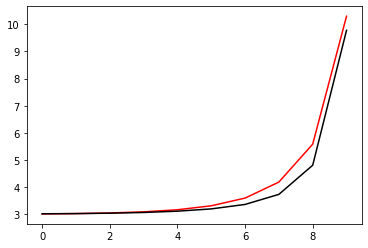

600 0.00017753973734569987
[3.02023858 3.02673367 3.04156838 3.0685594  3.11557742 3.19994303
 3.36450352 3.73604017 4.81107549 9.77909221]


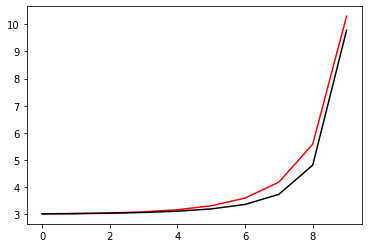

700 0.0001775397283886663
[3.02023938 3.02673328 3.04156615 3.06855551 3.1155738  3.1999461
 3.36453256 3.73615841 4.81153463 9.77910342]


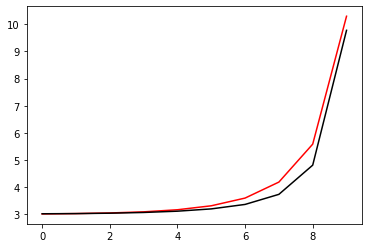

800 0.00017753972785386008
[3.02023863 3.02673231 3.04156483 3.0685539  3.11557241 3.19994651
 3.36453952 3.73618752 4.81164782 9.77910623]


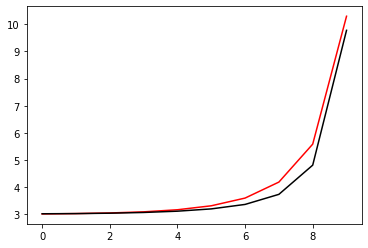

900 0.00017753972860303345
[3.02023525 3.02672912 3.04156188 3.0685513  3.11557032 3.19994534
 3.36454028 3.73619356 4.81167167 9.77910703]


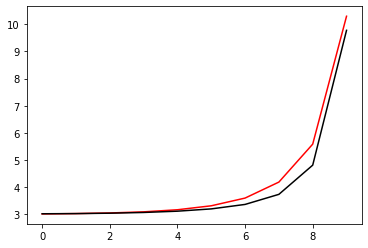

1000 0.00017753972782774498
[3.02023857 3.02673219 3.04156461 3.0685536  3.11557214 3.19994666
 3.36454124 3.73619456 4.81167513 9.7791069 ]


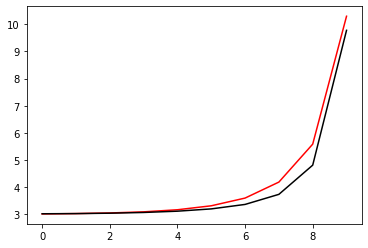

1100 0.00017753972829320192
[3.02023603 3.02672985 3.04156253 3.06855184 3.11557074 3.19994565
 3.36454064 3.73619448 4.8116756  9.77910703]


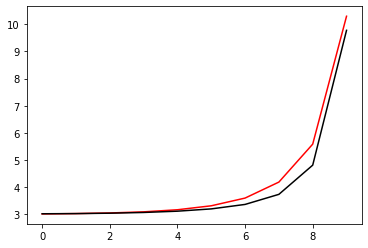

1200 0.00017753972787184835
[3.02023801 3.02673166 3.04156414 3.06855319 3.11557181 3.19994642
 3.36454114 3.73619473 4.81167601 9.77910696]


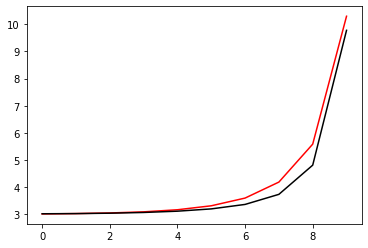

1300 0.00017753972784370316
[3.0202386  3.02673221 3.04156463 3.06855362 3.11557215 3.19994667
 3.36454128 3.73619471 4.81167568 9.77910691]


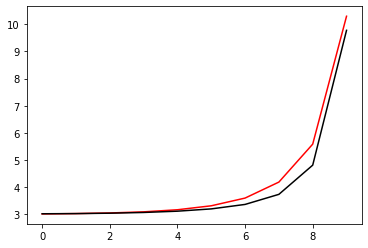

1400 0.0001775397278376889
[3.02023863 3.02673224 3.04156466 3.06855364 3.11557217 3.19994668
 3.36454129 3.73619471 4.81167566 9.77910691]


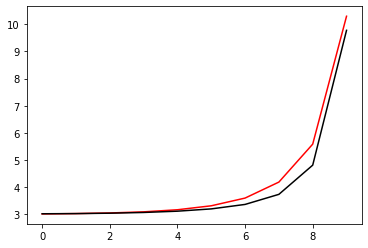

1500 0.00017753972798159275
[3.02023721 3.02673091 3.04156345 3.06855258 3.11557131 3.19994605
 3.36454093 3.73619476 4.81167624 9.77910703]


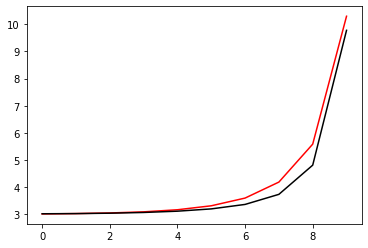

1600 0.00017753972784110541
[3.0202386  3.02673221 3.04156463 3.06855362 3.11557215 3.19994667
 3.36454128 3.73619471 4.81167567 9.77910691]


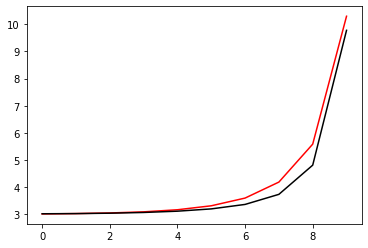

1700 0.0001775397278464861
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


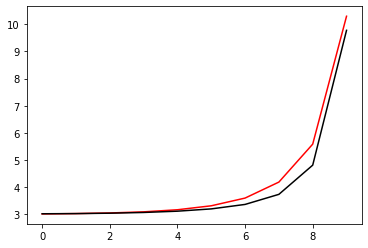

1800 0.00017753977378160563
[3.02026375 3.02675588 3.04158623 3.06857257 3.11558789 3.19995883
 3.36455001 3.7362002  4.81167721 9.77910473]


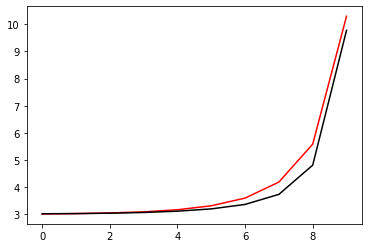

1900 0.00017753972783594594
[3.02023869 3.0267323  3.04156471 3.06855368 3.11557221 3.19994671
 3.36454131 3.73619473 4.81167573 9.77910691]


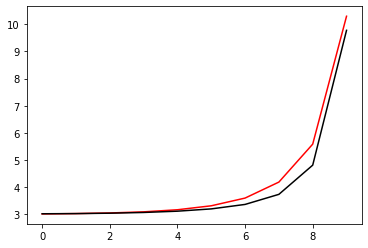

2000 0.0001775397278299542
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557215 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


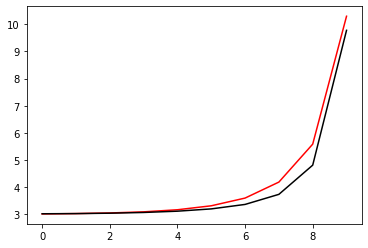

2100 0.00017753972783172132
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


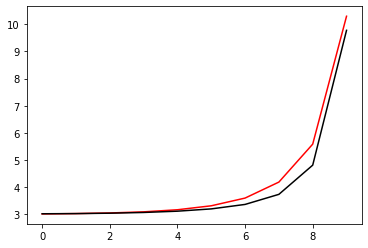

2200 0.0001775398887978644
[3.02019138 3.02668776 3.04152397 3.06851798 3.11554283 3.19992496
 3.36452833 3.73619193 4.81167708 9.7791098 ]


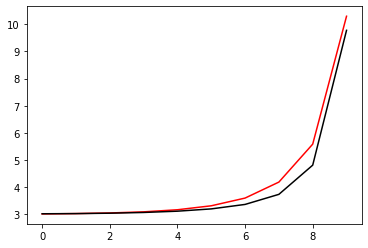

2300 0.00017753972783228651
[3.02023874 3.02673235 3.04156475 3.06855372 3.11557224 3.19994673
 3.36454131 3.73619471 4.81167566 9.7791069 ]


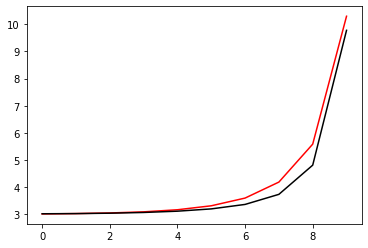

2400 0.00017753972784837534
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557215 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


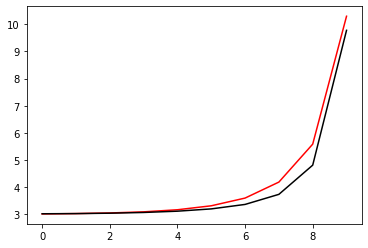

2500 0.00017753972783054258
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


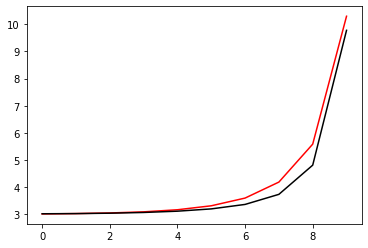

2600 0.00017754000087787333
[3.02029969 3.02678972 3.04161735 3.06860021 3.11561135 3.19997753
 3.36456331 3.73620658 4.8116769  9.77910473]


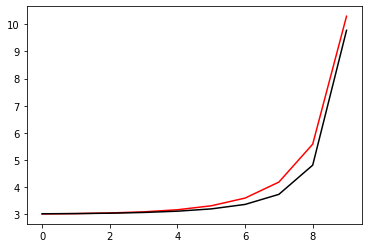

2700 0.0001775397278488165
[3.02023828 3.02673192 3.04156436 3.06855338 3.11557195 3.19994652
 3.36454117 3.73619464 4.81167562 9.77910694]


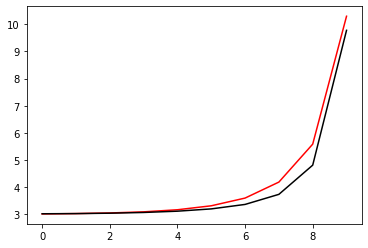

2800 0.00017753972784570894
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


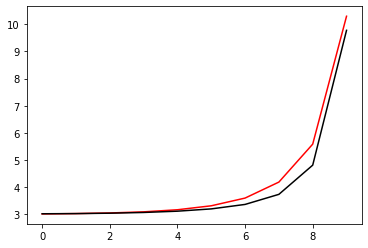

2900 0.00017753972784643262
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


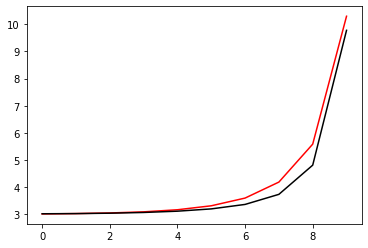

3000 0.00017754014951595686
[3.02031471 3.02680385 3.04163026 3.06861145 3.11562043 3.19998393
 3.36456669 3.73620714 4.81167636 9.7791036 ]


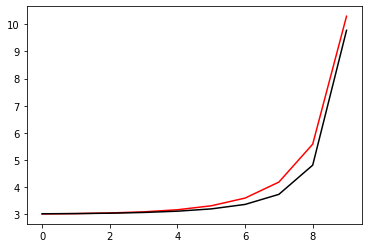

3100 0.00017753972784801883
[3.02023821 3.02673185 3.0415643  3.06855332 3.11557191 3.19994648
 3.36454115 3.73619463 4.81167559 9.77910694]


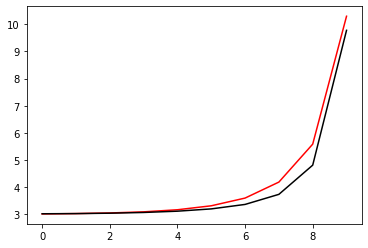

3200 0.0001775397278376919
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


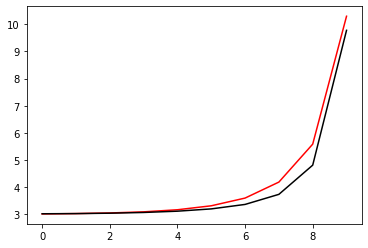

3300 0.00017753972783904576
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


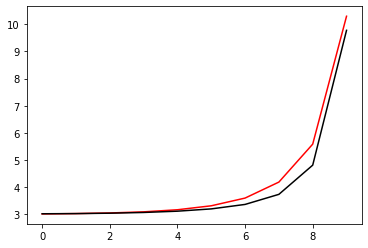

3400 0.00017753974718682917
[3.02022208 3.02671681 3.04155068 3.0685415  3.11556226 3.19993928
 3.36453648 3.73619257 4.81167561 9.77910785]


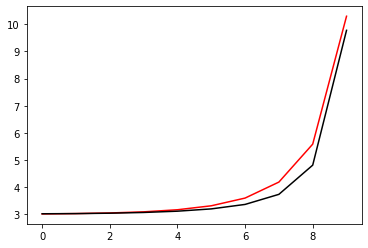

3500 0.0001775397278724181
[3.02023923 3.02673281 3.04156518 3.0685541  3.11557256 3.19994699
 3.3645415  3.7361948  4.81167557 9.77910685]


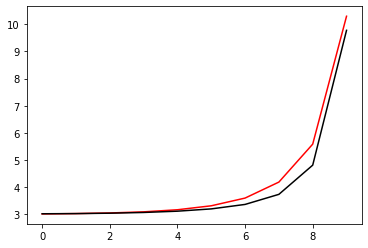

3600 0.00017753972783392342
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557215 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


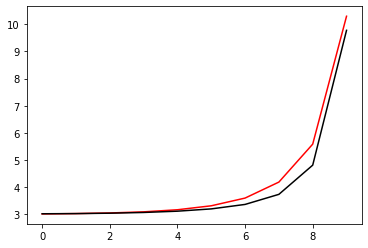

3700 0.00017753972783676706
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


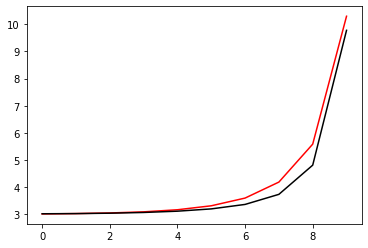

3800 0.00017753972789350602
[3.02023947 3.02673303 3.04156537 3.06855426 3.11557268 3.19994706
 3.36454153 3.73619482 4.81167566 9.77910686]


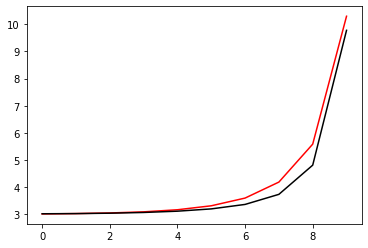

3900 0.00017753972792144938
[3.02023761 3.02673129 3.04156379 3.06855287 3.11557153 3.19994618
 3.36454093 3.73619448 4.81167551 9.779107  ]


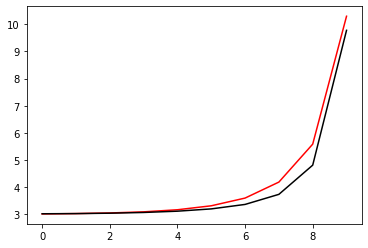

4000 0.00017753972784401907
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


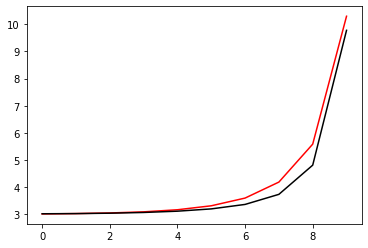

4100 0.00017753972784518164
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


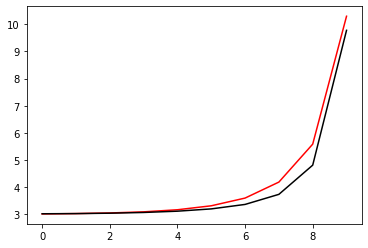

4200 0.00017753972783184294
[3.02023874 3.02673235 3.04156476 3.06855372 3.11557224 3.19994674
 3.36454132 3.73619472 4.81167566 9.7791069 ]


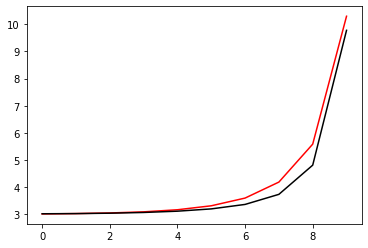

4300 0.00017753972783008661
[3.02023844 3.02673207 3.0415645  3.06855349 3.11557205 3.19994658
 3.36454118 3.73619455 4.81167547 9.77910689]


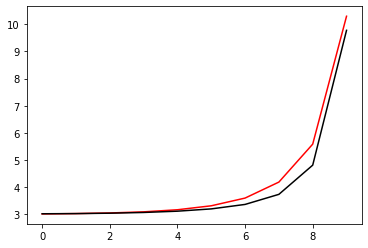

4400 0.00017753972784209342
[3.0202386  3.02673221 3.04156463 3.06855362 3.11557215 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


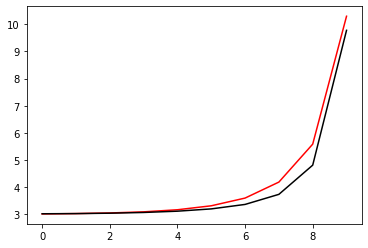

4500 0.00017753972782912455
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


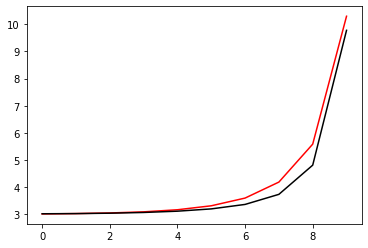

4600 0.0001775397278222278
[3.02023863 3.02673224 3.04156466 3.06855364 3.11557217 3.19994668
 3.36454129 3.73619471 4.81167566 9.77910691]


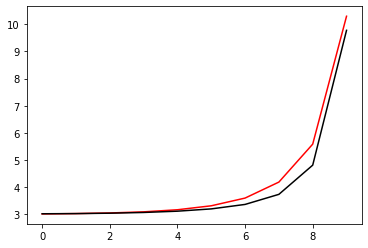

4700 0.00017753972810986946
[3.02024053 3.02673404 3.04156631 3.0685551  3.11557339 3.19994762
 3.36454191 3.736195   4.81167537 9.77910678]


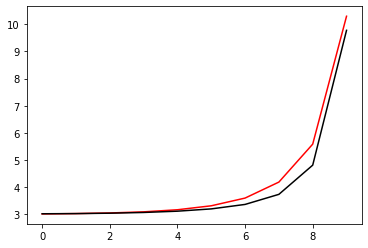

4800 0.00017753972783012952
[3.02023861 3.02673223 3.04156465 3.06855363 3.11557216 3.19994668
 3.36454128 3.73619471 4.81167566 9.77910691]


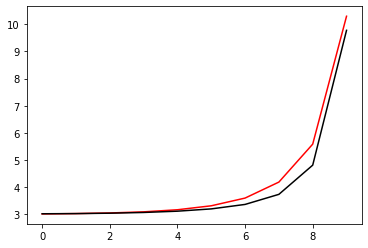

4900 0.0001775397278392342
[3.0202386  3.02673222 3.04156464 3.06855362 3.11557216 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


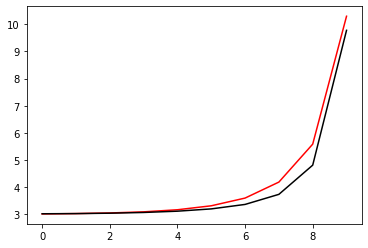

5000 0.00017753972784480759
[3.0202386  3.02673221 3.04156463 3.06855361 3.11557215 3.19994667
 3.36454128 3.7361947  4.81167566 9.77910691]


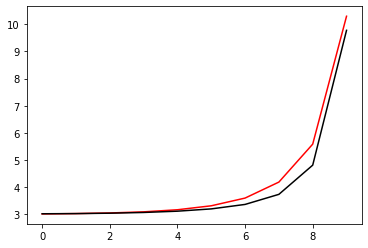

In [53]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for i in range (1, 5001):
    run()
    if i%100==0: print(i, Error_func(h).numpy()), print(h.numpy()), plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

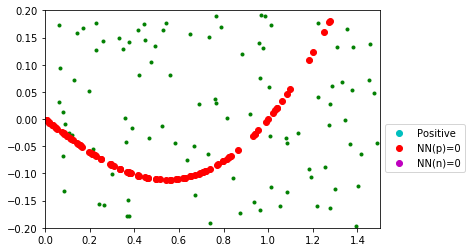

In [54]:
[Positive0, Positive1]=NN_func_01(h, Positive)
[Negative0, Negative1]=NN_func_01(h, Negative)

x_data1=[v[0] for v in Positive0]
y_data1=[v[1] for v in Positive0]
x_data2=[v[0] for v in Positive1]
y_data2=[v[1] for v in Positive1]
x_data3=[v[0] for v in Negative0]
y_data3=[v[1] for v in Negative0]
x_data4=[v[0] for v in Negative1]
y_data4=[v[1] for v in Negative1]
plt.plot(x_data4, y_data4, 'g.')
plt.plot(x_data2, y_data2, 'co', label='Positive')
plt.plot(x_data1, y_data1, 'ro', label='NN(p)=0')
plt.plot(x_data3, y_data3, 'mo', label='NN(n)=0')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()